**Import Libraries** 

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from scipy.stats import ttest_ind
import sklearn
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates

**Import Data and Create Dataframes**

In [310]:
#ALL weather data from Chicago from 1960-now
noaa_all = pd.read_csv('/Users/meganvanderwiele/Desktop/DMP/noaa_chicago_weather_basic_1960-now.csv')

In [311]:
noaa_all['DATE'] = pd.to_datetime(noaa_all['DATE'])
noaa_1990 = noaa_all[noaa_all['DATE'] >= pd.to_datetime('1990-01-01')]

In [312]:
#Chicago and Henry Hub Natural Gas Price Data
chi_daily = pd.read_excel('/Users/meganvanderwiele/Desktop/DMP/Chicago_Citygate_Daily.xlsx')
henry_daily = pd.read_excel('/Users/meganvanderwiele/Desktop/DMP/Henry_Hub_Daily.xlsx')

In [313]:
#Filter for getting summer AND winter months (12, 1, 2, 6, 7, 8) from noaa_1990
def filter_extreme_months(data: pd.DataFrame, date_column: str) -> pd.DataFrame:
    """
    Filters the dataset to include only records from June July and August
    starting from 1990 until the current year.

    :param data: DataFrame containing the data.
    :param date_column: The name of the column containing date values (assumed to be datetime type).
    :return: Filtered DataFrame with only June July and August data.
    """
    return data[(data[date_column].dt.year >= 1990) & (data[date_column].dt.month.isin([12, 1, 2, 6, 7, 8]))]

In [314]:
extreme_months_weather = filter_extreme_months(noaa_1990, 'DATE')
extreme_months_weather = extreme_months_weather[['DATE', 'TMAX', 'TMIN', 'TAVG', 'PRCP', 'SNOW']]

In [315]:
#Filter for getting winter months (12, 1, 2) from noaa_1990
def filter_winter_months(data: pd.DataFrame, date_column: str) -> pd.DataFrame:
    """
    Filters the dataset to include only records from December, January, and February
    starting from 1990 until the current year.

    :param data: DataFrame containing the data.
    :param date_column: The name of the column containing date values (assumed to be datetime type).
    :return: Filtered DataFrame with only December, January, and February data.
    """
    return data[(data[date_column].dt.year >= 1990) & (data[date_column].dt.month.isin([12, 1, 2]))]

In [316]:
winter_months_weather = filter_winter_months(noaa_1990, 'DATE')
winter_months_weather = winter_months_weather[['DATE', 'TMAX', 'TMIN', 'TAVG', 'PRCP', 'SNOW']]

In [317]:
#Filter for extreme winter days 
dates1 = pd.to_datetime([
    '1994-01-17', 
    '1996-02-02', 
    '2019-01-29', 
    '2014-01-07', 
    '2009-01-14', 
    '2000-12-22', 
    '2007-02-05', 
    '1999-01-05', 
    '2024-01-16', 
    '2015-01-07', 
    '2022-12-23', 
    '2018-01-02', 
    '2025-01-21', 
    '2014-01-22', 
    '2017-12-28', 
    '1997-01-16', 
    '2014-02-10', 
    '2015-02-18', 
    '1997-01-27', 
    '2004-01-29'
])

# Ensure your dataframe has a DATE column in datetime format
noaa_1990['DATE'] = pd.to_datetime(noaa_1990['DATE'])

# Filter the dataframe for extreme weather dates
extreme_winter_weather = noaa_1990[noaa_1990['DATE'].isin(dates1)]
extreme_winter_weather = extreme_winter_weather[['DATE', 'TMAX', 'TMIN', 'TAVG', 'PRCP', 'SNOW']]

/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/3689009127.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noaa_1990['DATE'] = pd.to_datetime(noaa_1990['DATE'])


In [318]:
#Filter for getting summer months (6, 7, 8) from noaa_1990
def filter_summer_months(data: pd.DataFrame, date_column: str) -> pd.DataFrame:
    """
    Filters the dataset to include only records from June July and August
    starting from 1990 until the current year.

    :param data: DataFrame containing the data.
    :param date_column: The name of the column containing date values (assumed to be datetime type).
    :return: Filtered DataFrame with only June July and August data.
    """
    return data[(data[date_column].dt.year >= 1990) & (data[date_column].dt.month.isin([6, 7, 8]))]

In [319]:
summer_months_weather = filter_summer_months(noaa_1990, 'DATE')
summer_months_weather = summer_months_weather[['DATE', 'TMAX', 'TMIN', 'TAVG', 'PRCP', 'SNOW']]

In [320]:
#Filter for extreme summer days
dates = pd.to_datetime([
    '2012-07-05', 
    '1995-07-14', 
    '2006-07-28', 
    '2006-07-31', 
    '2011-07-19', 
    '2020-08-26', 
    '1994-06-16', 
    '1995-08-14', 
    '2020-07-07', 
    '2005-06-28', 
    '1999-07-23', 
    '2011-07-18', 
    '2012-07-17', 
    '2002-07-02', 
    '2013-07-17', 
    '2024-08-26', 
    '2005-07-18', 
    '2012-06-18', 
    '2024-06-17', 
    '2001-08-07'
])

# Ensure your dataframe has a DATE column in datetime format
noaa_1990['DATE'] = pd.to_datetime(noaa_1990['DATE'])

# Filter the dataframe for extreme weather dates
extreme_summer_weather = noaa_1990[noaa_1990['DATE'].isin(dates)]
extreme_summer_weather = extreme_summer_weather[['DATE', 'TMAX', 'TMIN', 'TAVG', 'PRCP', 'SNOW']]

/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/3077860814.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noaa_1990['DATE'] = pd.to_datetime(noaa_1990['DATE'])


In [321]:
#Dataset for gas prices in the winter
winter_gas_price = filter_winter_months(chi_daily, 'issue_dates')

In [322]:
#Dataset for gas prices in the summer
summer_gas_price = filter_summer_months(chi_daily, 'issue_dates')

In [323]:
#Dataset for important weather data and gas prices ALL months
temp_and_gas_all = pd.merge(noaa_1990, chi_daily, left_on='DATE', right_on='issue_dates', how='inner')
temp_and_gas_all = temp_and_gas_all[['DATE', 'TMAX', 'TMIN', 'TAVG', 'PRCP', 'SNOW', 'averages', 'highs', 'lows']]

In [324]:
#Dataset for important weather data and gas prices in the winter
temp_and_gas_winter = filter_winter_months(temp_and_gas_all, 'DATE')

In [325]:
#Dataset for important weather data and gas prices in the summer
temp_and_gas_summer = filter_summer_months(temp_and_gas_all, 'DATE')

In [326]:
temp_and_gas_all_extreme = pd.merge(extreme_months_weather, chi_daily, left_on='DATE', right_on='issue_dates', how='inner')

In [327]:
#Dataset for important weather data and gas prices in extreme winter days
dates = pd.to_datetime([
    '1994-01-17', '1996-02-02', '2019-01-29', '2014-01-07', 
    '2009-01-14', '2000-12-22', '2007-02-05', '1999-01-05', 
    '2024-01-16', '2015-01-07', '2022-12-23', '2018-01-02', 
    '2025-01-21', '2014-01-22', '2017-12-28', '1997-01-16', 
    '2014-02-10', '2015-02-18', '1997-01-27', '2004-01-29'
])

# Ensure your dataframe has a DATE column in datetime format
temp_and_gas_winter['DATE'] = pd.to_datetime(temp_and_gas_winter['DATE'])

# Filter the dataframe for extreme weather dates
temp_and_gas_exwinter = temp_and_gas_winter[temp_and_gas_winter['DATE'].isin(dates)]

/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/890359606.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_and_gas_winter['DATE'] = pd.to_datetime(temp_and_gas_winter['DATE'])


In [328]:
#Dataset for important weather data and gas prices in extreme summer days
dates = pd.to_datetime([
    '2012-07-05', '1995-07-14', '2006-07-28', '2006-07-31', 
    '2011-07-19', '2020-08-26', '1994-06-16', '1995-08-14', 
    '2020-07-07', '2005-06-28', '1999-07-23', '2011-07-18', 
    '2012-07-17', '2002-07-02', '2013-07-17', '2024-08-26', 
    '2005-07-18', '2012-06-18', '2024-06-17', '2001-08-07'
])

# Ensure your dataframe has a DATE column in datetime format
temp_and_gas_summer['DATE'] = pd.to_datetime(temp_and_gas_summer['DATE'])

# Filter the dataframe for extreme weather dates
temp_and_gas_exsummer = temp_and_gas_summer[temp_and_gas_summer['DATE'].isin(dates)]

/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/3865852941.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_and_gas_summer['DATE'] = pd.to_datetime(temp_and_gas_summer['DATE'])


In [329]:
#create new data frame with winter min and summer max temperatures just saved in a column calle

# Define summer and winter months
summer_months = [6, 7, 8]  # June, July, August
winter_months = [12, 1, 2]  # December, January, February

# Ensure DATE column is in datetime format
temp_and_gas_all['DATE'] = pd.to_datetime(temp_and_gas_all['DATE'])

# Extract month information
temp_and_gas_all['Month'] = temp_and_gas_all['DATE'].dt.month

# Create a new column "Temperature" based on season
temp_and_gas_all['Temperature'] = temp_and_gas_all.apply(
    lambda row: row['TMAX'] if row['Month'] in summer_months else row['TMIN'], axis=1
)

# Select only relevant columns
extreme_table = temp_and_gas_all[['DATE', 'averages', 'Temperature']].rename(columns={'averages': 'Average Price'})

**Temperature Plots**

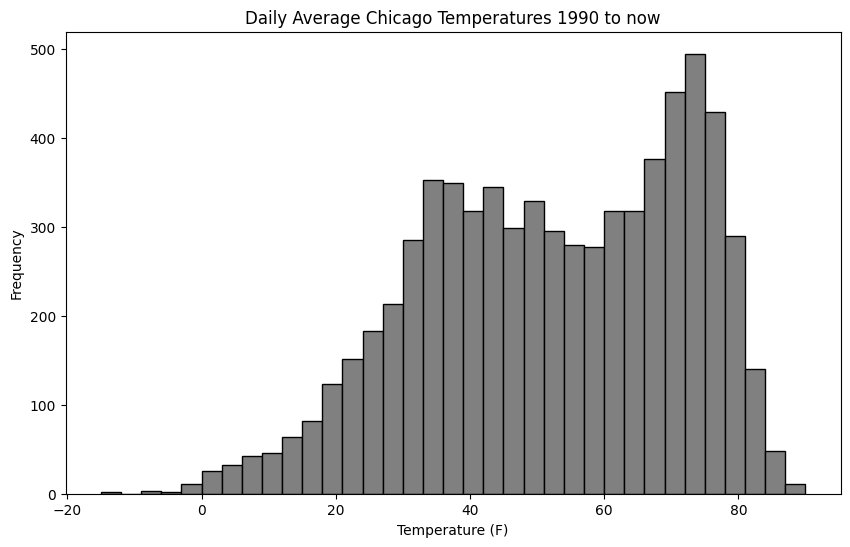

In [330]:
#histogram of daily average Chicago Temperatures 1990 to now
plt.figure(figsize=(10, 6))
plt.hist(noaa_1990['TAVG'], bins=35, color='gray', edgecolor='black')
plt.title('Daily Average Chicago Temperatures 1990 to now')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.show()

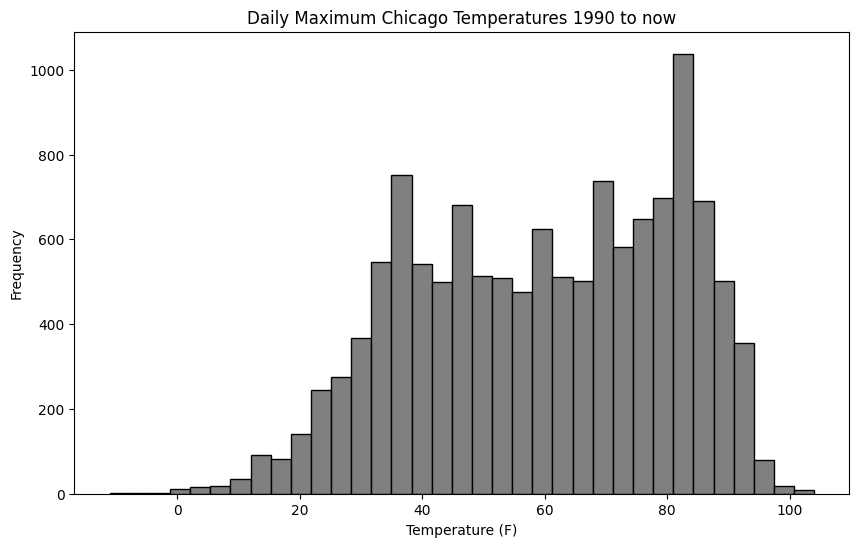

In [331]:
#histogram of daily max Chicago temperatures 1990 to now
plt.figure(figsize=(10, 6))
plt.hist(noaa_1990['TMAX'], bins=35, color='gray', edgecolor='black')
plt.title('Daily Maximum Chicago Temperatures 1990 to now')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.show()

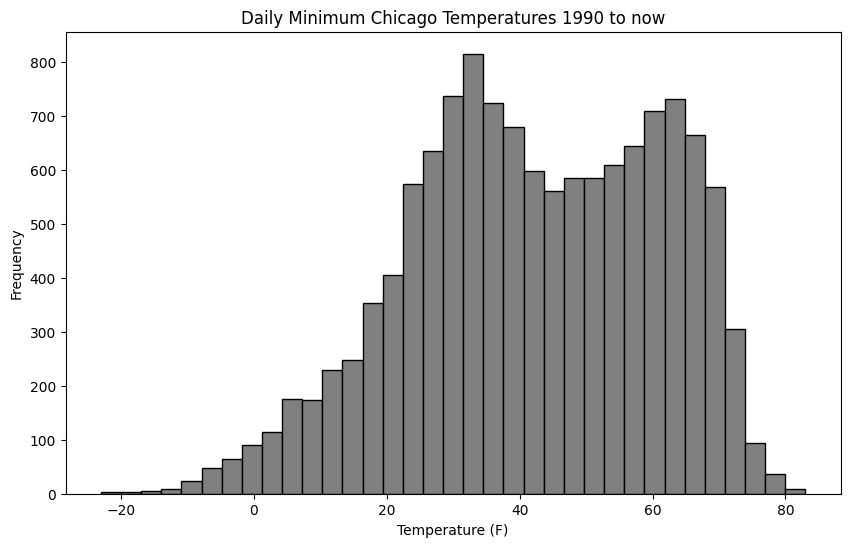

In [332]:
#histogram of daily min Chicago temperatures 1990 to now
plt.figure(figsize=(10, 6))
plt.hist(noaa_1990['TMIN'], bins=35, color='gray', edgecolor='black')
plt.title('Daily Minimum Chicago Temperatures 1990 to now')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.show()

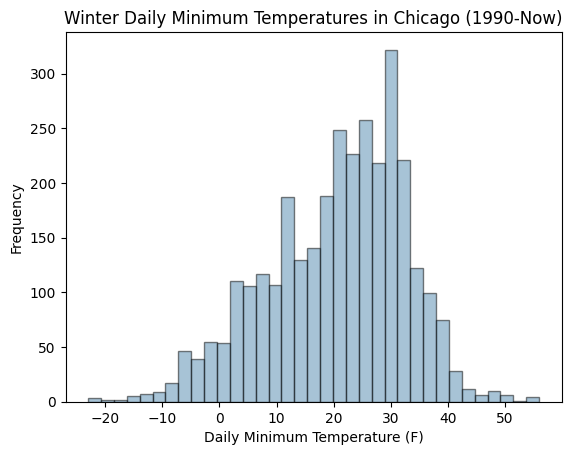

In [333]:
#histogram of winter minimum tmeperatures from 1990 to now
plt.hist(winter_months_weather['TMIN'], bins=35, color='#5088AE', edgecolor='black', alpha=0.5)
plt.xlabel('Daily Minimum Temperature (F)')
plt.ylabel('Frequency')
plt.title('Winter Daily Minimum Temperatures in Chicago (1990-Now)')
plt.show()

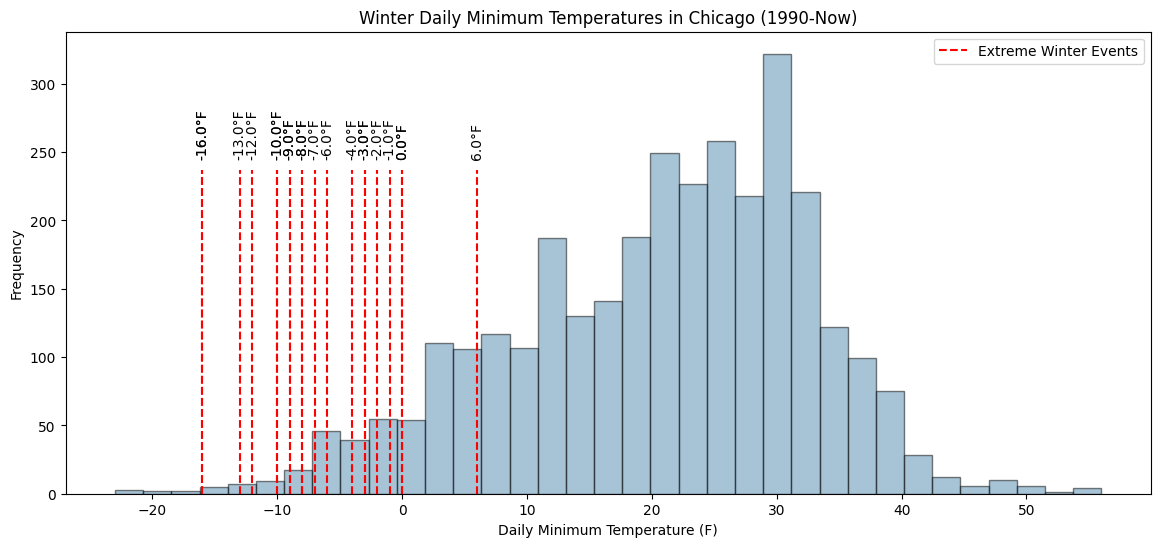

In [334]:
#histogram of winter temperatures with extreme days pointed out
plt.figure(figsize=(14, 6))
plt.hist(winter_months_weather['TMIN'], bins=35, color='#5088AE',alpha=0.5, edgecolor='black', label='Winter Temperatures')

_, ymax = plt.ylim()
line_height = ymax *0.7
for temp in extreme_winter_weather['TMIN']:
    plt.vlines(temp, ymin=0, ymax=line_height, color='red', linestyle='dashed')
    plt.text(temp, line_height + 10, f'{temp:.1f}°F', rotation=90, ha='center', fontsize=10)

red_line = mlines.Line2D([], [], color='red', linestyle='dashed', label='Extreme Winter Events')

plt.xlabel('Daily Minimum Temperature (F)')
plt.ylabel('Frequency')
plt.title('Winter Daily Minimum Temperatures in Chicago (1990-Now)')
plt.legend(handles=[red_line])
plt.show()

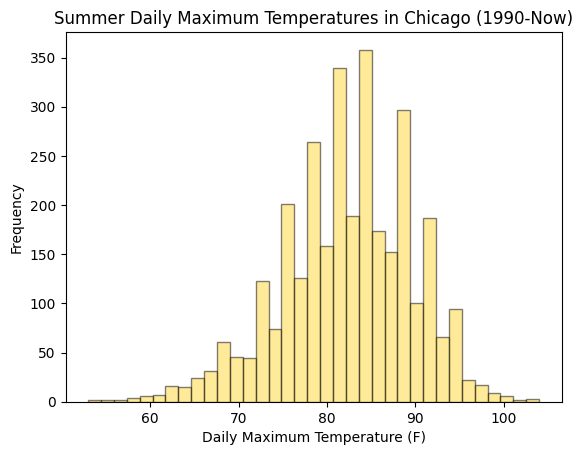

In [335]:
#histogram of summer maximum tmeperatures from 1990 to now
plt.hist(summer_months_weather['TMAX'], bins=35, color='#FFD635', edgecolor='black',alpha=0.5)
plt.xlabel('Daily Maximum Temperature (F)')
plt.ylabel('Frequency')
plt.title('Summer Daily Maximum Temperatures in Chicago (1990-Now)')
plt.show()

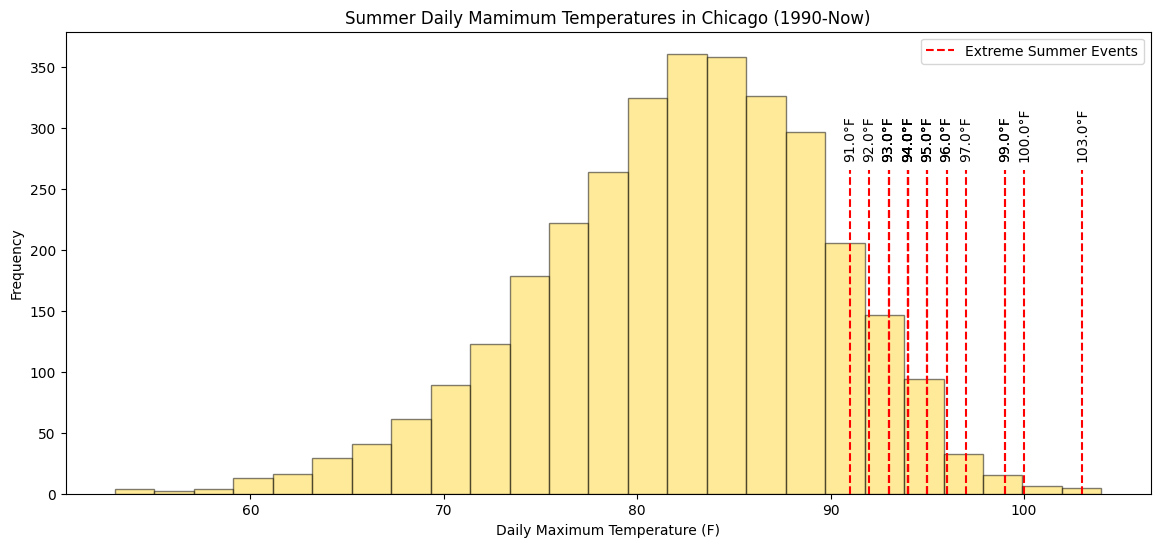

In [336]:
#histogram of summer temperatures with extreme days pointed out
plt.figure(figsize=(14, 6))
plt.hist(summer_months_weather['TMAX'], bins=25, color='#FFD635', edgecolor='black', label='Summer Temperatures',alpha=0.5)

_, ymax = plt.ylim()
line_height = ymax *0.7
for temp in extreme_summer_weather['TMAX']:
    plt.vlines(temp, ymin=0, ymax=line_height, color='red', linestyle='dashed')
    plt.text(temp, line_height + 10, f'{temp:.1f}°F', rotation=90, ha='center', fontsize=10)

red_line = mlines.Line2D([], [], color='red', linestyle='dashed', label='Extreme Summer Events')

plt.xlabel('Daily Maximum Temperature (F)')
plt.ylabel('Frequency')
plt.title('Summer Daily Mamimum Temperatures in Chicago (1990-Now)')
plt.legend(handles=[red_line])
plt.show()

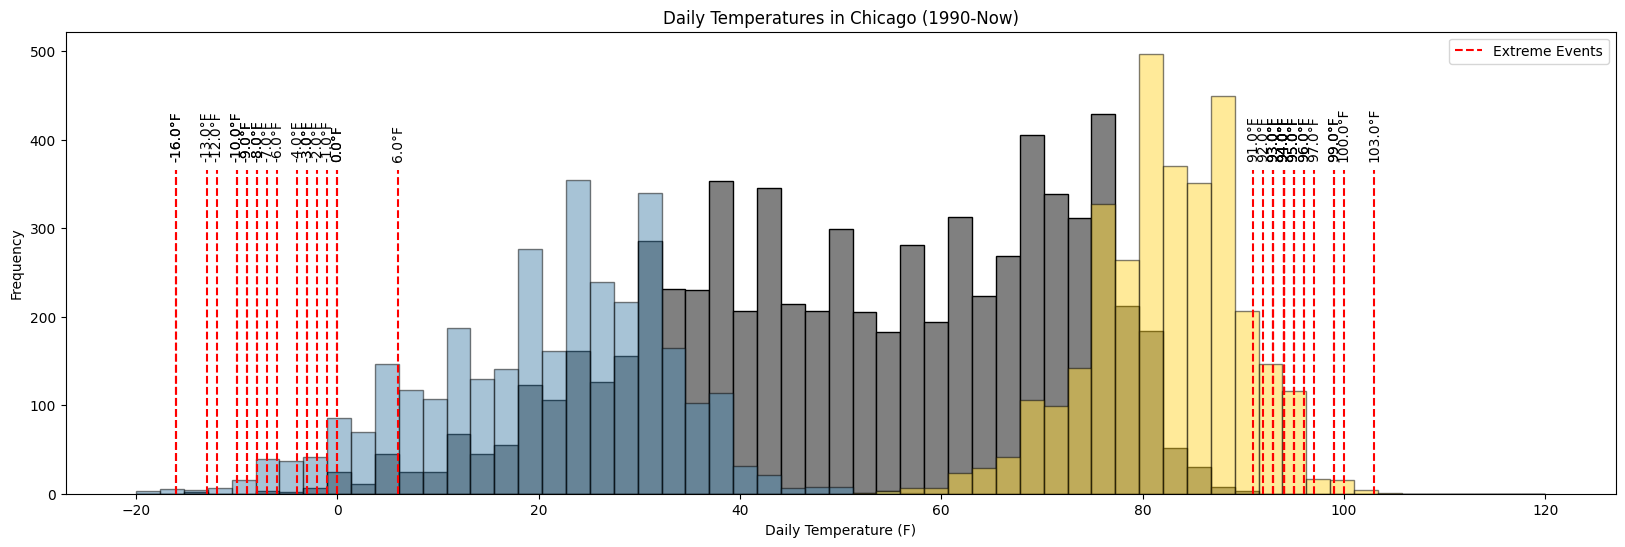

In [337]:
#histogram of average temperatures from 1990 to now with summer and winter temperatres as different colors and extremes pointed out
plt.figure(figsize=(20, 6))
bins_edges = np.linspace(-20, 120, 60)
plt.hist(noaa_1990['TAVG'], bins=bins_edges, color='gray', edgecolor='black', label='All Temperatures')
plt.hist(winter_months_weather['TMIN'], bins=bins_edges, color='#5088AE', edgecolor='black', label='Winter Temperatures', alpha=0.5)
plt.hist(summer_months_weather['TMAX'], bins=bins_edges, color='#FFD635', edgecolor='black', label='Summer Temperatures', alpha=0.5)

_, ymax = plt.ylim()
line_height = ymax *0.7
for temp in extreme_summer_weather['TMAX']:
    plt.vlines(temp, ymin=0, ymax=line_height, color='red', linestyle='dashed')
    plt.text(temp, line_height + 14, f'{temp:.1f}°F', rotation=90, ha='center', fontsize=10)
for temp in extreme_winter_weather['TMIN']:
    plt.vlines(temp, ymin=0, ymax=line_height, color='red', linestyle='dashed')
    plt.text(temp, line_height + 14, f'{temp:.1f}°F', rotation=90, ha='center', fontsize=10)

red_line = mlines.Line2D([], [], color='red', linestyle='dashed', label='Extreme Events')

plt.xlabel('Daily Temperature (F)')
plt.ylabel('Frequency')
plt.title('Daily Temperatures in Chicago (1990-Now)')
plt.legend(handles=[red_line])
plt.show()

**Temperature Signifigance Testing**

In [338]:
#signifigance testing to see if there is a difference between winter minimum temperatures and all minimum temperatues
variables = ['TMIN']
results = []
for variable in variables:
    full_data = noaa_1990[variable].dropna()
    filtered_data = winter_months_weather[variable].dropna()
    stat, p_value = ttest_ind(full_data, filtered_data, equal_var=False)
    results.append({
        'Variable': variable,
        'Test Statistic': stat,
        'P-value': p_value,
        'Significant': p_value < 0.05
    })
t_test_results = pd.DataFrame(results)
print(t_test_results)


  Variable  Test Statistic  P-value  Significant
0     TMIN       79.448057      0.0         True


In [339]:
#signifigance test to see if there is a difference between winter extreme and all winter
variables = ['TMIN']
results = []
for variable in variables:
    full_data = winter_months_weather[variable].dropna()
    filtered_data = extreme_winter_weather[variable].dropna()
    stat, p_value = ttest_ind(full_data, filtered_data, equal_var=False)
    results.append({
        'Variable': variable,
        'Test Statistic': stat,
        'P-value': p_value,
        'Significant': p_value < 0.05
    })
t_test_results = pd.DataFrame(results)
print(t_test_results)

  Variable  Test Statistic       P-value  Significant
0     TMIN       20.989059  3.961775e-15         True


In [340]:
#signifigance test to see if there is a difference between summer data and all data
variables = ['TMAX']
results = []
for variable in variables:
    full_data = noaa_1990[variable].dropna()
    filtered_data = summer_months_weather[variable].dropna()
    stat, p_value = ttest_ind(full_data, filtered_data, equal_var=False)
    results.append({
        'Variable': variable,
        'Test Statistic': stat,
        'P-value': p_value,
        'Significant': p_value < 0.05
    })
t_test_results = pd.DataFrame(results)
print(t_test_results)

  Variable  Test Statistic  P-value  Significant
0     TMAX      -99.937782      0.0         True


In [341]:
#signifigance test to see if there is a difference between summer extreme and all summer
variables = ['TMAX']
results = []
for variable in variables:
    full_data = summer_months_weather[variable].dropna()
    filtered_data = extreme_summer_weather[variable].dropna()
    stat, p_value = ttest_ind(full_data, filtered_data, equal_var=False)
    results.append({
        'Variable': variable,
        'Test Statistic': stat,
        'P-value': p_value,
        'Significant': p_value < 0.05
    })
t_test_results = pd.DataFrame(results)
print(t_test_results)

  Variable  Test Statistic       P-value  Significant
0     TMAX      -19.360709  1.222512e-14         True


**Natural Gas Price Graphs**

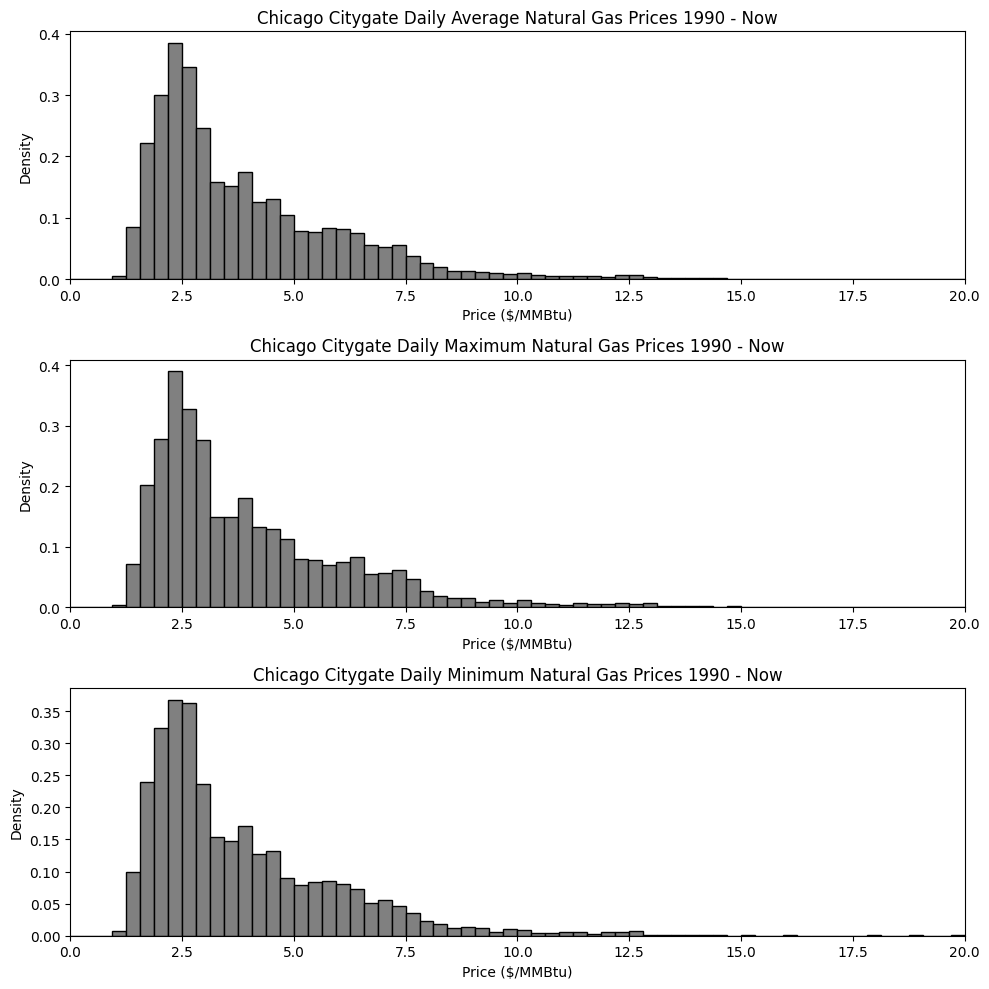

In [342]:
#ALL daily natural gas prices (average, max, min)
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
bin_edges = np.linspace(0, 20, 65)
axes[0].hist(temp_and_gas_all['averages'], bins = bin_edges, edgecolor='black', density=True, color='gray')
axes[0].set_xlabel('Price ($/MMBtu)')
axes[0].set_ylabel('Density')
axes[0].set_title('Chicago Citygate Daily Average Natural Gas Prices 1990 - Now')
axes[0].set_xlim(0, 20)
axes[1].hist(temp_and_gas_all['highs'], bins = bin_edges, edgecolor='black', density=True, color='gray')
axes[1].set_xlabel('Price ($/MMBtu)')
axes[1].set_ylabel('Density')
axes[1].set_title('Chicago Citygate Daily Maximum Natural Gas Prices 1990 - Now')
axes[1].set_xlim(0, 20)
axes[2].hist(temp_and_gas_all['lows'], bins = bin_edges, edgecolor='black', density=True, color='gray')
axes[2].set_xlabel('Price ($/MMBtu)')
axes[2].set_ylabel('Density')
axes[2].set_title('Chicago Citygate Daily Minimum Natural Gas Prices 1990 - Now')
axes[2].set_xlim(0, 20)
plt.tight_layout()
plt.show()

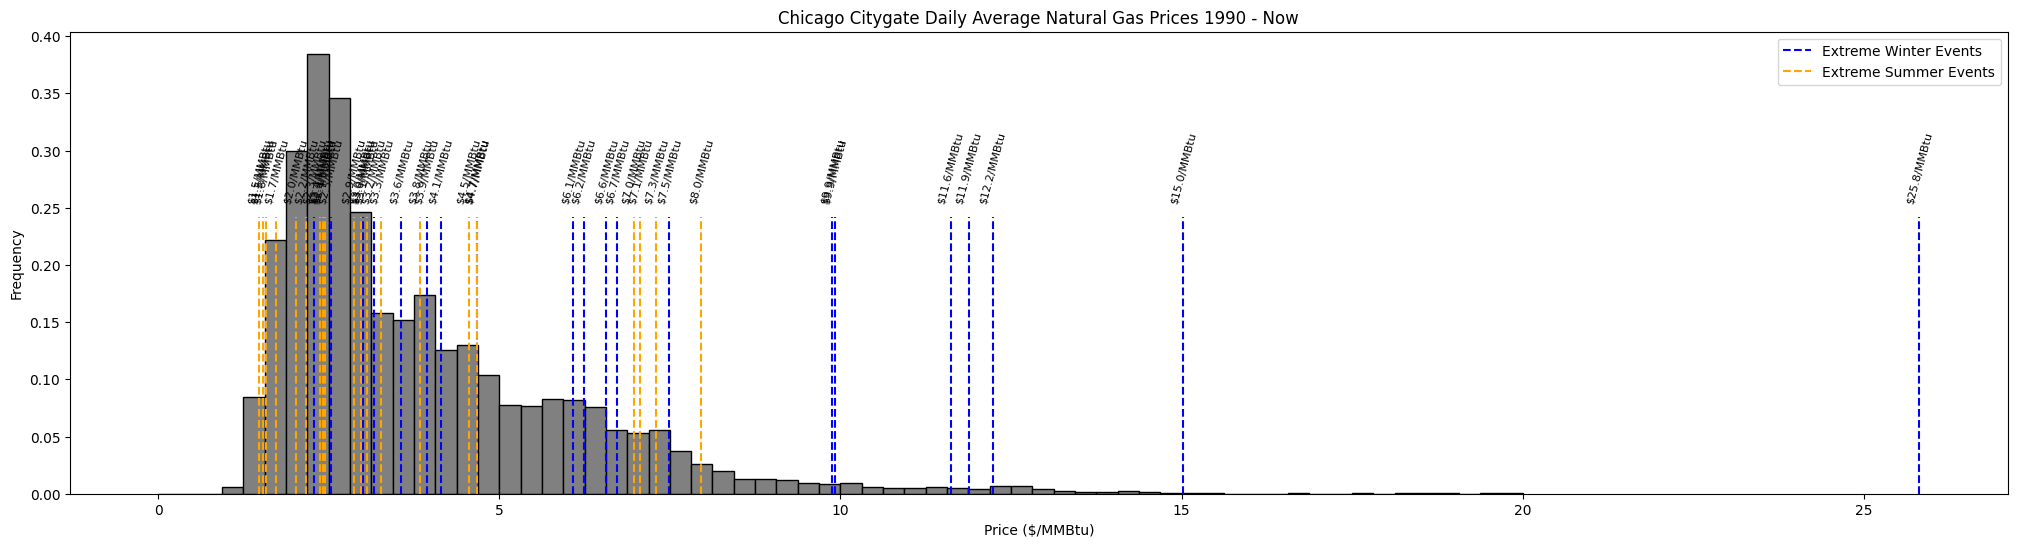

In [343]:
#histogram of all average gas prices with winter and summer extremes pointed out
plt.figure(figsize=(25, 6))
bin_edges = np.linspace(0, 20, 65)
plt.hist(temp_and_gas_all['averages'], bins = bin_edges, edgecolor='black', density=True, color='gray', label='All Prices')

_, ymax = plt.ylim()
line_height = ymax * .6
for price in temp_and_gas_exwinter['averages']:
    plt.vlines(price, ymin=0, ymax=line_height, color='blue', linestyle='dashed')
    plt.text(price, line_height *1.05, f'${price:.1f}/MMBtu', rotation=75, ha='center', fontsize=8)
for price in temp_and_gas_exsummer['averages']:
    plt.vlines(price, ymin=0, ymax=line_height, color='orange', linestyle='dashed')
    plt.text(price, line_height *1.05, f'${price:.1f}/MMBtu', rotation=75, ha='center', fontsize=8)

blue_line = mlines.Line2D([], [], color='blue', linestyle='dashed', label='Extreme Winter Events')
orange_line = mlines.Line2D([], [], color='orange', linestyle='dashed', label='Extreme Summer Events')

plt.xlabel('Price ($/MMBtu)')
plt.ylabel('Frequency')
plt.title('Chicago Citygate Daily Average Natural Gas Prices 1990 - Now')
plt.legend(handles=[blue_line, orange_line])
plt.show()


#this is a good histogram. the only problem is that the number of prices are difficult to see 
#below is a new histogram with some fixes

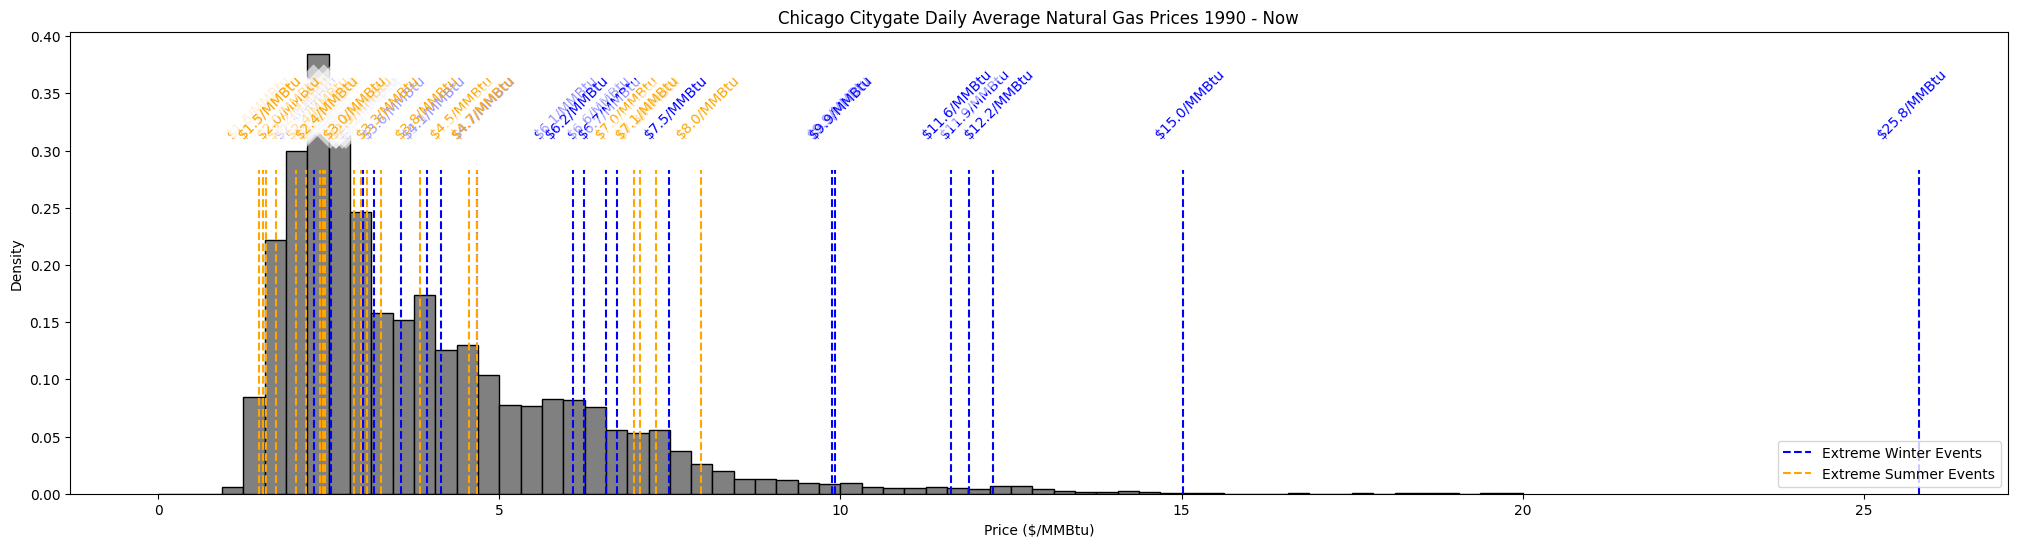

In [344]:
# Create the histogram
plt.figure(figsize=(25, 6))
bin_edges = np.linspace(0, 20, 65)

plt.hist(temp_and_gas_all['averages'], bins=bin_edges, edgecolor='black', 
         density=True, color='gray', label='All Prices')

# Set limits and calculate proper line height
_, ymax = plt.ylim()
line_height = ymax * 0.7  # Line height proportional to ymax

# Function to slightly adjust label positions for readability
def get_offset(index, total):
    """Offsets text placement for better readability in clusters."""
    if total > 10:
        return (-0.1 if index % 2 == 0 else 0.1)  # Small left/right shift
    return 0  # No shift if there are few labels

# Add vertical lines and text for extreme winter prices
for i, price in enumerate(temp_and_gas_exwinter['averages']):
    plt.vlines(price, ymin=0, ymax=line_height, color='blue', linestyle='dashed')
    plt.text(price + get_offset(i, len(temp_and_gas_exwinter['averages'])), 
             line_height * 1.1, 
             f'${price:.1f}/MMBtu', 
             rotation=45, ha='center', fontsize=10, color='blue',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))  # Transparent box

# Add vertical lines and text for extreme summer prices
for i, price in enumerate(temp_and_gas_exsummer['averages']):
    plt.vlines(price, ymin=0, ymax=line_height, color='orange', linestyle='dashed')
    plt.text(price + get_offset(i, len(temp_and_gas_exsummer['averages'])), 
             line_height * 1.1, 
             f'${price:.1f}/MMBtu', 
             rotation=45, ha='center', fontsize=10, color='orange',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))  # Transparent box

# Custom legend
blue_line = mlines.Line2D([], [], color='blue', linestyle='dashed', label='Extreme Winter Events')
orange_line = mlines.Line2D([], [], color='orange', linestyle='dashed', label='Extreme Summer Events')

plt.xlabel('Price ($/MMBtu)')
plt.ylabel('Density')
plt.title('Chicago Citygate Daily Average Natural Gas Prices 1990 - Now')
plt.legend(handles=[blue_line, orange_line])

plt.show()


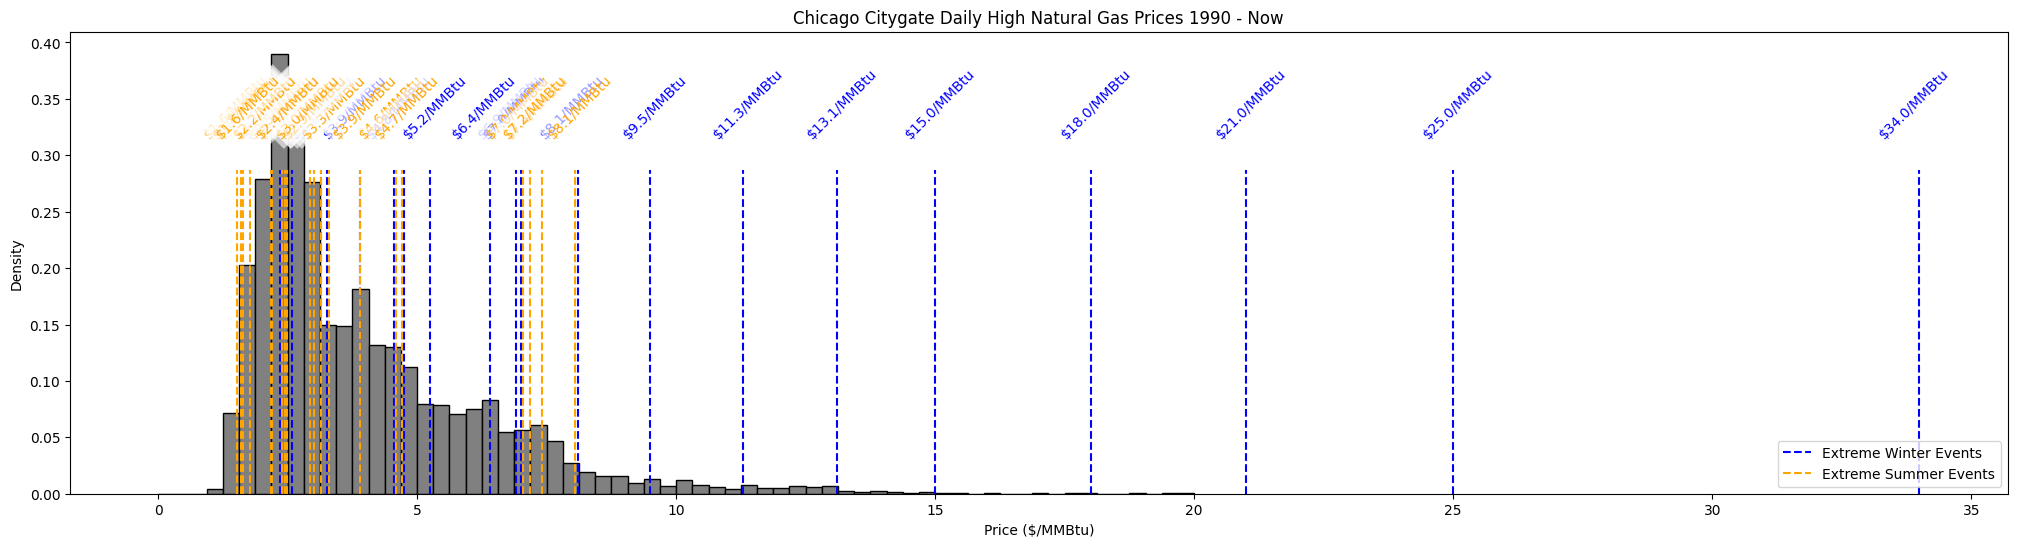

In [345]:
# Create the histogram
plt.figure(figsize=(25, 6))
bin_edges = np.linspace(0, 20, 65)

plt.hist(temp_and_gas_all['highs'], bins=bin_edges, edgecolor='black', 
         density=True, color='gray', label='All Daily High Prices')

# Set limits and calculate proper line height
_, ymax = plt.ylim()
line_height = ymax * 0.7  # Line height proportional to ymax

# Function to slightly adjust label positions for readability
def get_offset(index, total):
    """Offsets text placement for better readability in clusters."""
    if total > 10:
        return (-0.1 if index % 2 == 0 else 0.1)  # Small left/right shift
    return 0  # No shift if there are few labels

# Add vertical lines and text for extreme winter prices
for i, price in enumerate(temp_and_gas_exwinter['highs']):
    plt.vlines(price, ymin=0, ymax=line_height, color='blue', linestyle='dashed')
    plt.text(price + get_offset(i, len(temp_and_gas_exwinter['highs'])), 
             line_height * 1.1, 
             f'${price:.1f}/MMBtu', 
             rotation=45, ha='center', fontsize=10, color='blue',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))  # Transparent box

# Add vertical lines and text for extreme summer prices
for i, price in enumerate(temp_and_gas_exsummer['highs']):
    plt.vlines(price, ymin=0, ymax=line_height, color='orange', linestyle='dashed')
    plt.text(price + get_offset(i, len(temp_and_gas_exsummer['highs'])), 
             line_height * 1.1, 
             f'${price:.1f}/MMBtu', 
             rotation=45, ha='center', fontsize=10, color='orange',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))  # Transparent box

# Custom legend
blue_line = mlines.Line2D([], [], color='blue', linestyle='dashed', label='Extreme Winter Events')
orange_line = mlines.Line2D([], [], color='orange', linestyle='dashed', label='Extreme Summer Events')

plt.xlabel('Price ($/MMBtu)')
plt.ylabel('Density')
plt.title('Chicago Citygate Daily High Natural Gas Prices 1990 - Now')
plt.legend(handles=[blue_line, orange_line])

plt.show()


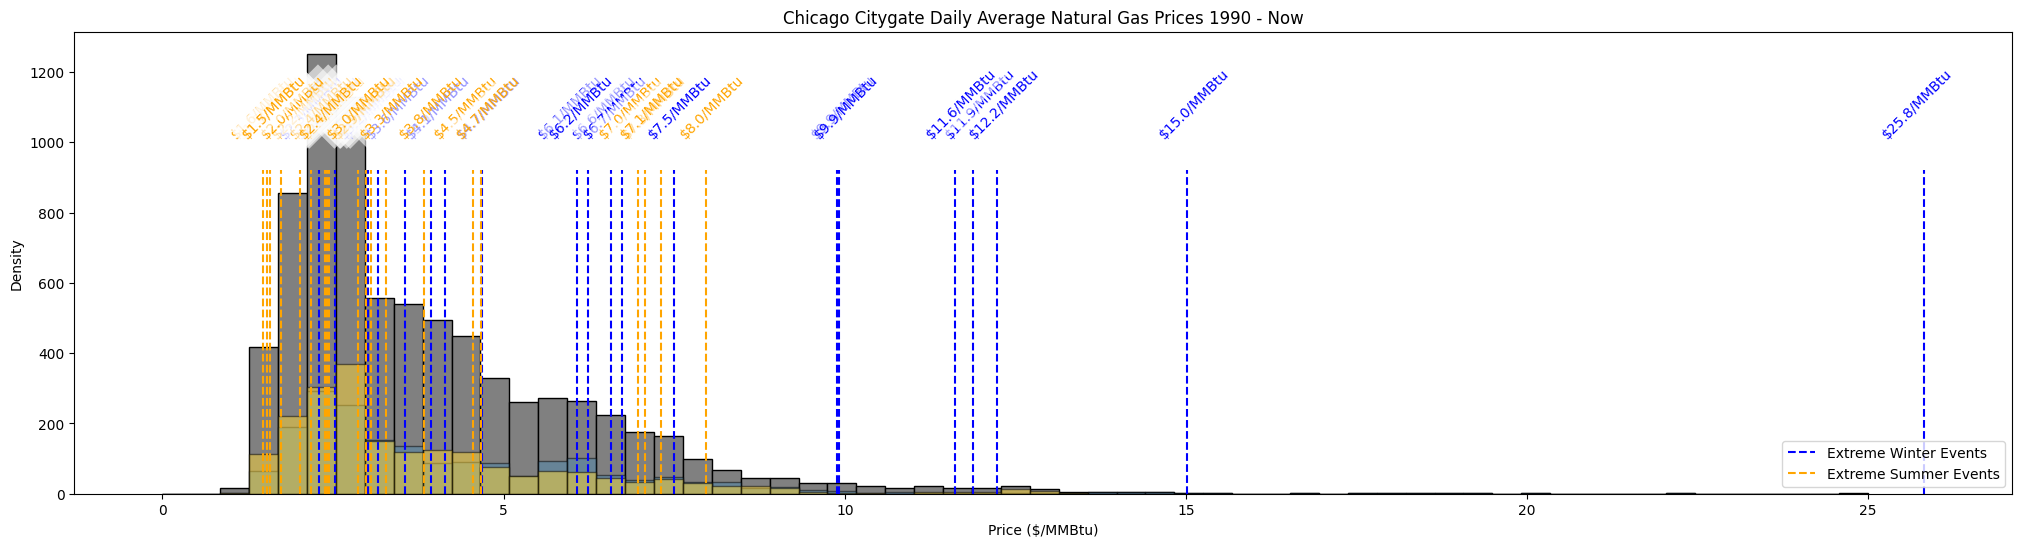

In [346]:
# Create the histogram
plt.figure(figsize=(25, 6))

bins_edges = np.linspace(0, 25, 60)
plt.hist(temp_and_gas_all['averages'], bins=bins_edges, color='gray', edgecolor='black', label='All Prices')
plt.hist(temp_and_gas_winter['averages'], bins=bins_edges, color='#5088AE', edgecolor='black', label='Winter Prices', alpha=0.5)
plt.hist(temp_and_gas_summer['averages'], bins=bins_edges, color='#FFD635', edgecolor='black', label='Summer Prices', alpha=0.5)

# Set limits and calculate proper line height
_, ymax = plt.ylim()
line_height = ymax * 0.7  # Line height proportional to ymax

# Function to slightly adjust label positions for readability
def get_offset(index, total):
    """Offsets text placement for better readability in clusters."""
    if total > 10:
        return (-0.1 if index % 2 == 0 else 0.1)  # Small left/right shift
    return 0  # No shift if there are few labels

# Add vertical lines and text for extreme winter prices
for i, price in enumerate(temp_and_gas_exwinter['averages']):
    plt.vlines(price, ymin=0, ymax=line_height, color='blue', linestyle='dashed')
    plt.text(price + get_offset(i, len(temp_and_gas_exwinter['averages'])), 
             line_height * 1.1, 
             f'${price:.1f}/MMBtu', 
             rotation=45, ha='center', fontsize=10, color='blue',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))  # Transparent box

# Add vertical lines and text for extreme summer prices
for i, price in enumerate(temp_and_gas_exsummer['averages']):
    plt.vlines(price, ymin=0, ymax=line_height, color='orange', linestyle='dashed')
    plt.text(price + get_offset(i, len(temp_and_gas_exsummer['averages'])), 
             line_height * 1.1, 
             f'${price:.1f}/MMBtu', 
             rotation=45, ha='center', fontsize=10, color='orange',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))  # Transparent box

# Custom legend
blue_line = mlines.Line2D([], [], color='blue', linestyle='dashed', label='Extreme Winter Events')
orange_line = mlines.Line2D([], [], color='orange', linestyle='dashed', label='Extreme Summer Events')

plt.xlabel('Price ($/MMBtu)')
plt.ylabel('Density')
plt.title('Chicago Citygate Daily Average Natural Gas Prices 1990 - Now')
plt.legend(handles=[blue_line, orange_line])

plt.show()


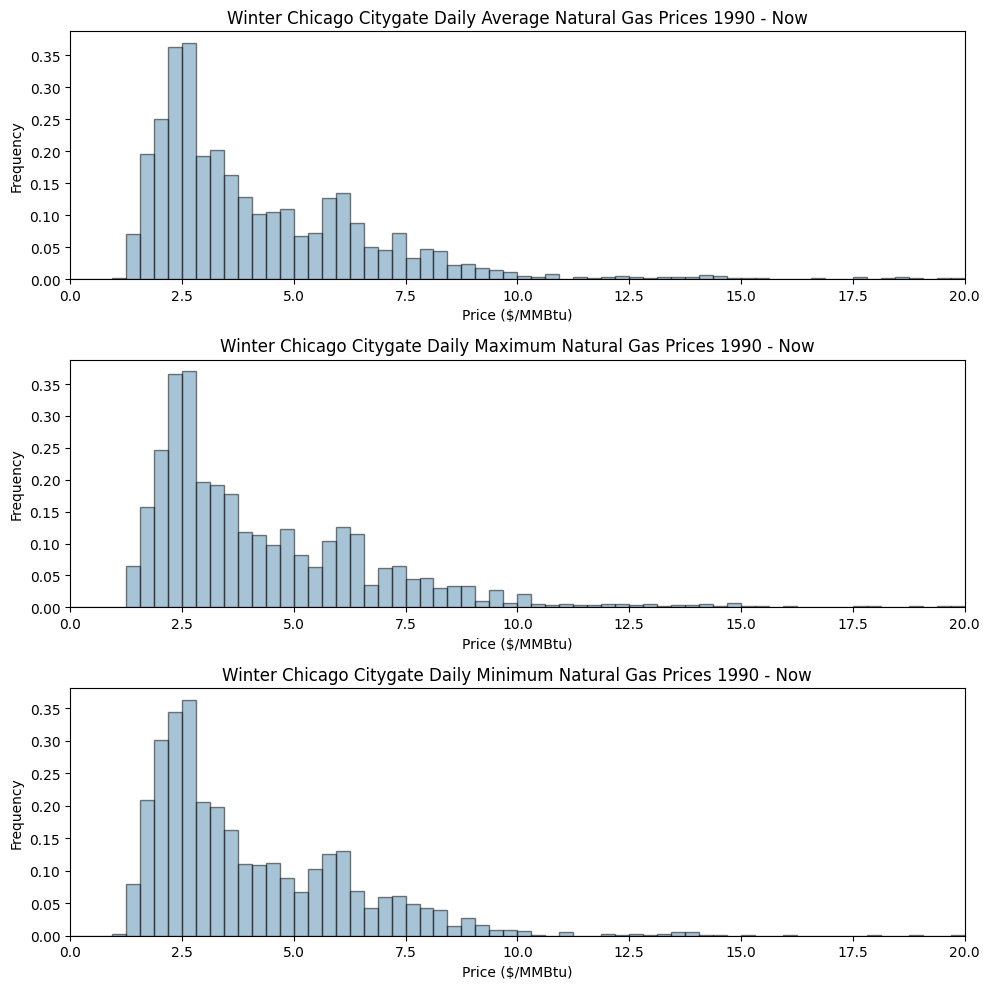

In [347]:
#Winter daily natural gas prices (average, max, min)
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
bin_edges = np.linspace(0, 20, 65)
axes[0].hist(temp_and_gas_winter['averages'], bins=bin_edges, edgecolor='black', density=True, color='#5088AE', alpha=0.5)
axes[0].set_xlabel('Price ($/MMBtu)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Winter Chicago Citygate Daily Average Natural Gas Prices 1990 - Now')
axes[0].set_xlim(0, 20)
axes[1].hist(temp_and_gas_winter['highs'], bins=bin_edges, edgecolor='black', density=True, color='#5088AE', alpha=0.5)
axes[1].set_xlabel('Price ($/MMBtu)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Winter Chicago Citygate Daily Maximum Natural Gas Prices 1990 - Now')
axes[1].set_xlim(0, 20)
axes[2].hist(temp_and_gas_winter['lows'], bins=bin_edges, edgecolor='black', density=True, color='#5088AE', alpha=0.5)
axes[2].set_xlabel('Price ($/MMBtu)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Winter Chicago Citygate Daily Minimum Natural Gas Prices 1990 - Now')
axes[2].set_xlim(0, 20)
plt.tight_layout()
plt.show()

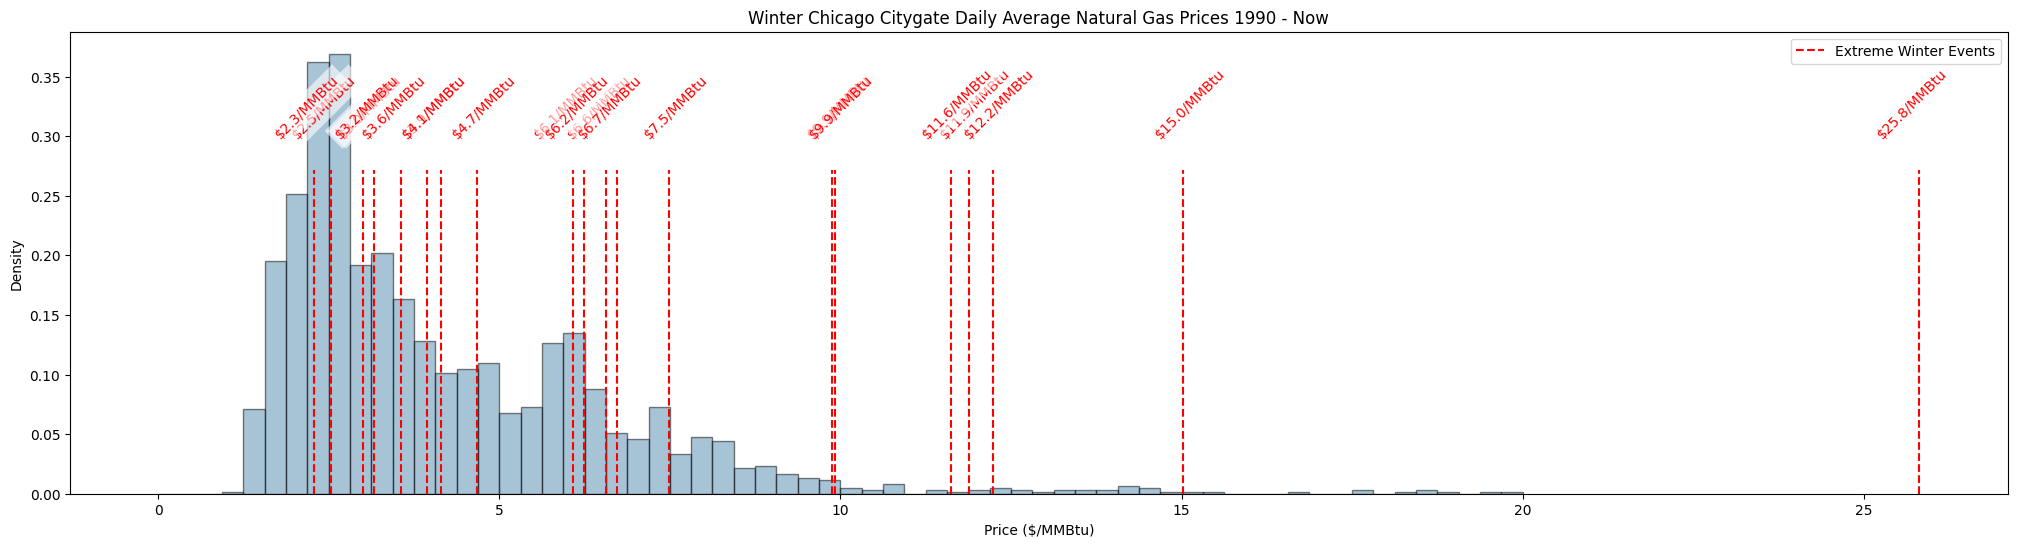

In [348]:
# Create the histogram
plt.figure(figsize=(25, 6))
bin_edges = np.linspace(0, 20, 65)

plt.hist(temp_and_gas_winter['averages'], bins=bin_edges, edgecolor='black', 
         density=True, color='#5088AE', alpha=0.5, label='All Winter Prices')

_, ymax = plt.ylim()
line_height = ymax * 0.7 

# Function to slightly adjust label positions for readability
def get_offset(index, total):
    """Offsets text placement for better readability in clusters."""
    if total > 10:
        return (-0.1 if index % 2 == 0 else 0.1)  # Small left/right shift
    return 0  # No shift if there are few labels

# Add vertical lines and text for extreme winter prices
for i, price in enumerate(temp_and_gas_exwinter['averages']):
    plt.vlines(price, ymin=0, ymax=line_height, color='red', linestyle='dashed')
    plt.text(price + get_offset(i, len(temp_and_gas_exwinter['averages'])), 
             line_height * 1.1, 
             f'${price:.1f}/MMBtu', 
             rotation=45, ha='center', fontsize=10, color='red',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))  # Transparent box

red_line = mlines.Line2D([], [], color='red', linestyle='dashed', label='Extreme Winter Events')

plt.xlabel('Price ($/MMBtu)')
plt.ylabel('Density')
plt.title('Winter Chicago Citygate Daily Average Natural Gas Prices 1990 - Now')
plt.legend(handles=[red_line])

plt.show()


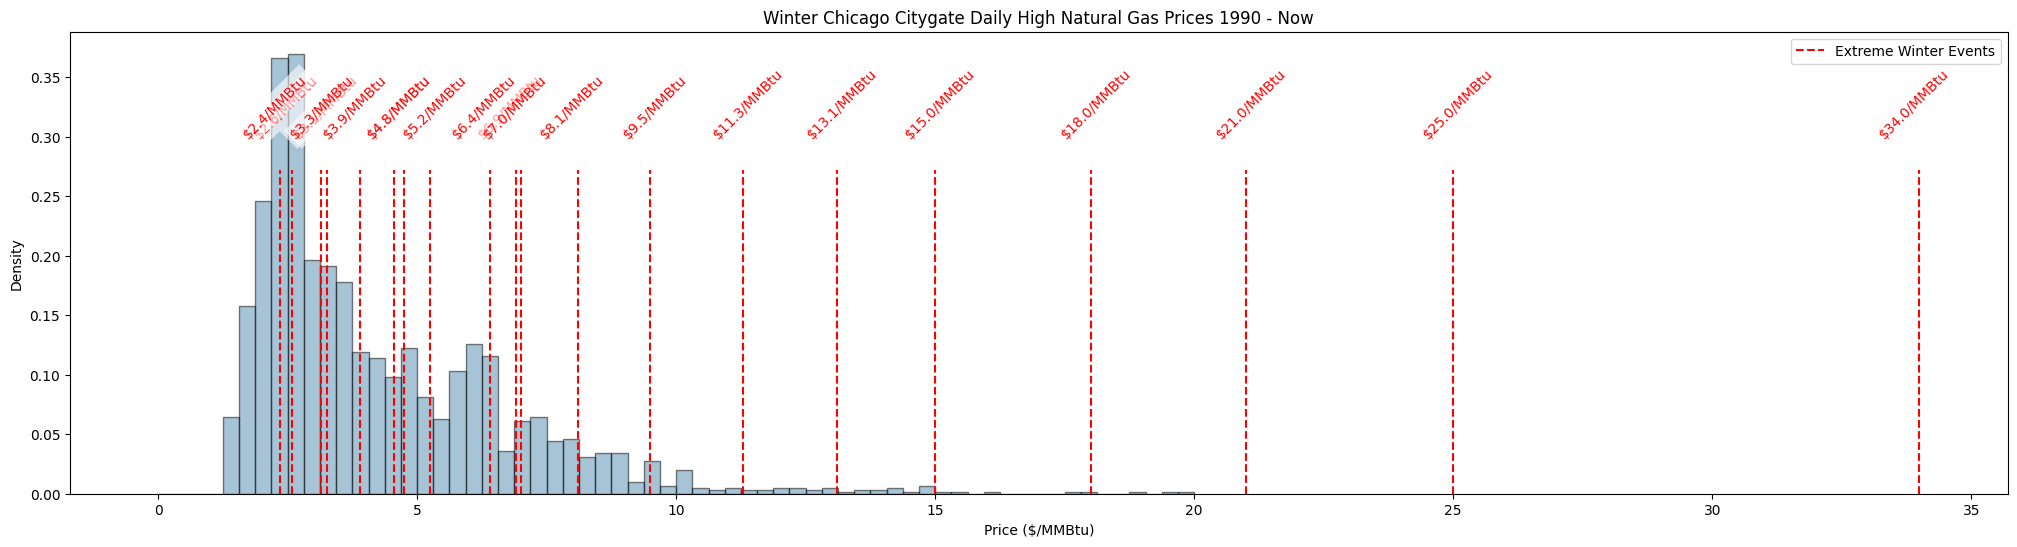

In [349]:
# Create the histogram
plt.figure(figsize=(25, 6))
bin_edges = np.linspace(0, 20, 65)

plt.hist(temp_and_gas_winter['highs'], bins=bin_edges, edgecolor='black', 
         density=True, color='#5088AE', alpha=0.5, label='High Winter Prices')

_, ymax = plt.ylim()
line_height = ymax * 0.7 

# Function to slightly adjust label positions for readability
def get_offset(index, total):
    """Offsets text placement for better readability in clusters."""
    if total > 10:
        return (-0.1 if index % 2 == 0 else 0.1)  # Small left/right shift
    return 0  # No shift if there are few labels

# Add vertical lines and text for extreme winter prices
for i, price in enumerate(temp_and_gas_exwinter['highs']):
    plt.vlines(price, ymin=0, ymax=line_height, color='red', linestyle='dashed')
    plt.text(price + get_offset(i, len(temp_and_gas_exwinter['highs'])), 
             line_height * 1.1, 
             f'${price:.1f}/MMBtu', 
             rotation=45, ha='center', fontsize=10, color='red',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))  # Transparent box

red_line = mlines.Line2D([], [], color='red', linestyle='dashed', label='Extreme Winter Events')

plt.xlabel('Price ($/MMBtu)')
plt.ylabel('Density')
plt.title('Winter Chicago Citygate Daily High Natural Gas Prices 1990 - Now')
plt.legend(handles=[red_line])

plt.show()


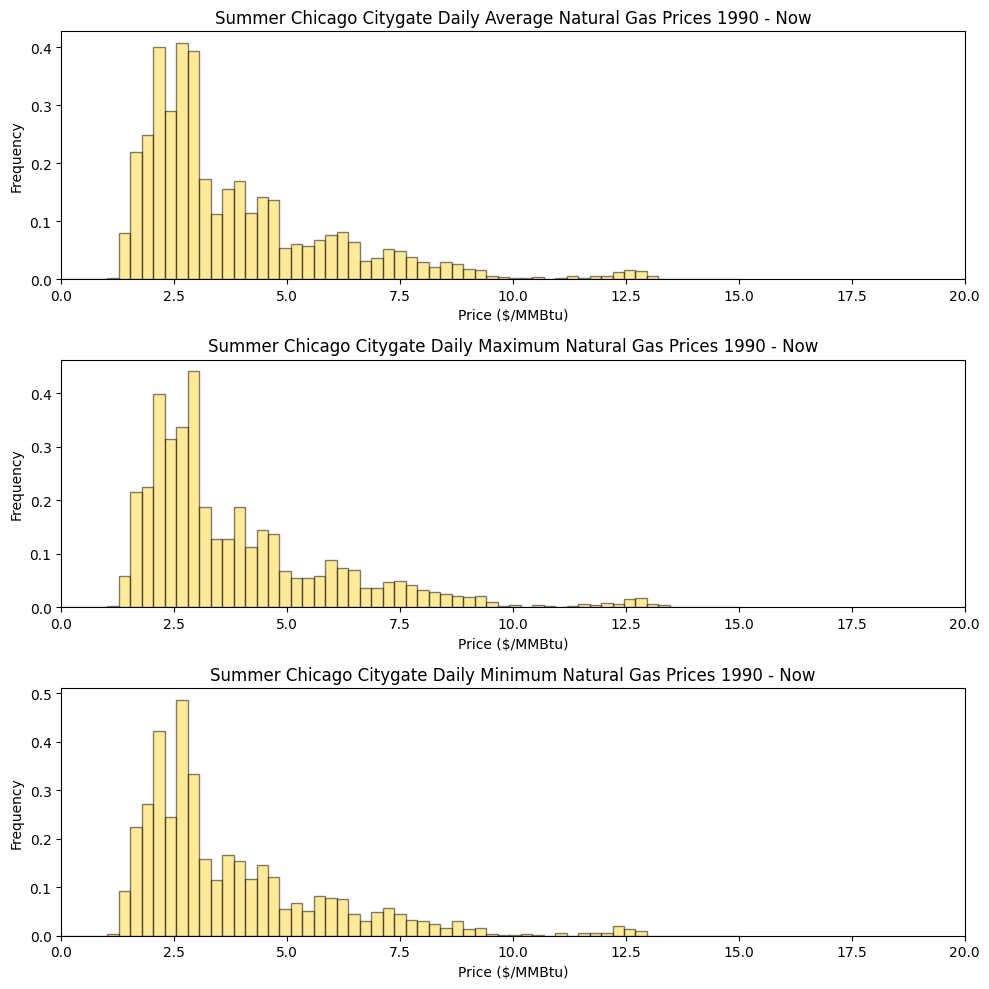

In [350]:
#Summer daily natural gas prices (average, max, min)
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
bin_edges = np.linspace(0, 15, 60)
axes[0].hist(temp_and_gas_summer['averages'], bins=bin_edges, edgecolor='black', density=True, color='#FFD635', alpha=0.5)
axes[0].set_xlabel('Price ($/MMBtu)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Summer Chicago Citygate Daily Average Natural Gas Prices 1990 - Now')
axes[0].set_xlim(0, 20)
axes[1].hist(temp_and_gas_summer['highs'], bins=bin_edges, edgecolor='black', density=True, color='#FFD635', alpha=0.5)
axes[1].set_xlabel('Price ($/MMBtu)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Summer Chicago Citygate Daily Maximum Natural Gas Prices 1990 - Now')
axes[1].set_xlim(0, 20)
axes[2].hist(temp_and_gas_summer['lows'], bins=bin_edges, edgecolor='black', density=True, color='#FFD635',alpha=0.5)
axes[2].set_xlabel('Price ($/MMBtu)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Summer Chicago Citygate Daily Minimum Natural Gas Prices 1990 - Now')
axes[2].set_xlim(0, 20)
plt.tight_layout()
plt.show()

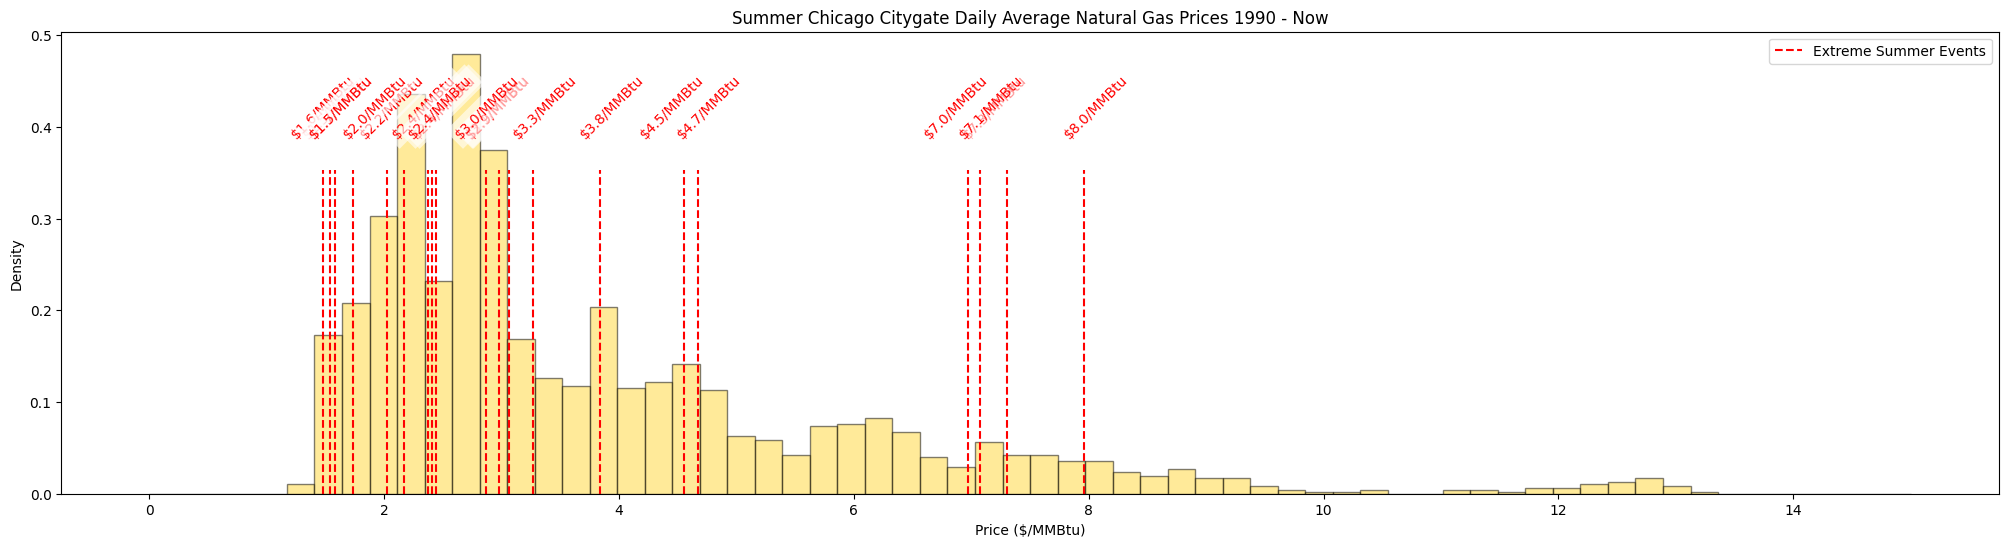

In [351]:
plt.figure(figsize=(25, 6))
bin_edges = np.linspace(0, 15, 65)

plt.hist(temp_and_gas_summer['averages'], bins=bin_edges, edgecolor='black', 
         density=True, color='#FFD635', label='Summer Prices', alpha = 0.5)

# Set limits and calculate proper line height
_, ymax = plt.ylim()
line_height = ymax * 0.7  # Line height proportional to ymax

# Function to slightly adjust label positions for readability
def get_offset(index, total):
    """Offsets text placement for better readability in clusters."""
    if total > 10:
        return (-0.1 if index % 2 == 0 else 0.1)  # Small left/right shift
    return 0  # No shift if there are few labels

# Add vertical lines and text for extreme summer prices
for i, price in enumerate(temp_and_gas_exsummer['averages']):
    plt.vlines(price, ymin=0, ymax=line_height, color='red', linestyle='dashed')
    plt.text(price + get_offset(i, len(temp_and_gas_exsummer['averages'])), 
             line_height * 1.1, 
             f'${price:.1f}/MMBtu', 
             rotation=45, ha='center', fontsize=10, color='red',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))  # Transparent box

# Custom legend
red_line = mlines.Line2D([], [], color='red', linestyle='dashed', label='Extreme Summer Events')

plt.xlabel('Price ($/MMBtu)')
plt.ylabel('Density')
plt.title('Summer Chicago Citygate Daily Average Natural Gas Prices 1990 - Now')
plt.legend(handles=[red_line])

plt.show()


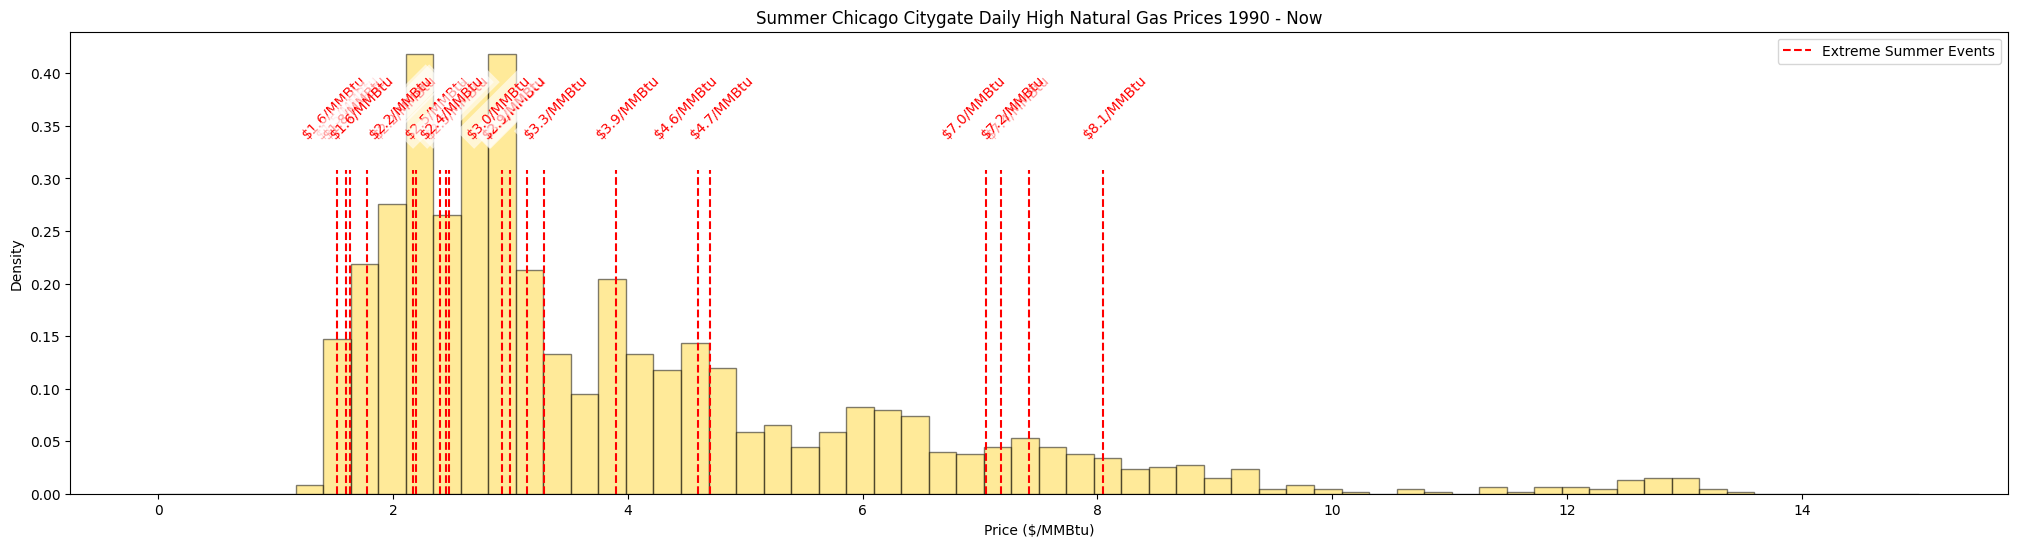

In [352]:
plt.figure(figsize=(25, 6))
bin_edges = np.linspace(0, 15, 65)

plt.hist(temp_and_gas_summer['highs'], bins=bin_edges, edgecolor='black', 
         density=True, color='#FFD635', alpha = 0.5,label='Summer High Prices')

# Set limits and calculate proper line height
_, ymax = plt.ylim()
line_height = ymax * 0.7  # Line height proportional to ymax

# Function to slightly adjust label positions for readability
def get_offset(index, total):
    """Offsets text placement for better readability in clusters."""
    if total > 10:
        return (-0.1 if index % 2 == 0 else 0.1)  # Small left/right shift
    return 0  # No shift if there are few labels

# Add vertical lines and text for extreme summer prices
for i, price in enumerate(temp_and_gas_exsummer['highs']):
    plt.vlines(price, ymin=0, ymax=line_height, color='red', linestyle='dashed')
    plt.text(price + get_offset(i, len(temp_and_gas_exsummer['highs'])), 
             line_height * 1.1, 
             f'${price:.1f}/MMBtu', 
             rotation=45, ha='center', fontsize=10, color='red',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))  # Transparent box

# Custom legend
red_line = mlines.Line2D([], [], color='red', linestyle='dashed', label='Extreme Summer Events')

plt.xlabel('Price ($/MMBtu)')
plt.ylabel('Density')
plt.title('Summer Chicago Citygate Daily High Natural Gas Prices 1990 - Now')
plt.legend(handles=[red_line])

plt.show()


**Natural Gas Price Signifigance Testing**

In [353]:
#testing to see if winter gas prices are different from all gas prices
variables = ['averages', 'lows', 'highs']

results = []

for variable in variables:
    full_data = temp_and_gas_all[variable].dropna()
    filtered_data = temp_and_gas_winter[variable].dropna()
    stat, p_value = ttest_ind(full_data, filtered_data, equal_var=False)
    results.append({
        'Variable': variable,
        'Test Statistic': stat,
        'P-value': p_value,
        'Significant': p_value < 0.05
    })

t_test_results = pd.DataFrame(results)
print(t_test_results)

   Variable  Test Statistic   P-value  Significant
0  averages       -3.934112  0.000086         True
1      lows       -4.059148  0.000051         True
2     highs       -3.554320  0.000387         True


In [354]:
#testing to see if winter extremes are different from all winter gas prices
variables = ['averages', 'lows', 'highs']

results = []

for variable in variables:
    full_data = temp_and_gas_winter[variable].dropna()
    filtered_data = temp_and_gas_exwinter[variable].dropna()
    stat, p_value = ttest_ind(full_data, filtered_data, equal_var=False)
    results.append({
        'Variable': variable,
        'Test Statistic': stat,
        'P-value': p_value,
        'Significant': p_value < 0.05
    })

t_test_results = pd.DataFrame(results)
print(t_test_results)

   Variable  Test Statistic   P-value  Significant
0  averages       -2.787608  0.011658         True
1      lows       -2.643579  0.015953         True
2     highs       -2.920966  0.008681         True


In [355]:
#testing to see if summer prices are differnet from all prices
variables = ['averages', 'lows', 'highs']

results = []

for variable in variables:
    full_data = temp_and_gas_all[variable].dropna()
    filtered_data = temp_and_gas_summer[variable].dropna()
    stat, p_value = ttest_ind(full_data, filtered_data, equal_var=False)
    results.append({
        'Variable': variable,
        'Test Statistic': stat,
        'P-value': p_value,
        'Significant': p_value < 0.05
    })

t_test_results = pd.DataFrame(results)
print(t_test_results)

   Variable  Test Statistic   P-value  Significant
0  averages        1.997510  0.045840         True
1      lows        0.813701  0.415877        False
2     highs        3.276626  0.001057         True


In [356]:
#testing to see if summer extremes are different from all summer gas prices
variables = ['averages', 'lows', 'highs']

results = []

for variable in variables:
    full_data = temp_and_gas_summer[variable].dropna()
    filtered_data = temp_and_gas_exsummer[variable].dropna()
    stat, p_value = ttest_ind(full_data, filtered_data, equal_var=False)
    results.append({
        'Variable': variable,
        'Test Statistic': stat,
        'P-value': p_value,
        'Significant': p_value < 0.05
    })

t_test_results = pd.DataFrame(results)
print(t_test_results)

   Variable  Test Statistic   P-value  Significant
0  averages        0.443647  0.662208        False
1      lows        0.444604  0.661529        False
2     highs        0.431821  0.670633        False


**Temperature and Price Relation Graphs**

Text(0.5, 1.0, 'Chicago Citygate Daily Average Natural Gas Prices vs. Temperature 1990 - Now')

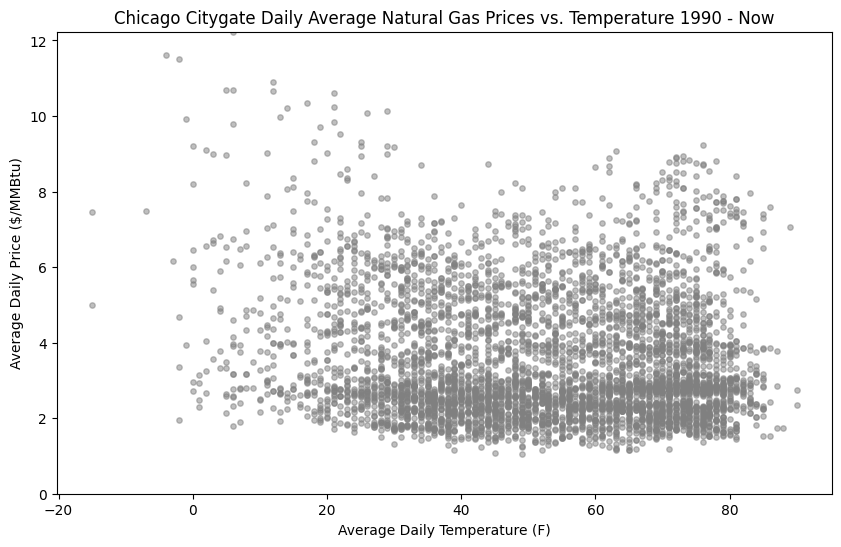

In [357]:
#simple scatterplot of average price and average temperature
plt.figure(figsize=(10, 6))
plt.scatter(temp_and_gas_all['TAVG'], temp_and_gas_all['averages'], color='gray', alpha=0.5, s=15)
plt.ylim(0, temp_and_gas_all['averages'].quantile(0.99))
plt.xlabel('Average Daily Temperature (F)')
plt.ylabel('Average Daily Price ($/MMBtu)')
plt.title('Chicago Citygate Daily Average Natural Gas Prices vs. Temperature 1990 - Now')

Text(0.5, 1.0, 'Chicago Citygate Daily Average Natural Gas Prices vs. Maximum Temperature 1990 - Now')

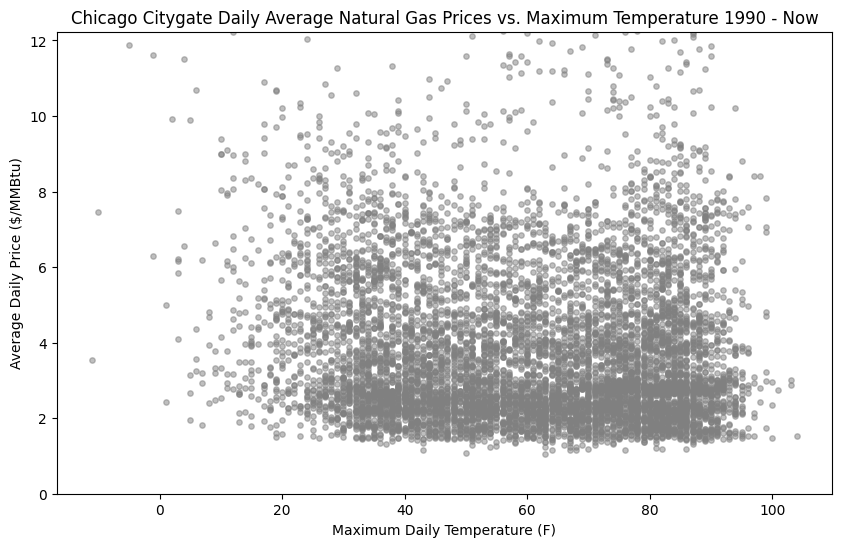

In [358]:
#simple scatterplot of average price and max temperature
plt.figure(figsize=(10, 6))
plt.scatter(temp_and_gas_all['TMAX'], temp_and_gas_all['averages'], color='gray', alpha=0.5, s=15)
plt.ylim(0, temp_and_gas_all['averages'].quantile(0.99))
plt.xlabel('Maximum Daily Temperature (F)')
plt.ylabel('Average Daily Price ($/MMBtu)')
plt.title('Chicago Citygate Daily Average Natural Gas Prices vs. Maximum Temperature 1990 - Now')

Text(0.5, 1.0, 'Chicago Citygate Daily Average Natural Gas Prices vs. Minimum Temperature 1990 - Now')

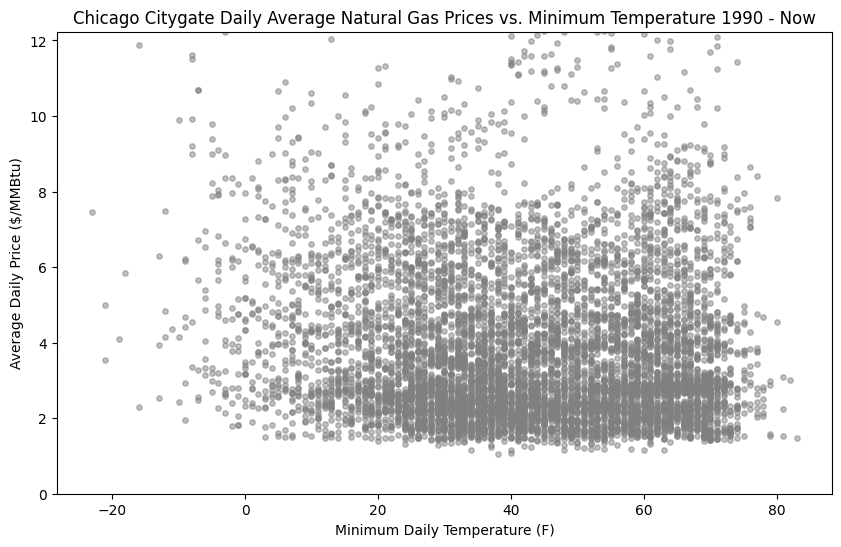

In [359]:
#simple scatterplot of average price and min temperature
plt.figure(figsize=(10, 6))
plt.scatter(temp_and_gas_all['TMIN'], temp_and_gas_all['averages'], color='gray', alpha=0.5, s=15)
plt.ylim(0, temp_and_gas_all['averages'].quantile(0.99))
plt.xlabel('Minimum Daily Temperature (F)')
plt.ylabel('Average Daily Price ($/MMBtu)')
plt.title('Chicago Citygate Daily Average Natural Gas Prices vs. Minimum Temperature 1990 - Now')

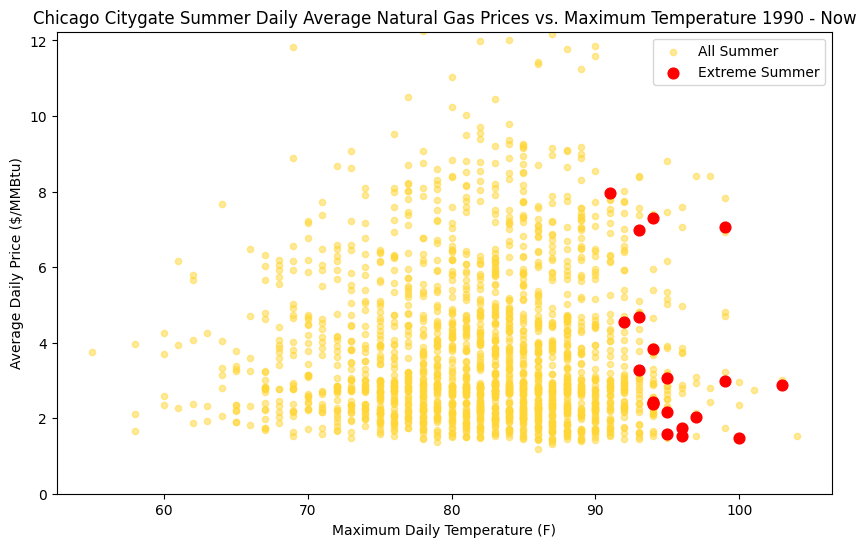

In [360]:
#scatterplot of summer max temp and average price with extreme summer days pointed out
plt.figure(figsize=(10, 6))
plt.scatter(temp_and_gas_summer['TMAX'], temp_and_gas_summer['averages'], color='#FFD635', alpha=0.5, s=20, label='All Summer')
plt.scatter(temp_and_gas_exsummer['TMAX'], temp_and_gas_exsummer['averages'], color='red', s=60, label='Extreme Summer')
plt.ylim(0, temp_and_gas_all['averages'].quantile(0.99))
plt.xlabel('Maximum Daily Temperature (F)')
plt.ylabel('Average Daily Price ($/MMBtu)')
plt.title('Chicago Citygate Summer Daily Average Natural Gas Prices vs. Maximum Temperature 1990 - Now')
plt.legend()
plt.show()


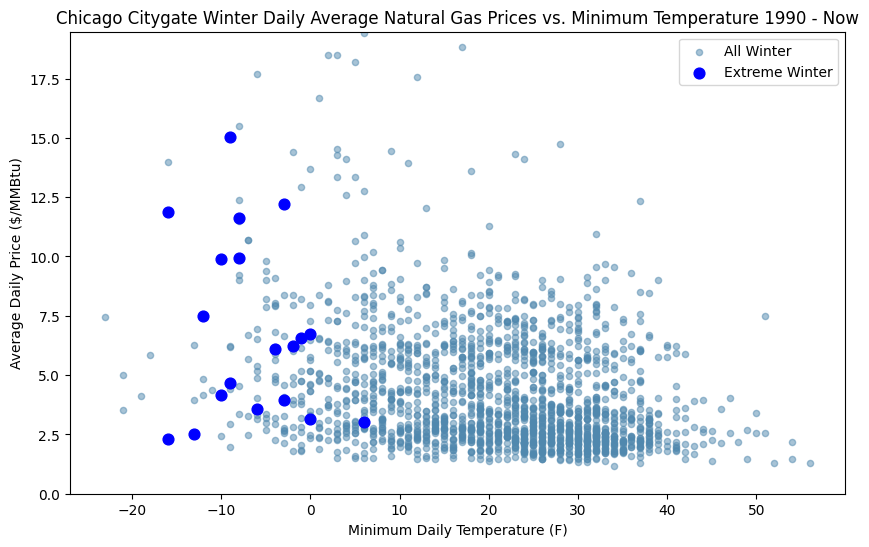

In [361]:
#scatterplot of winter min temp and average price with extreme days pointed out
plt.figure(figsize=(10, 6))
plt.scatter(temp_and_gas_winter['TMIN'], temp_and_gas_winter['averages'], color='#5088AE', alpha=0.5, s=20, label='All Winter')
plt.scatter(temp_and_gas_exwinter['TMIN'], temp_and_gas_exwinter['averages'], color='blue', s=60, label='Extreme Winter')
plt.ylim(0, temp_and_gas_all['averages'].quantile(0.999))
plt.xlabel('Minimum Daily Temperature (F)')
plt.ylabel('Average Daily Price ($/MMBtu)')
plt.title('Chicago Citygate Winter Daily Average Natural Gas Prices vs. Minimum Temperature 1990 - Now')
plt.legend()
plt.show()


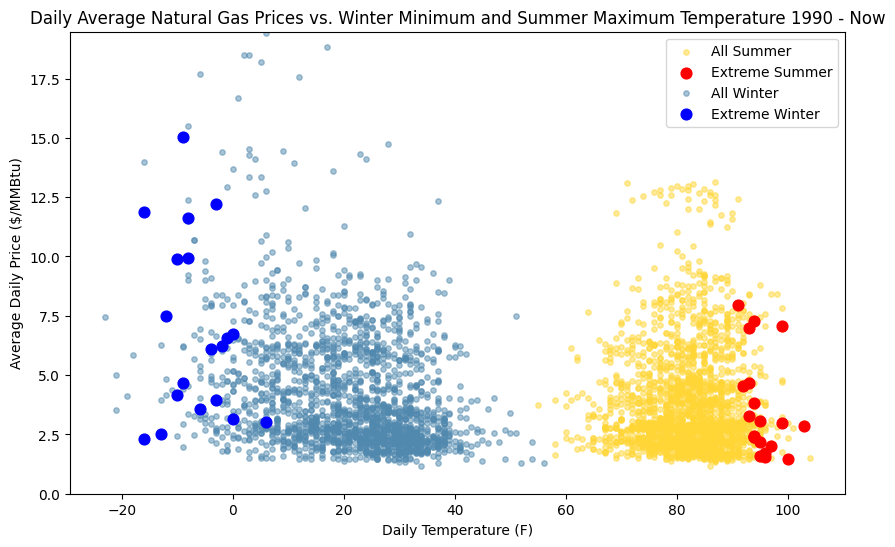

In [362]:
#combine the two histograms into one
#scatterplot of summer max temp and average price with extreme summer days pointed out
plt.figure(figsize=(10, 6))
plt.scatter(temp_and_gas_summer['TMAX'], temp_and_gas_summer['averages'], color='#FFD635', alpha=0.5, s=15, label='All Summer')
plt.scatter(temp_and_gas_exsummer['TMAX'], temp_and_gas_exsummer['averages'], color='red', s=60, label='Extreme Summer')
plt.scatter(temp_and_gas_winter['TMIN'], temp_and_gas_winter['averages'], color='#5088AE', alpha=0.5, s=15, label='All Winter')
plt.scatter(temp_and_gas_exwinter['TMIN'], temp_and_gas_exwinter['averages'], color='blue', s=60, label='Extreme Winter')
plt.ylim(0, temp_and_gas_all['averages'].quantile(0.999))
plt.xlabel('Daily Temperature (F)')
plt.ylabel('Average Daily Price ($/MMBtu)')
plt.title('Daily Average Natural Gas Prices vs. Winter Minimum and Summer Maximum Temperature 1990 - Now')
plt.legend()
plt.show()


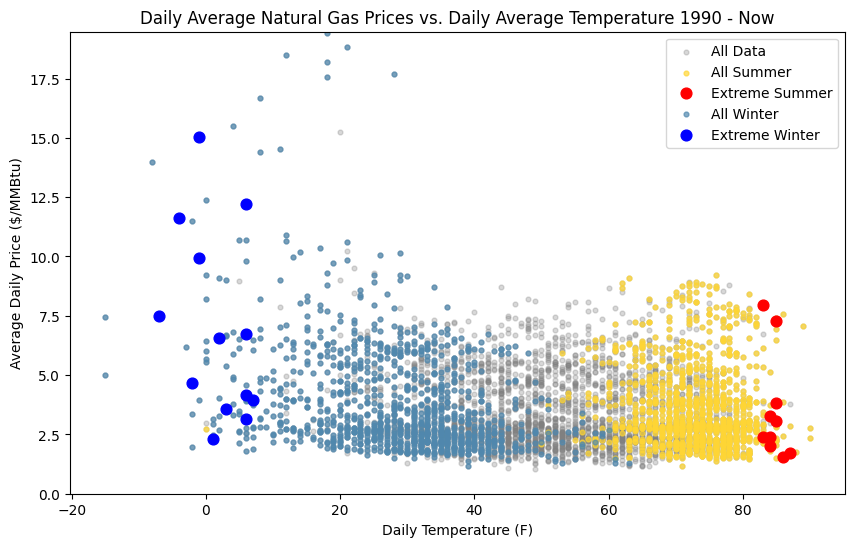

In [363]:
#new histogram with all data, not just summer and winter, using average temperatures for ALL values
#combine the two histograms into one
plt.figure(figsize=(10, 6))
plt.scatter(temp_and_gas_all['TAVG'], temp_and_gas_all['averages'], color='gray', alpha=0.3, s=12, label='All Data')
plt.scatter(temp_and_gas_summer['TAVG'], temp_and_gas_summer['averages'], color='#FFD635', alpha=0.7, s=12, label='All Summer')
plt.scatter(temp_and_gas_exsummer['TAVG'], temp_and_gas_exsummer['averages'], color='red', s=60, label='Extreme Summer')
plt.scatter(temp_and_gas_winter['TAVG'], temp_and_gas_winter['averages'], color='#5088AE', alpha=0.7, s=12, label='All Winter')
plt.scatter(temp_and_gas_exwinter['TAVG'], temp_and_gas_exwinter['averages'], color='blue', s=60, label='Extreme Winter')
plt.ylim(0, temp_and_gas_all['averages'].quantile(0.999))
plt.xlabel('Daily Temperature (F)')
plt.ylabel('Average Daily Price ($/MMBtu)')
plt.title('Daily Average Natural Gas Prices vs. Daily Average Temperature 1990 - Now')
plt.legend()
plt.show()


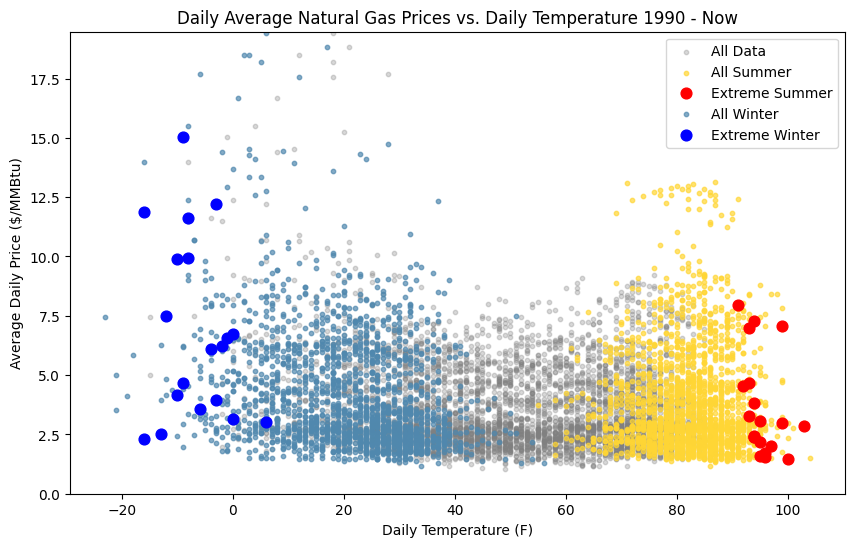

In [364]:
#new histogram with all data, not just summer and winter, using average temperatures for middle values, TMAX and TMIN for summer and winter 
plt.figure(figsize=(10, 6))
plt.scatter(temp_and_gas_all['TAVG'], temp_and_gas_all['averages'], color='gray', alpha=0.3, s=10, label='All Data')
plt.scatter(temp_and_gas_summer['TMAX'], temp_and_gas_summer['averages'], color='#FFD635', alpha=0.7, s=10, label='All Summer')
plt.scatter(temp_and_gas_exsummer['TMAX'], temp_and_gas_exsummer['averages'], color='red', s=60, label='Extreme Summer')
plt.scatter(temp_and_gas_winter['TMIN'], temp_and_gas_winter['averages'], color='#5088AE', alpha=0.7, s=10, label='All Winter')
plt.scatter(temp_and_gas_exwinter['TMIN'], temp_and_gas_exwinter['averages'], color='blue', s=60, label='Extreme Winter')
plt.ylim(0, temp_and_gas_all['averages'].quantile(0.999))
plt.xlabel('Daily Temperature (F)')
plt.ylabel('Average Daily Price ($/MMBtu)')
plt.title('Daily Average Natural Gas Prices vs. Daily Temperature 1990 - Now')
plt.legend()
plt.show()


**Modeling with Price and Temperature**

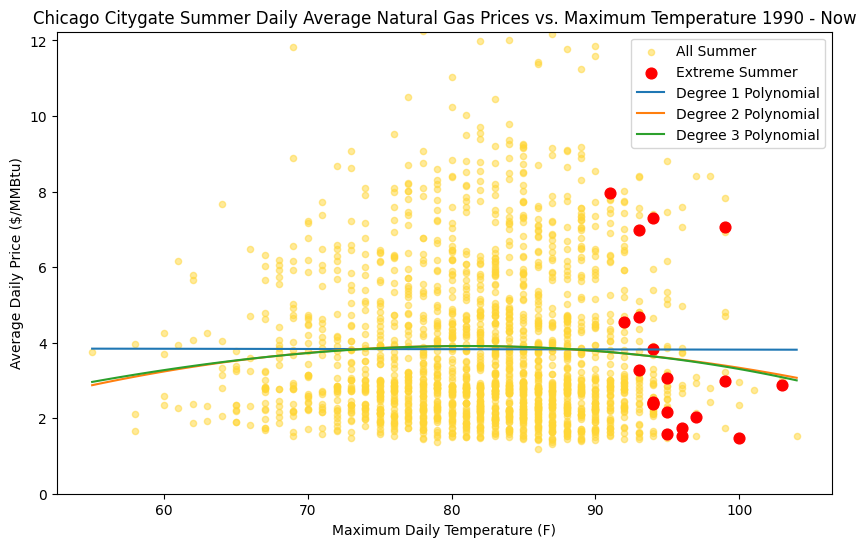

   Degree        R2      RMSE  \
0       1  0.000004  2.157049   
1       2  0.002838  2.153990   
2       3  0.002847  2.153980   

                                            Equation  
0                           [-0.0005697689442498185]  
1        [-0.0015603043739910577, 0.252090335581611]  
2  [-7.109800489445042e-06, 0.0001537361734780758...  


In [365]:
#scatterplot of summer max temp and average price with extreme summer days pointed out
plt.figure(figsize=(10, 6))
plt.scatter(temp_and_gas_summer['TMAX'], temp_and_gas_summer['averages'], color='#FFD635', alpha=0.5, s=20, label='All Summer')
plt.scatter(temp_and_gas_exsummer['TMAX'], temp_and_gas_exsummer['averages'], color='red', s=60, label='Extreme Summer')
plt.ylim(0, temp_and_gas_all['averages'].quantile(0.99))

x = temp_and_gas_summer['TMAX'].values
y = temp_and_gas_summer['averages'].values

degrees = [1, 2, 3]
results = []
x_sorted = np.linspace(x.min(), x.max(), 100)

for d in degrees:
    coeff = np.polyfit(x, y, d)
    poly_eq = np.poly1d(coeff)

    y_pred = poly_eq(x)

    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    results.append({
        'Degree': d,
        'R2': r2,
        'RMSE': rmse,
        'Equation': poly_eq
    })
    y_poly = poly_eq(x_sorted)
    plt.plot(x_sorted, y_poly, label=f'Degree {d} Polynomial')

#try a different regression

plt.xlabel('Maximum Daily Temperature (F)')
plt.ylabel('Average Daily Price ($/MMBtu)')
plt.title('Chicago Citygate Summer Daily Average Natural Gas Prices vs. Maximum Temperature 1990 - Now')
plt.legend()
plt.show()

df_results = pd.DataFrame(results)
print(df_results)


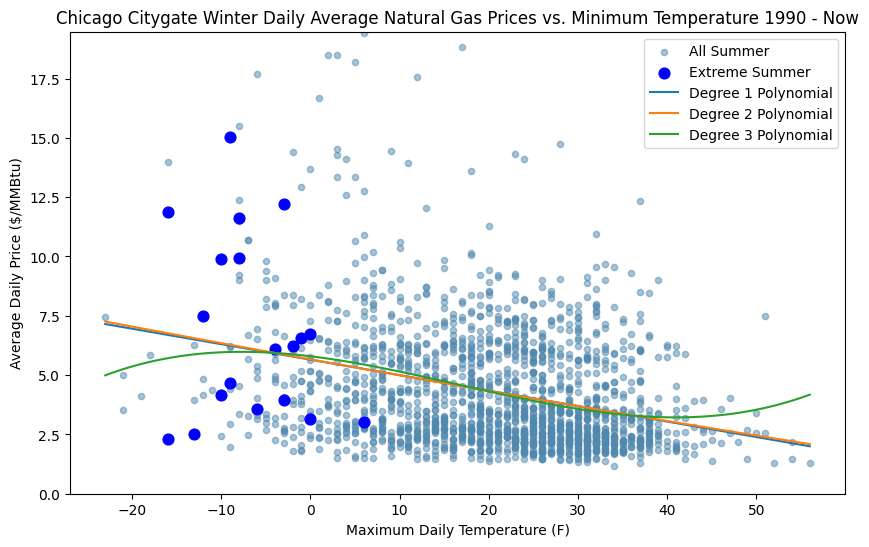

   Degree        R2      RMSE  \
0       1  0.040403  3.907935   
1       2  0.040415  3.907910   
2       3  0.042734  3.903187   

                                            Equation  
0                             [-0.06522322275420965]  
1       [7.137697601633817e-05, -0.0677373505207193]  
2  [4.797782631862404e-05, -0.0023918704320812557...  


In [366]:
#scatterplot of winter min temp and average price with extreme winter days pointed out
plt.figure(figsize=(10, 6))
plt.scatter(temp_and_gas_winter['TMIN'], temp_and_gas_winter['averages'], color='#5088AE', alpha=0.5, s=20, label='All Summer')
plt.scatter(temp_and_gas_exwinter['TMIN'], temp_and_gas_exwinter['averages'], color='blue', s=60, label='Extreme Summer')
plt.ylim(0, temp_and_gas_all['averages'].quantile(0.999))

x = temp_and_gas_winter['TMIN'].values
x=x[:-2]
y = temp_and_gas_winter['averages'].values
y = pd.Series(y).dropna()

degrees = [1, 2, 3]
results = []
x_sorted = np.linspace(x.min(), x.max(), 100)

for d in degrees:
    coeff = np.polyfit(x, y, d)
    poly_eq = np.poly1d(coeff)

    y_pred = poly_eq(x)

    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    results.append({
        'Degree': d,
        'R2': r2,
        'RMSE': rmse,
        'Equation': poly_eq
    })
    y_poly = poly_eq(x_sorted)
    plt.plot(x_sorted, y_poly, label=f'Degree {d} Polynomial')

#try a different regression

plt.xlabel('Maximum Daily Temperature (F)')
plt.ylabel('Average Daily Price ($/MMBtu)')
plt.title('Chicago Citygate Winter Daily Average Natural Gas Prices vs. Minimum Temperature 1990 - Now')
plt.legend()
plt.show()

df_results = pd.DataFrame(results)
print(df_results)


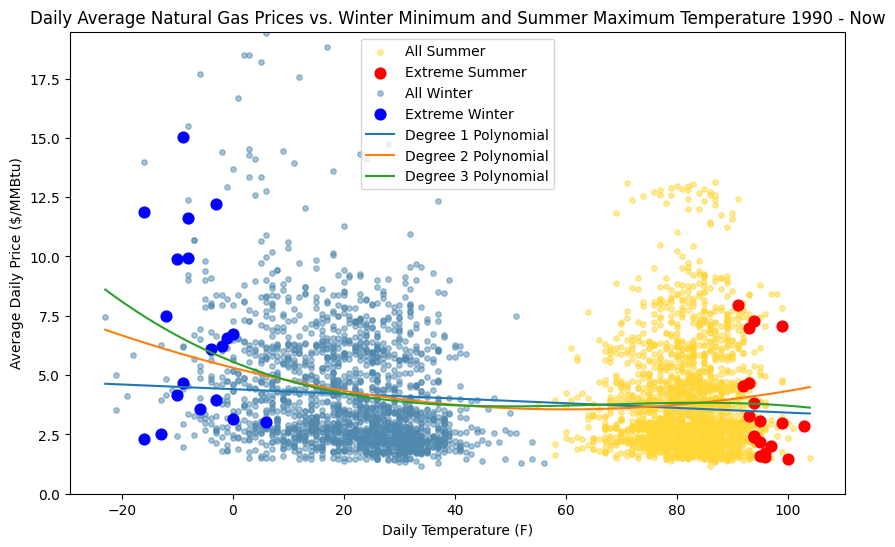

   Degree        R2      RMSE  \
0       1  0.008271  2.711810   
1       2  0.022226  2.692663   
2       3  0.024633  2.689346   

                                            Equation  
0                             [-0.00986895334160623]  
1    [0.00048647213753433933, -0.058457258445079076]  
2  [-7.437766635270011e-06, 0.0014971700004014297...  


In [367]:
#combine the two histograms into one
#scatterplot of summer max temp and average price with extreme summer days pointed out
plt.figure(figsize=(10, 6))
plt.scatter(temp_and_gas_summer['TMAX'], temp_and_gas_summer['averages'], color='#FFD635', alpha=0.5, s=15, label='All Summer')
plt.scatter(temp_and_gas_exsummer['TMAX'], temp_and_gas_exsummer['averages'], color='red', s=60, label='Extreme Summer')
plt.scatter(temp_and_gas_winter['TMIN'], temp_and_gas_winter['averages'], color='#5088AE', alpha=0.5, s=15, label='All Winter')
plt.scatter(temp_and_gas_exwinter['TMIN'], temp_and_gas_exwinter['averages'], color='blue', s=60, label='Extreme Winter')
plt.ylim(0, temp_and_gas_all['averages'].quantile(0.999))




x = extreme_table['Temperature'].values
x = pd.Series(x).dropna()
x=x[:-4]
y = extreme_table['Average Price'].values
y = pd.Series(y).dropna()

degrees = [1, 2, 3]
results = []
x_sorted = np.linspace(x.min(), x.max(), 100)


for d in degrees:
    coeff = np.polyfit(x, y, d)
    poly_eq = np.poly1d(coeff)

    y_pred = poly_eq(x)

    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    results.append({
        'Degree': d,
        'R2': r2,
        'RMSE': rmse,
        'Equation': poly_eq
    })
    y_poly = poly_eq(x_sorted)
    plt.plot(x_sorted, y_poly, label=f'Degree {d} Polynomial')




plt.xlabel('Daily Temperature (F)')
plt.ylabel('Average Daily Price ($/MMBtu)')
plt.title('Daily Average Natural Gas Prices vs. Winter Minimum and Summer Maximum Temperature 1990 - Now')
plt.legend()
plt.show()

df_results = pd.DataFrame(results)
print(df_results)


**Extreme Events - Winter**

In [368]:
# Ensure DATE is a datetime index
temp_and_gas_all['DATE'] = pd.to_datetime(temp_and_gas_all['DATE'])
temp_and_gas_all.set_index('DATE', inplace=True)

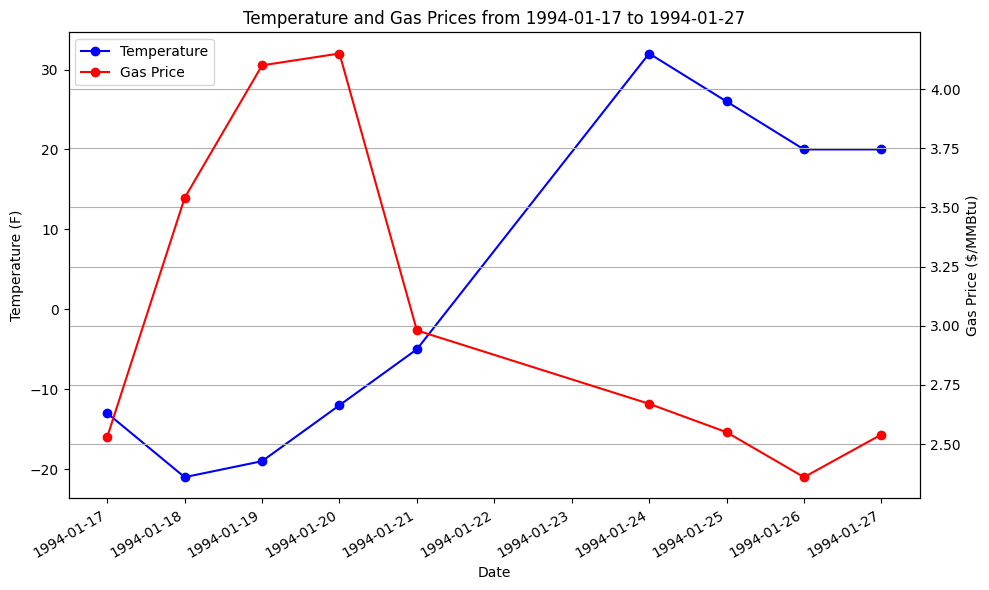

In [369]:
# Filter data
filtered_data = temp_and_gas_all.loc['1994-01-15':'1994-01-27']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


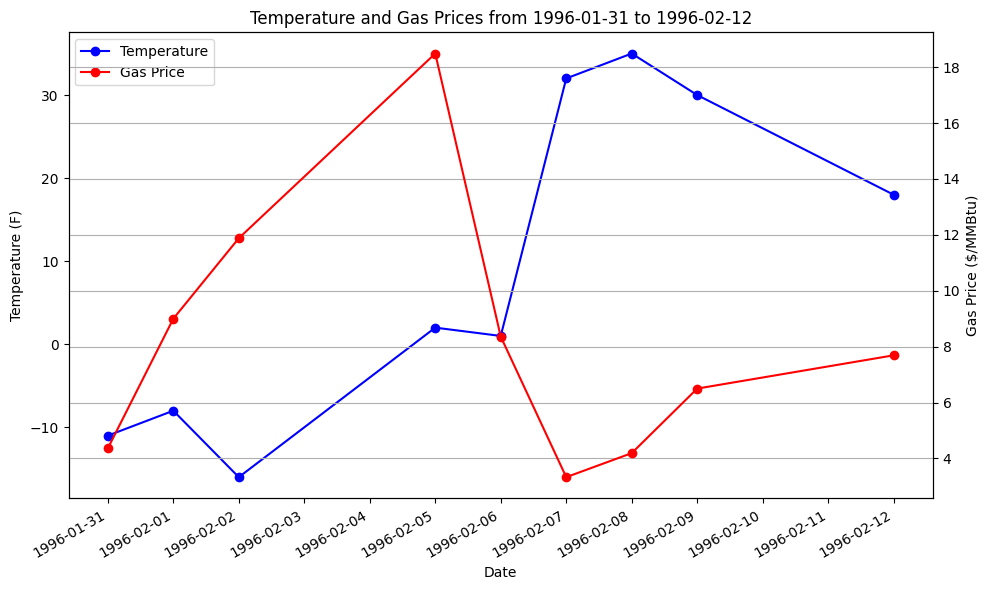

In [370]:
# Filter data
filtered_data = temp_and_gas_all.loc['1996-01-31':'1996-02-12']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


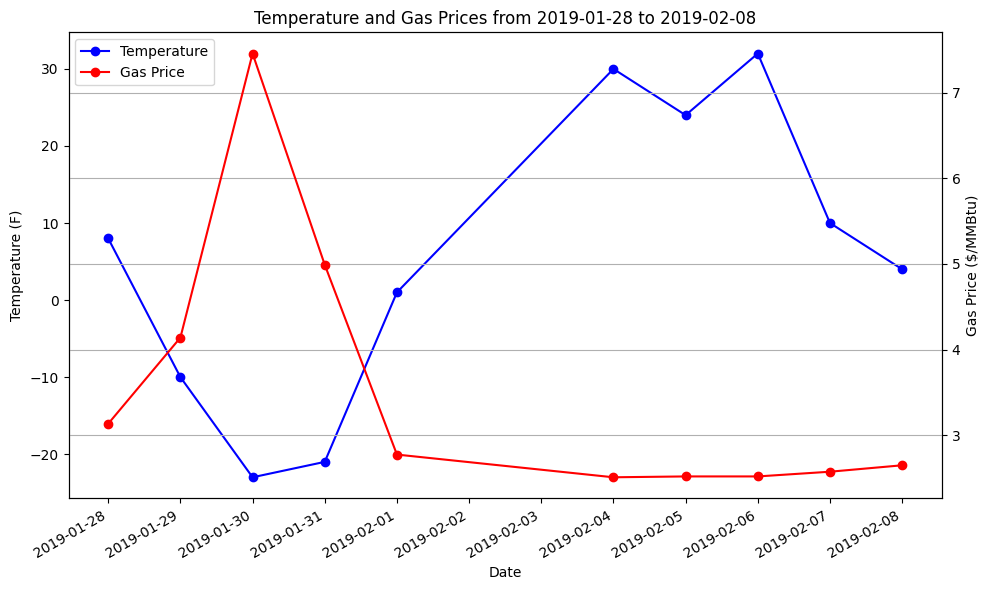

In [371]:
# Filter data
filtered_data = temp_and_gas_all.loc['2019-01-27':'2019-02-08']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


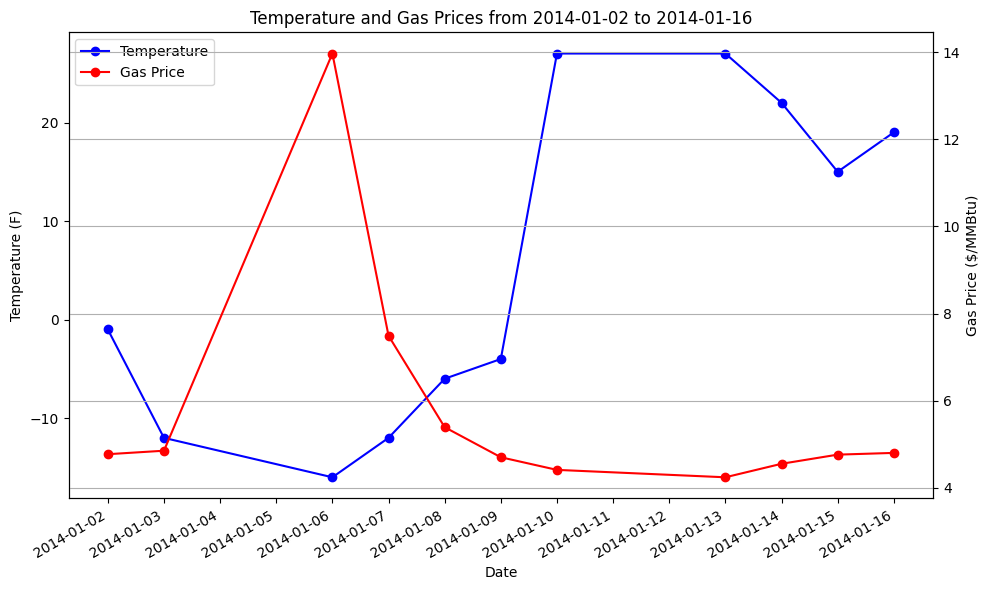

In [372]:
# Filter data
filtered_data = temp_and_gas_all.loc['2014-01-02':'2014-01-16']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


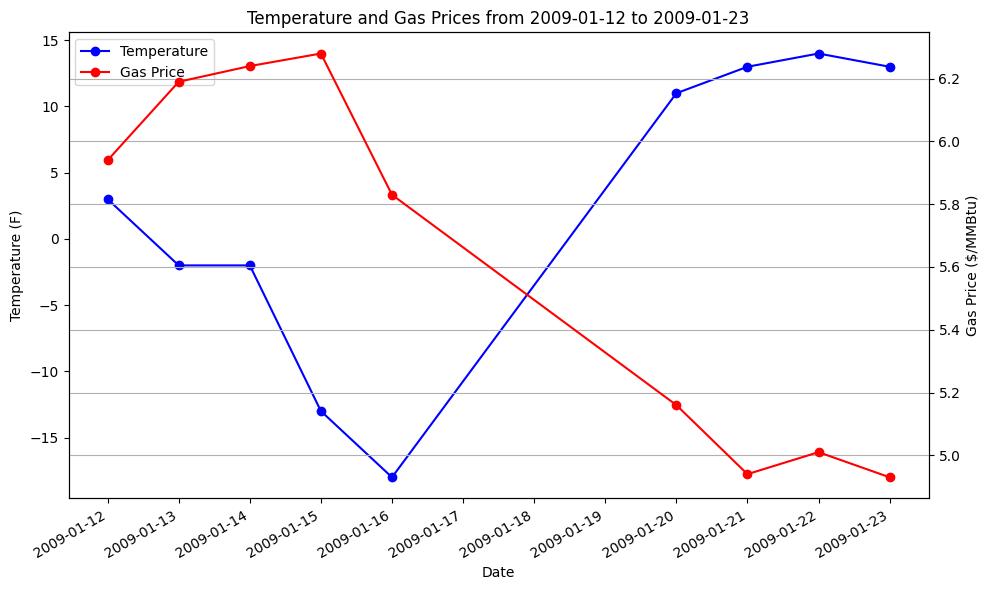

In [373]:
# Filter data
filtered_data = temp_and_gas_all.loc['2009-01-12':'2009-01-24']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


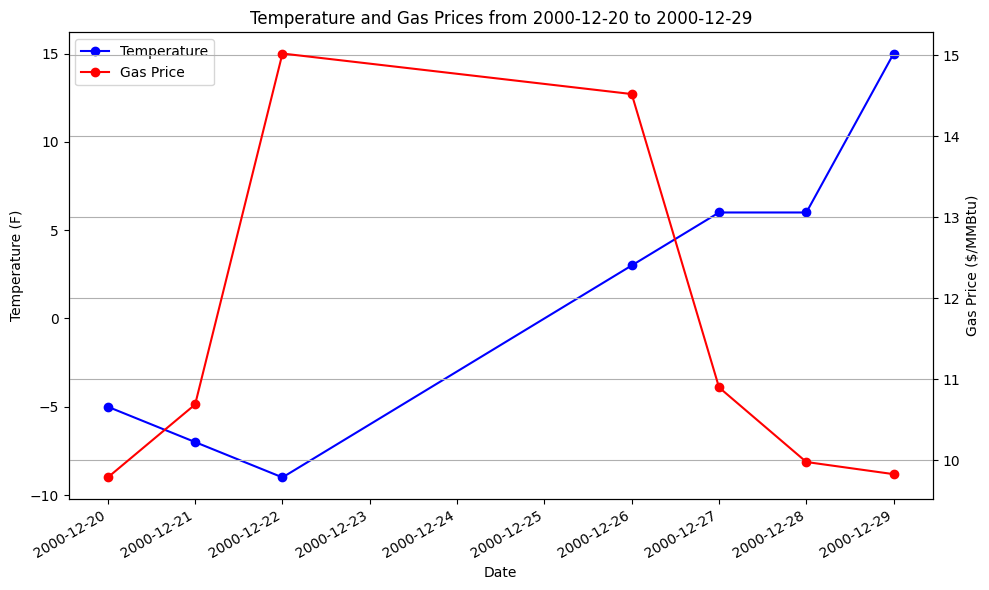

In [374]:
# Filter data
filtered_data = temp_and_gas_all.loc['2000-12-20':'2001-01-01']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


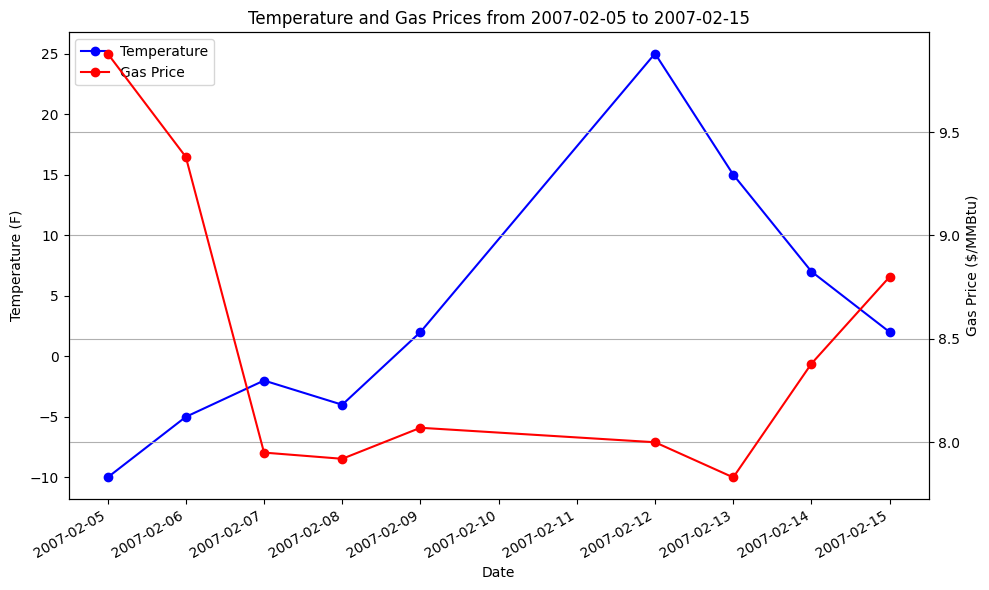

In [375]:
# Filter data
filtered_data = temp_and_gas_all.loc['2007-02-03':'2007-02-15']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


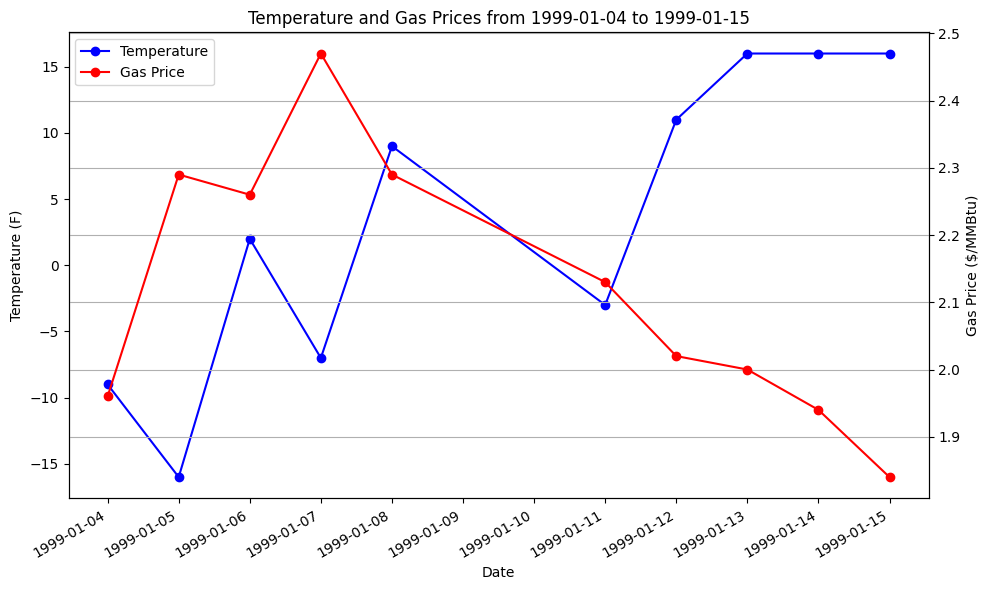

In [376]:
# Filter data
filtered_data = temp_and_gas_all.loc['1999-01-03':'1999-01-15']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


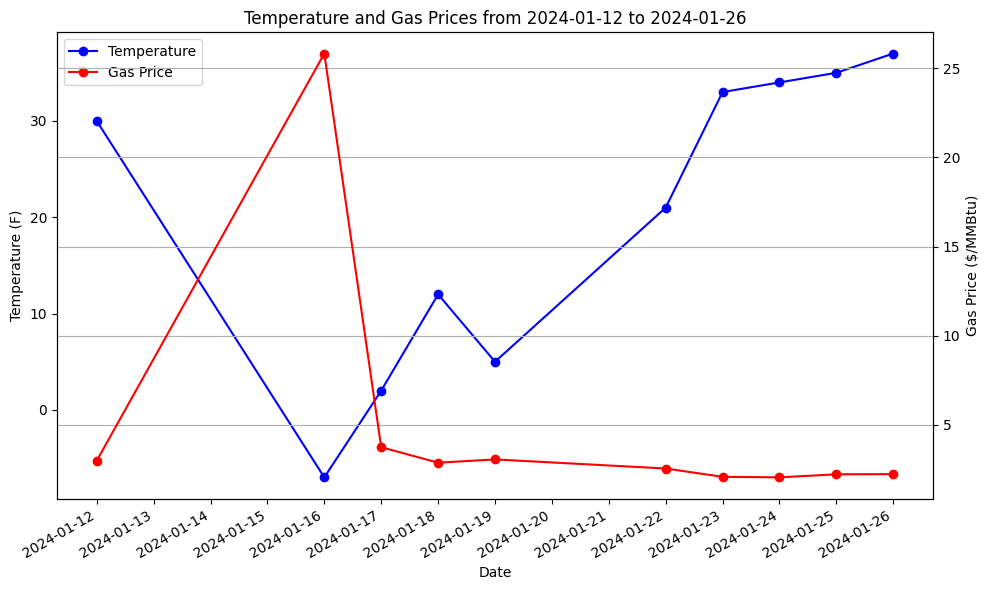

In [377]:
# Filter data
filtered_data = temp_and_gas_all.loc['2024-01-12':'2024-01-26']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


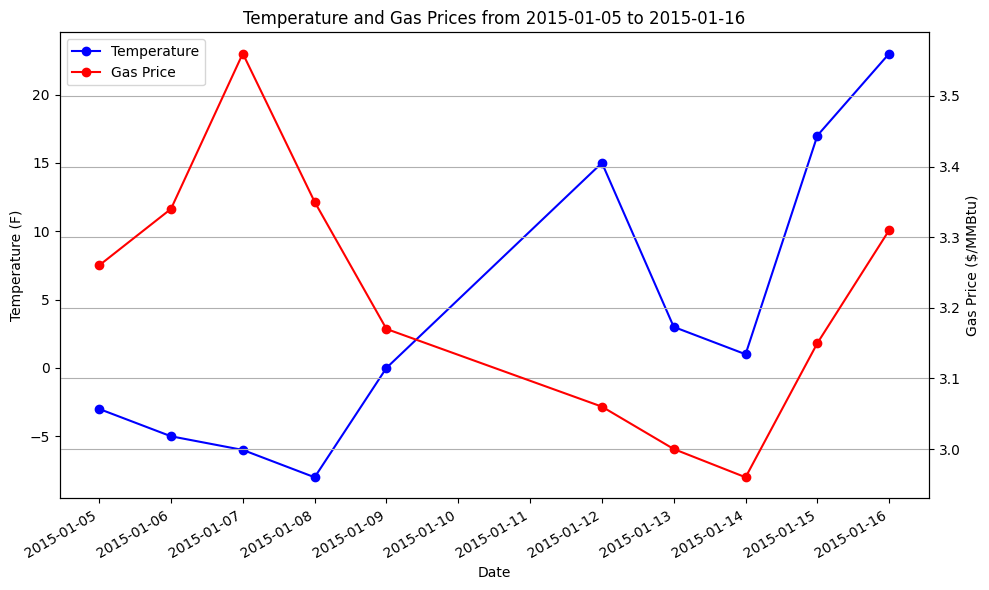

In [378]:
# Filter data
filtered_data = temp_and_gas_all.loc['2015-01-05':'2015-01-17']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


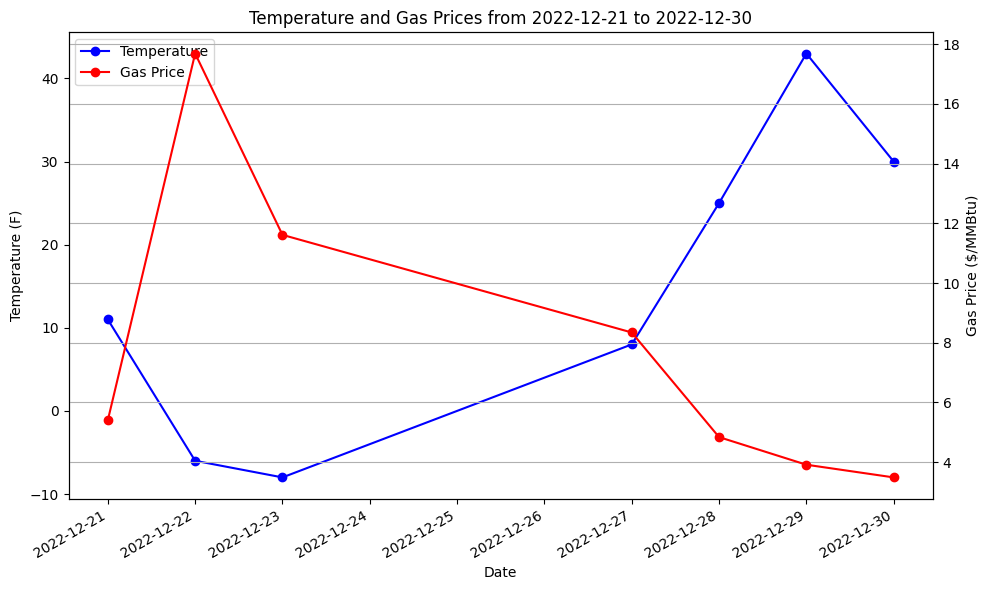

In [379]:
# Filter data
filtered_data = temp_and_gas_all.loc['2022-12-21':'2023-01-02']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


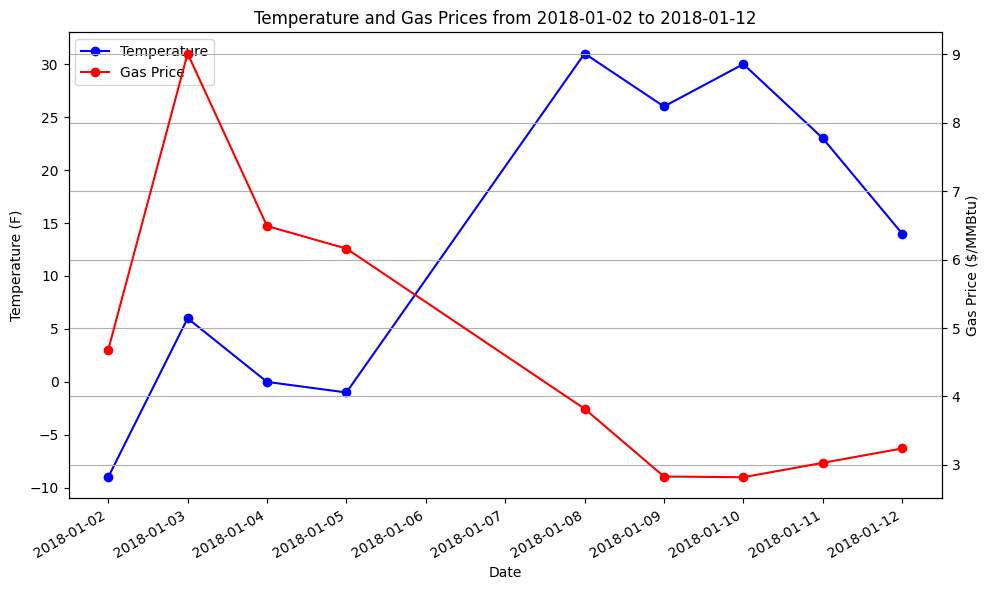

In [380]:
# Filter data
filtered_data = temp_and_gas_all.loc['2017-12-31':'2018-01-12']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


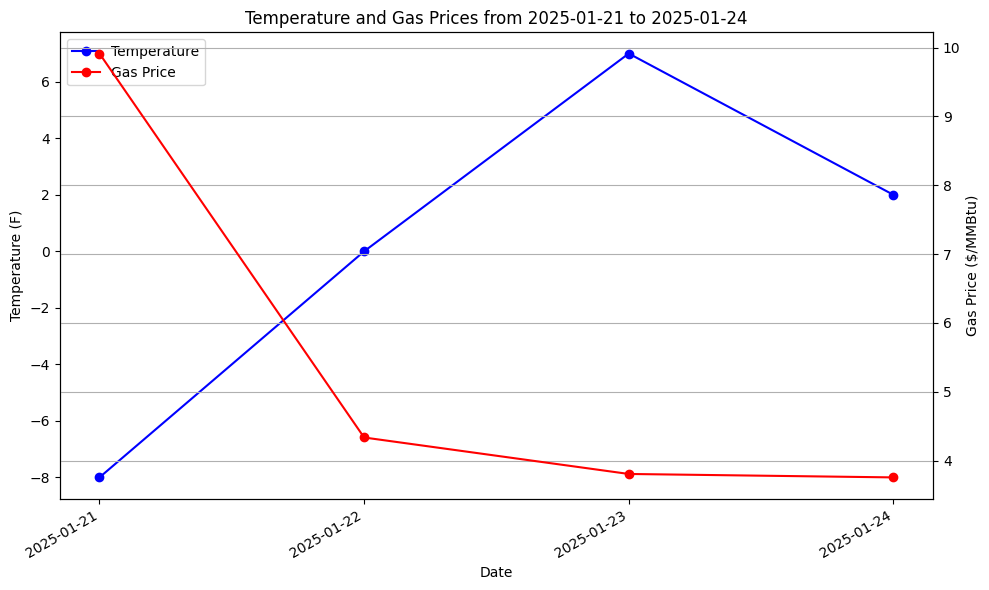

In [381]:
# Filter data
filtered_data = temp_and_gas_all.loc['2025-01-19':'2025-01-31']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


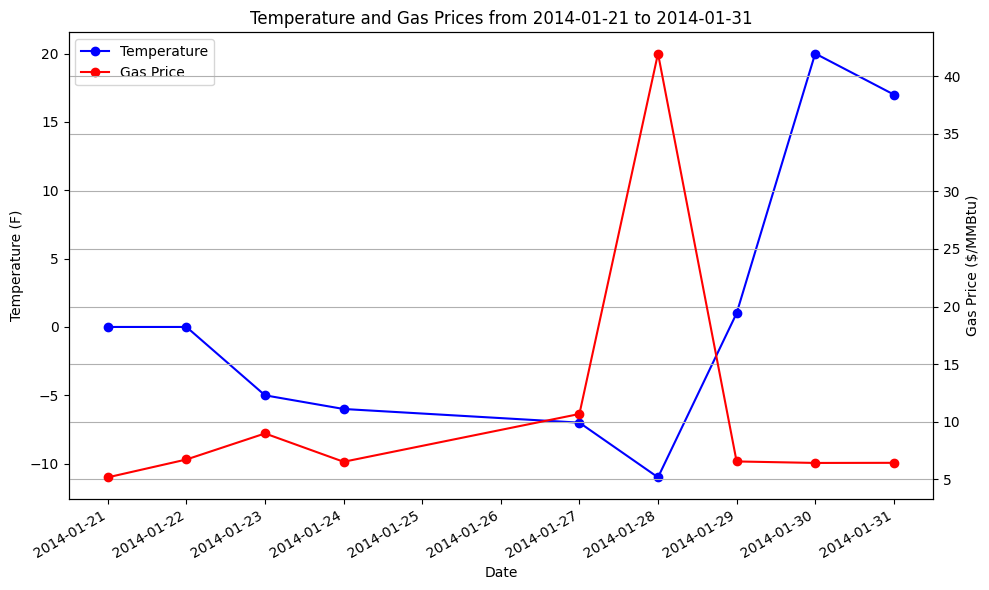

In [382]:
# Filter data
filtered_data = temp_and_gas_all.loc['2014-01-20':'2014-02-01']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


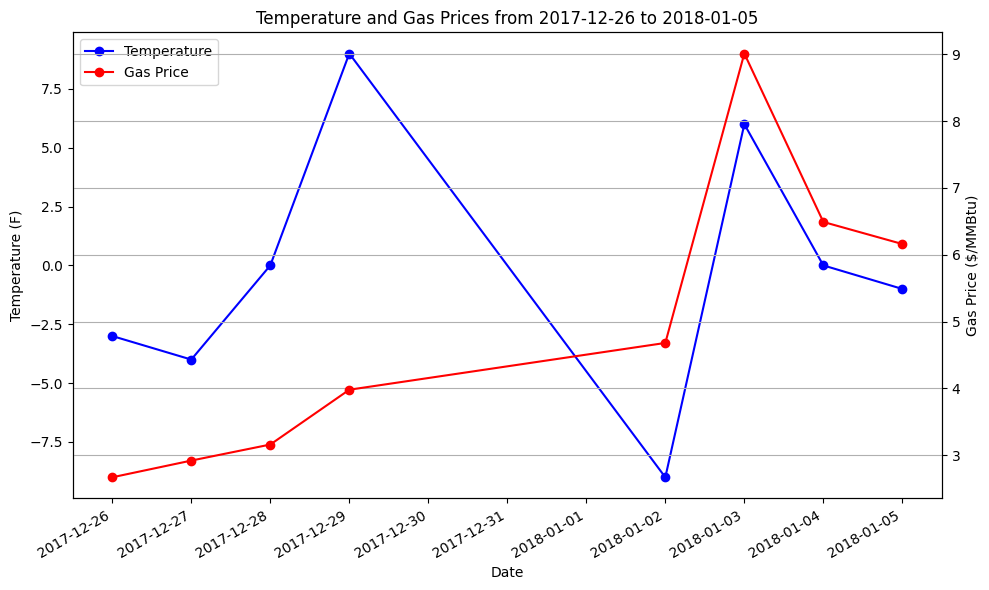

In [383]:
# Filter data
filtered_data = temp_and_gas_all.loc['2017-12-26':'2018-01-07']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


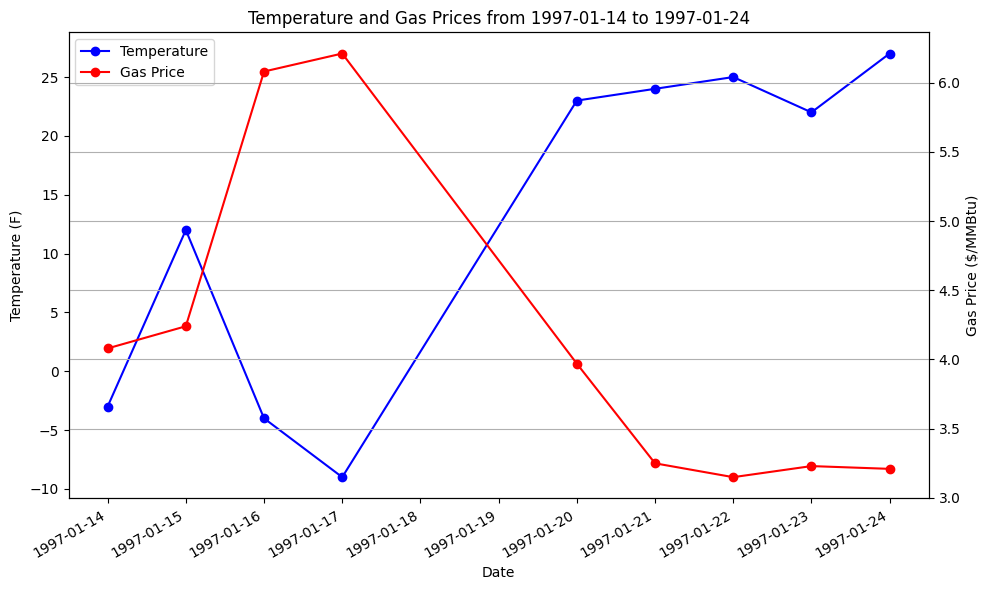

In [384]:
# Filter data
filtered_data = temp_and_gas_all.loc['1997-01-14':'1997-01-26']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


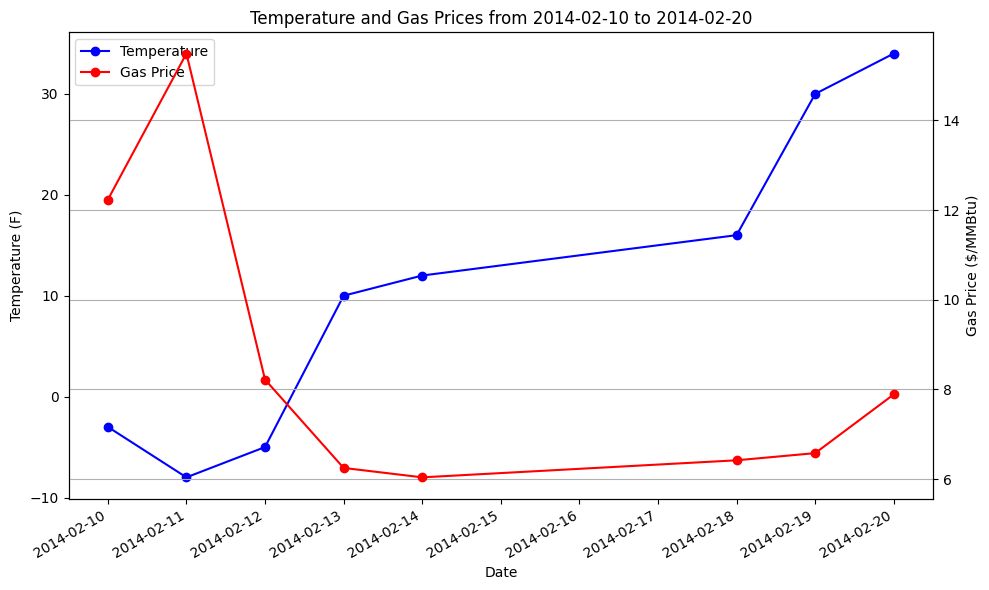

In [385]:
# Filter data
filtered_data = temp_and_gas_all.loc['2014-02-08':'2014-02-20']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


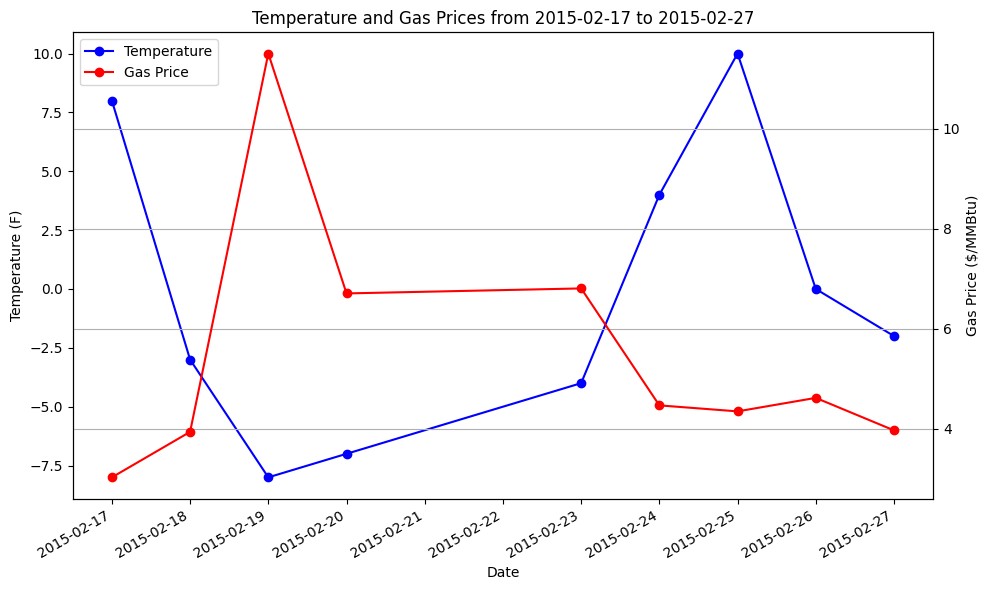

In [386]:
# Filter data
filtered_data = temp_and_gas_all.loc['2015-02-16':'2015-02-28']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


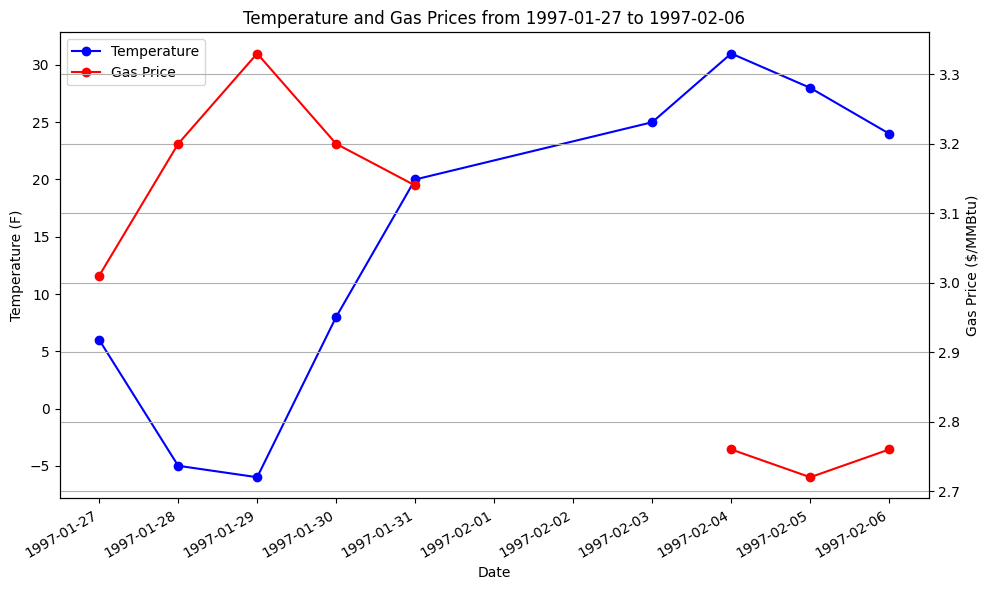

In [387]:
# Filter data
filtered_data = temp_and_gas_all.loc['1997-01-25':'1997-02-06']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


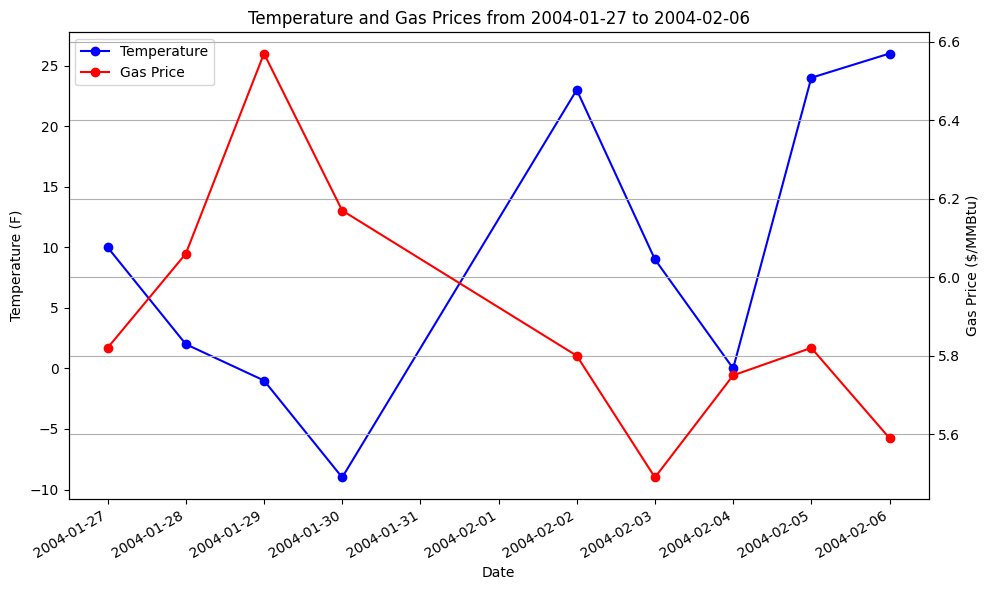

In [388]:
# Filter data
filtered_data = temp_and_gas_all.loc['2004-01-27':'2004-02-08']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


**Summer Price and Temperature Graphs**

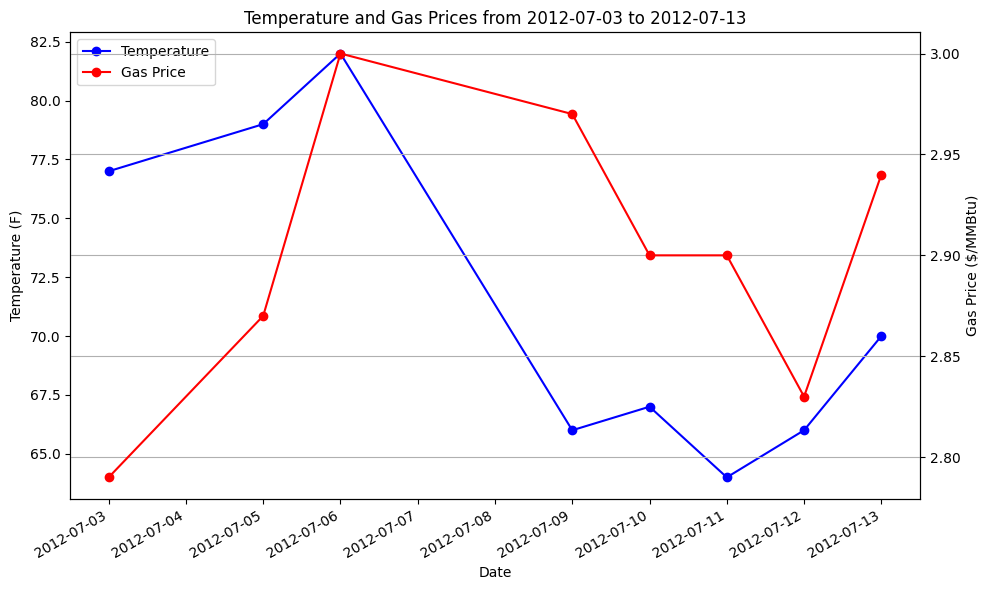

In [389]:
# Filter data
filtered_data = temp_and_gas_all.loc['2012-07-03':'2012-07-15']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


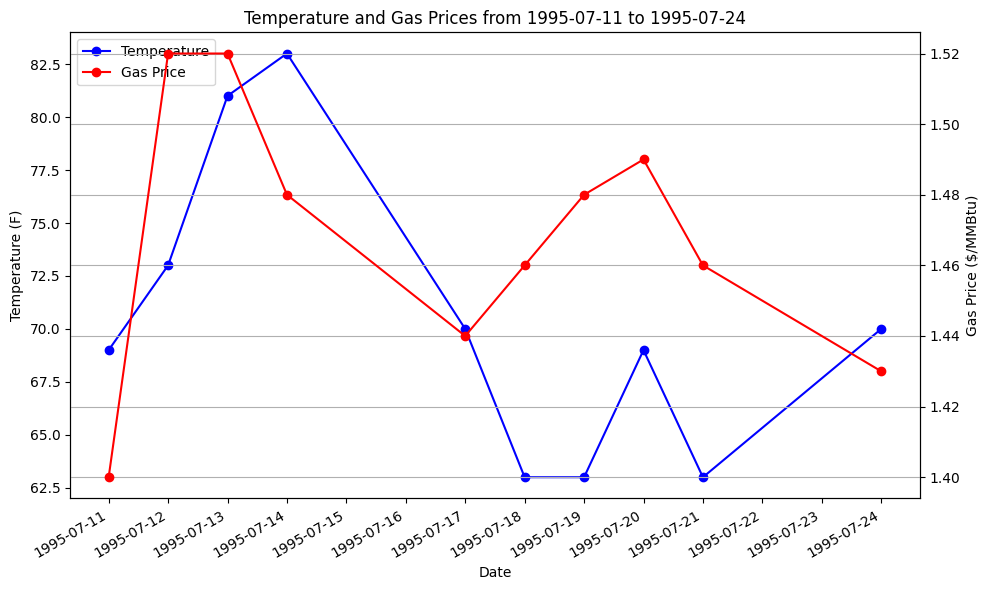

In [390]:
# Filter data
filtered_data = temp_and_gas_all.loc['1995-07-11':'1995-07-24']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


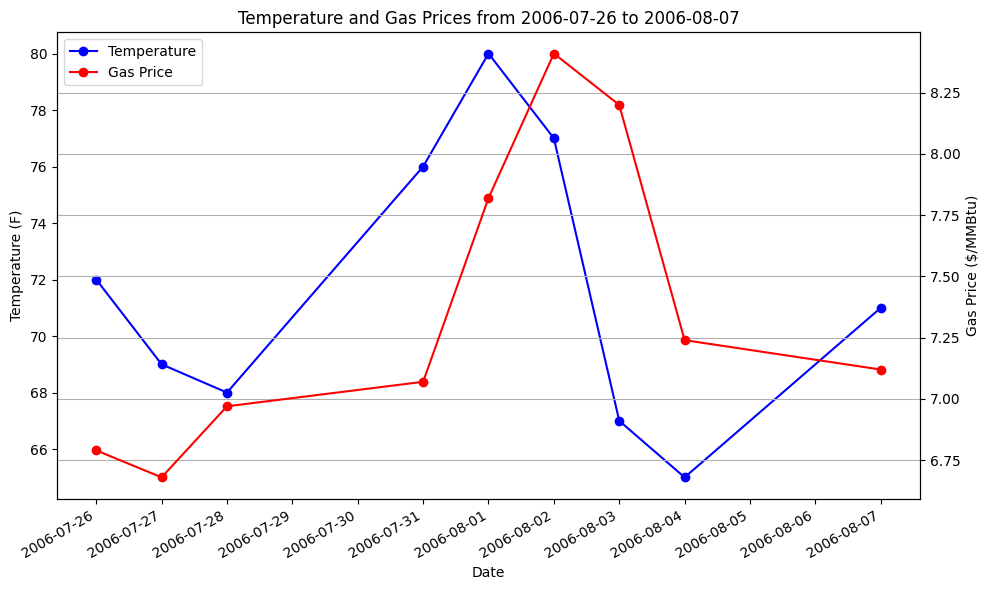

In [391]:
# Filter data
filtered_data = temp_and_gas_all.loc['2006-07-26':'2006-08-07']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


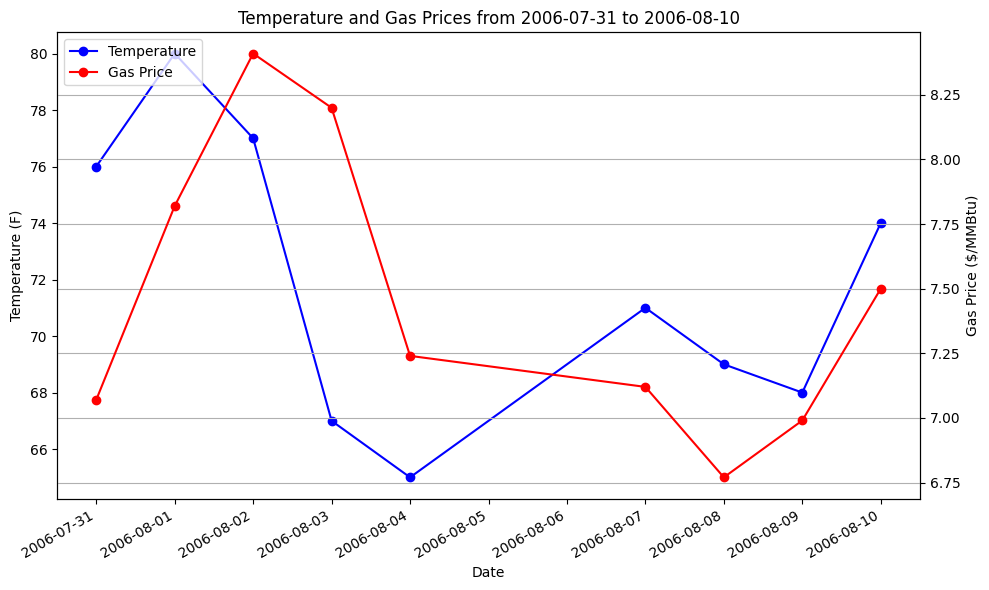

In [392]:
# Filter data
filtered_data = temp_and_gas_all.loc['2006-07-29':'2006-08-10']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


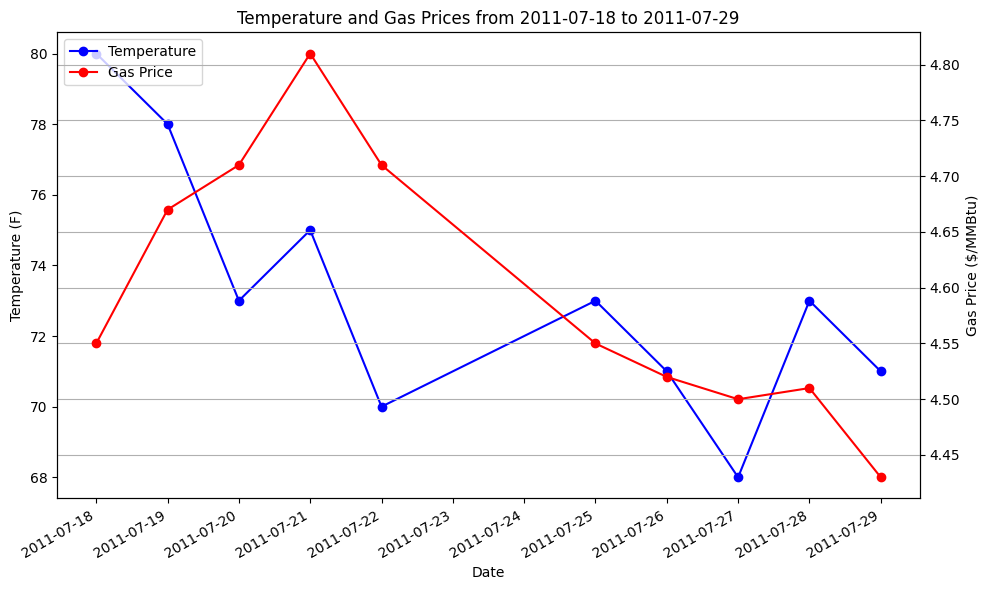

In [393]:
# Filter data
filtered_data = temp_and_gas_all.loc['2011-07-17':'2011-07-29']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


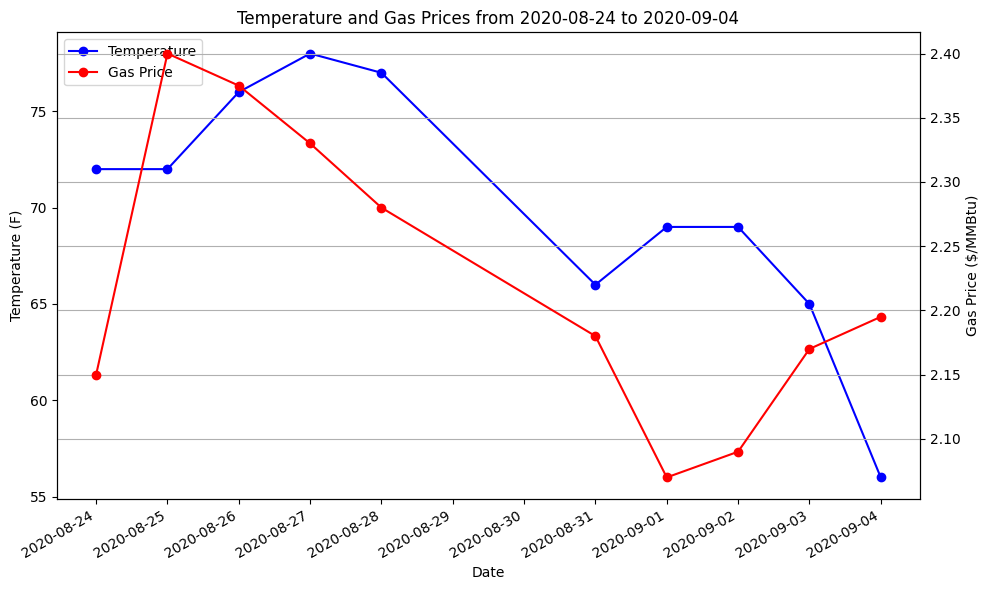

In [394]:
# Filter data
filtered_data = temp_and_gas_all.loc['2020-08-24':'2020-09-05']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


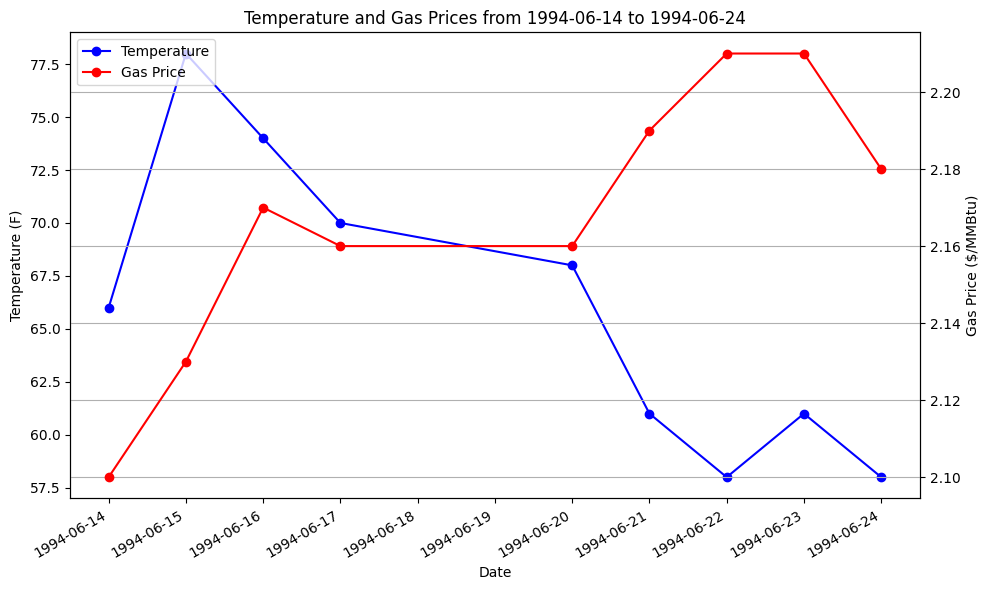

In [395]:
# Filter data
filtered_data = temp_and_gas_all.loc['1994-06-14':'1994-06-26']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


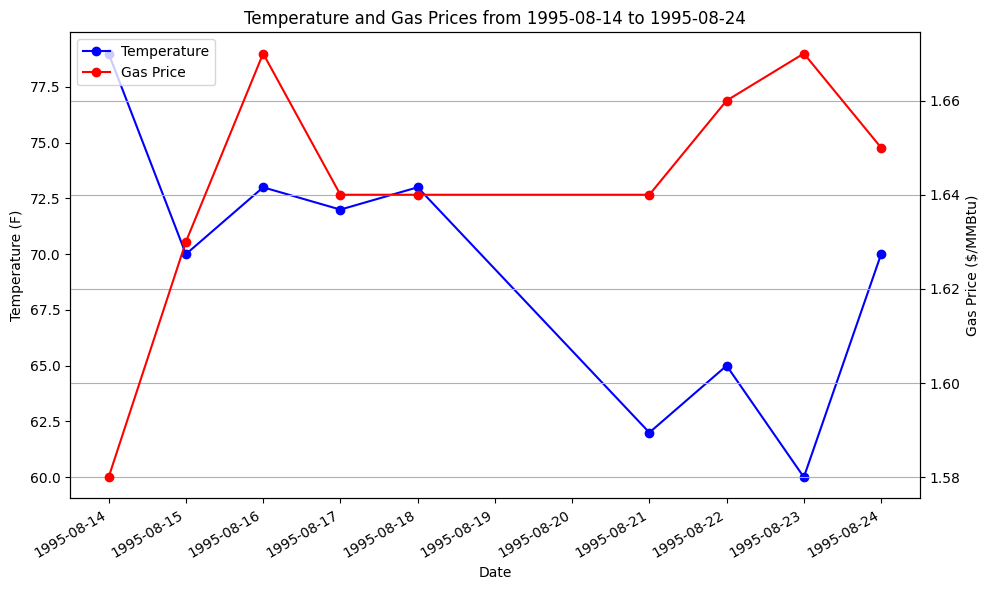

In [396]:
# Filter data
filtered_data = temp_and_gas_all.loc['1995-08-12':'1995-08-24']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


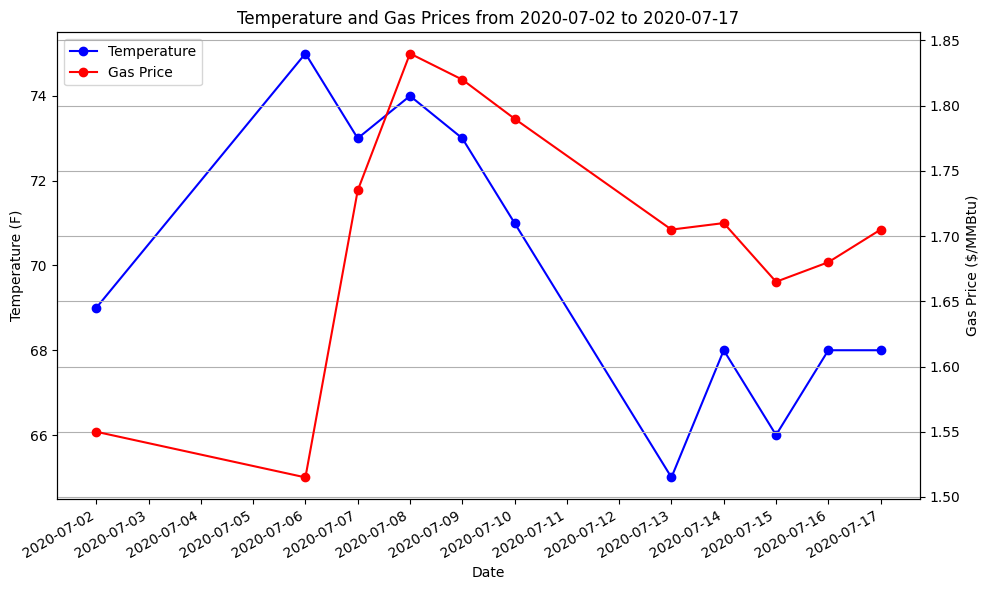

In [397]:
# Filter data
filtered_data = temp_and_gas_all.loc['2020-07-02':'2020-07-17']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


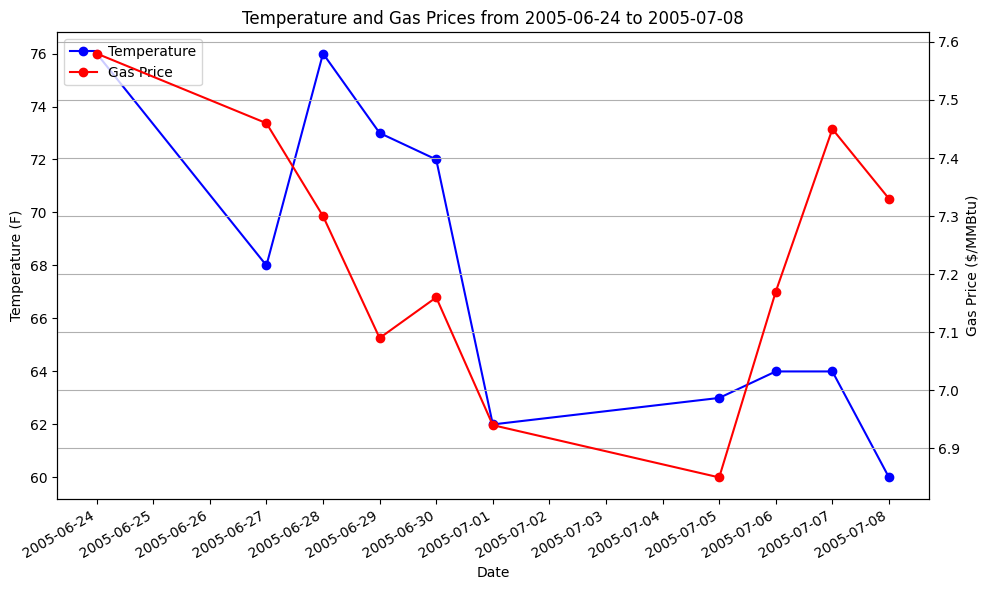

In [398]:
# Filter data
filtered_data = temp_and_gas_all.loc['2005-06-24':'2005-07-08']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


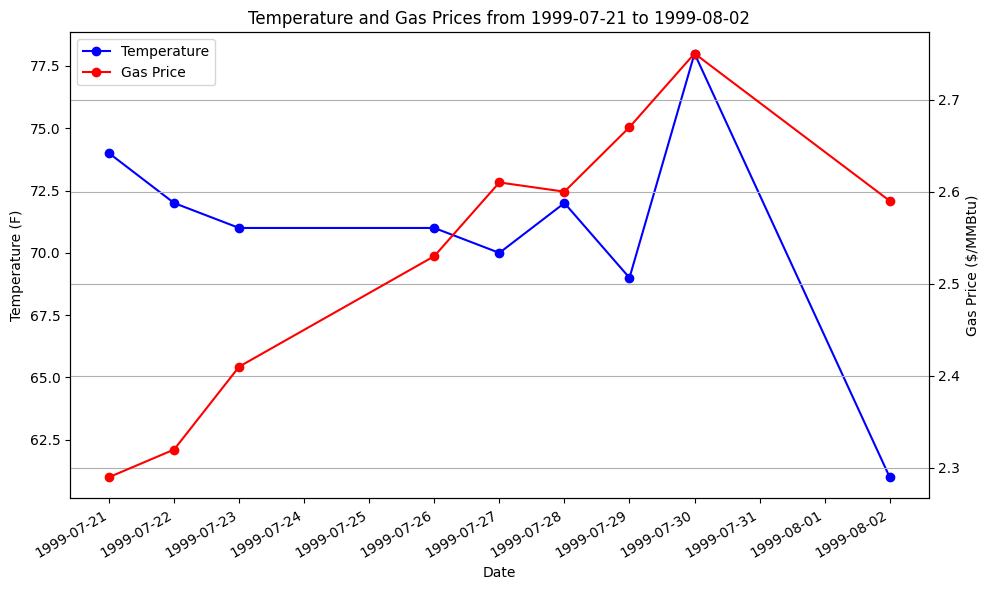

In [399]:
# Filter data
filtered_data = temp_and_gas_all.loc['1999-07-21':'1999-08-02']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


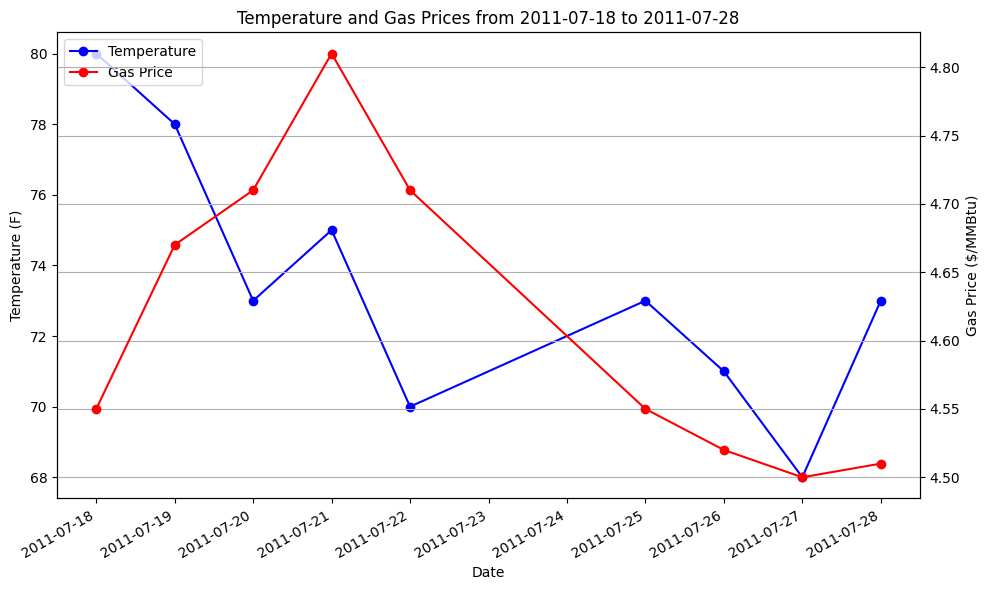

In [400]:
# Filter data
filtered_data = temp_and_gas_all.loc['2011-07-16':'2011-07-28']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


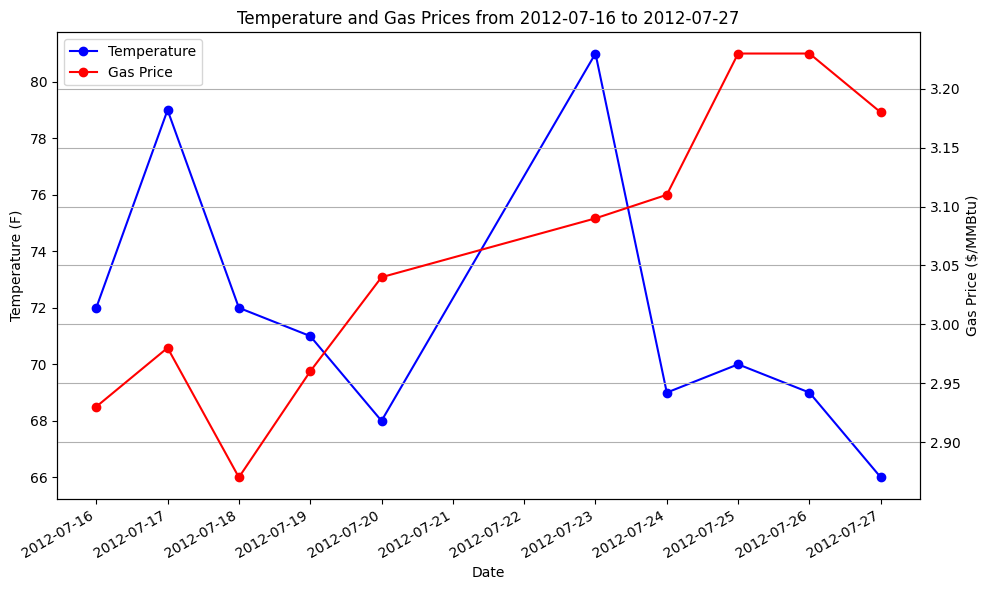

In [401]:
# Filter data
filtered_data = temp_and_gas_all.loc['2012-07-15':'2012-07-27']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


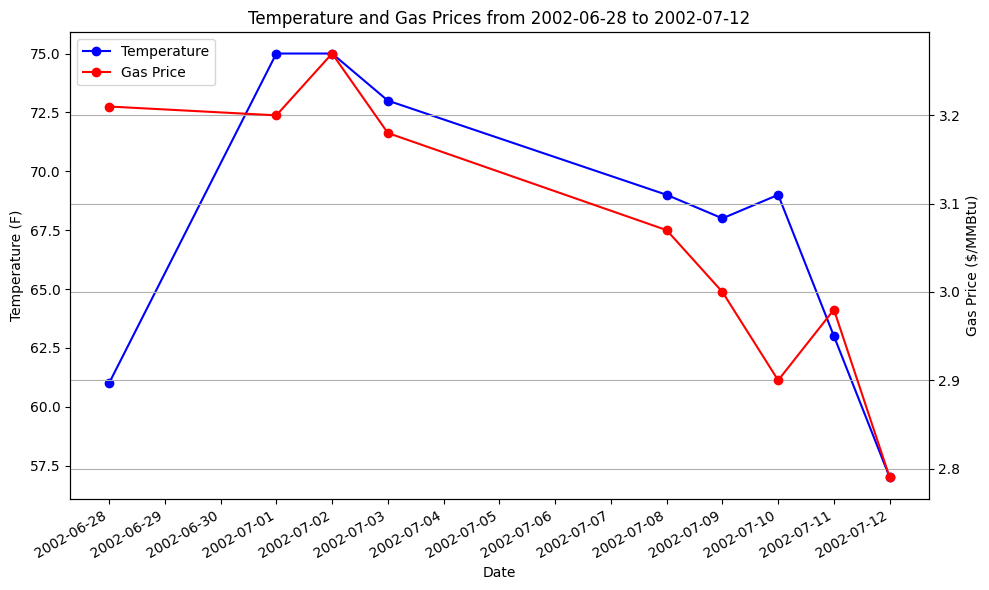

In [402]:
# Filter data
filtered_data = temp_and_gas_all.loc['2002-06-28':'2002-07-12']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


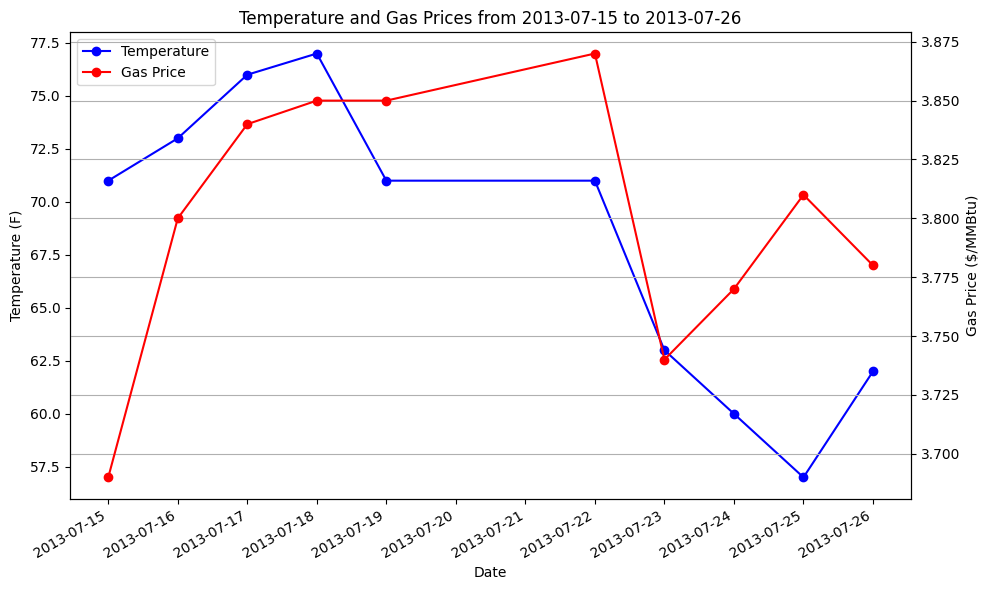

In [403]:
# Filter data
filtered_data = temp_and_gas_all.loc['2013-07-15':'2013-07-27']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


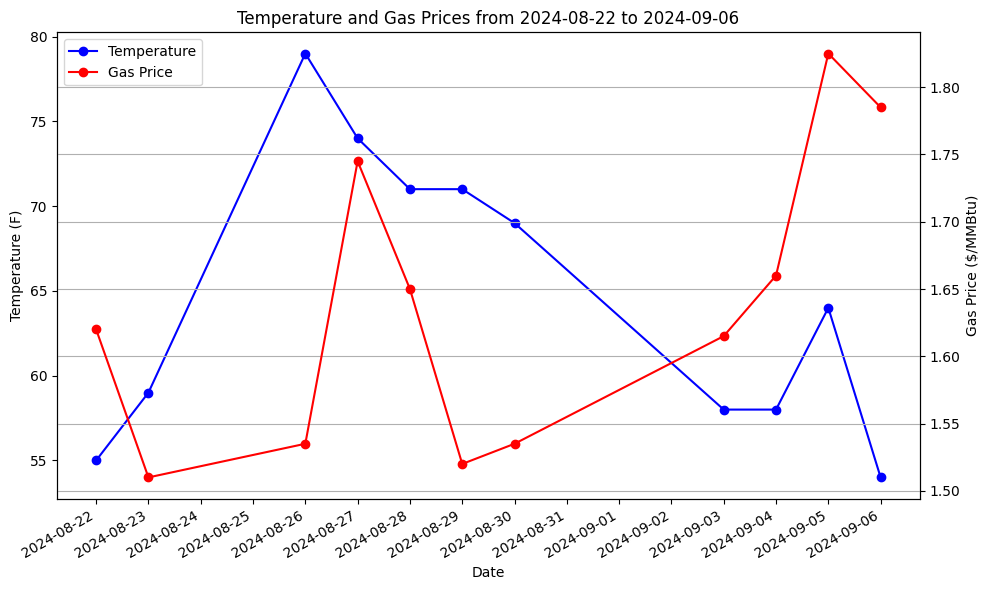

In [404]:
# Filter data
filtered_data = temp_and_gas_all.loc['2024-08-22':'2024-09-07']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


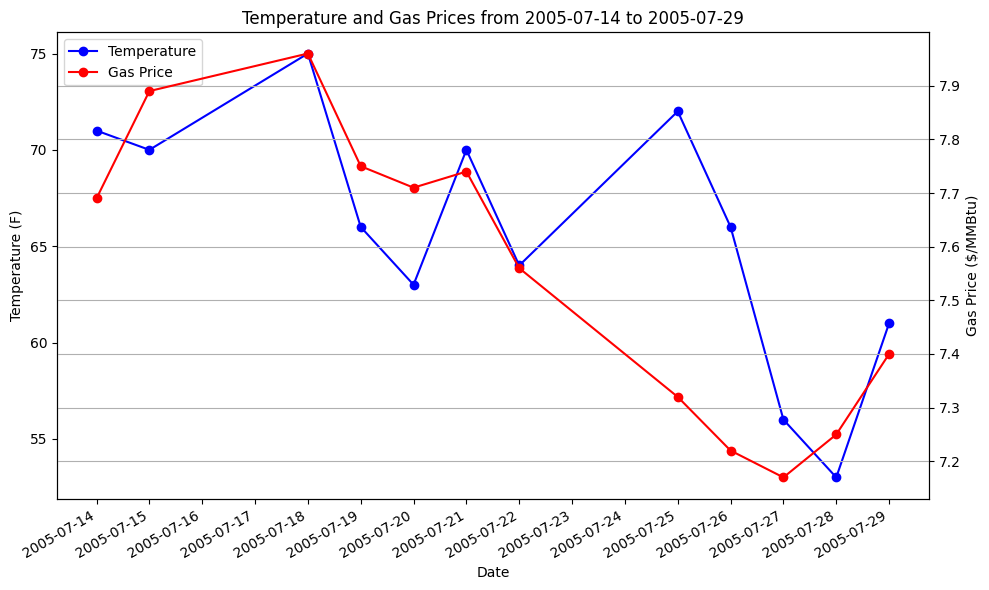

In [405]:
# Filter data
filtered_data = temp_and_gas_all.loc['2005-07-14':'2005-07-30']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


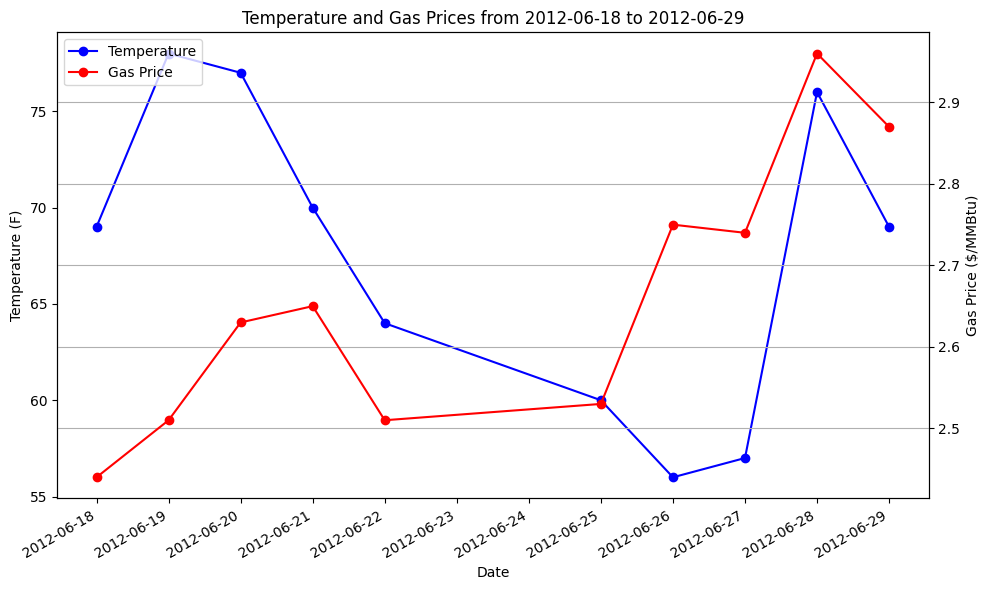

In [406]:
# Filter data
filtered_data = temp_and_gas_all.loc['2012-06-16':'2012-06-30']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


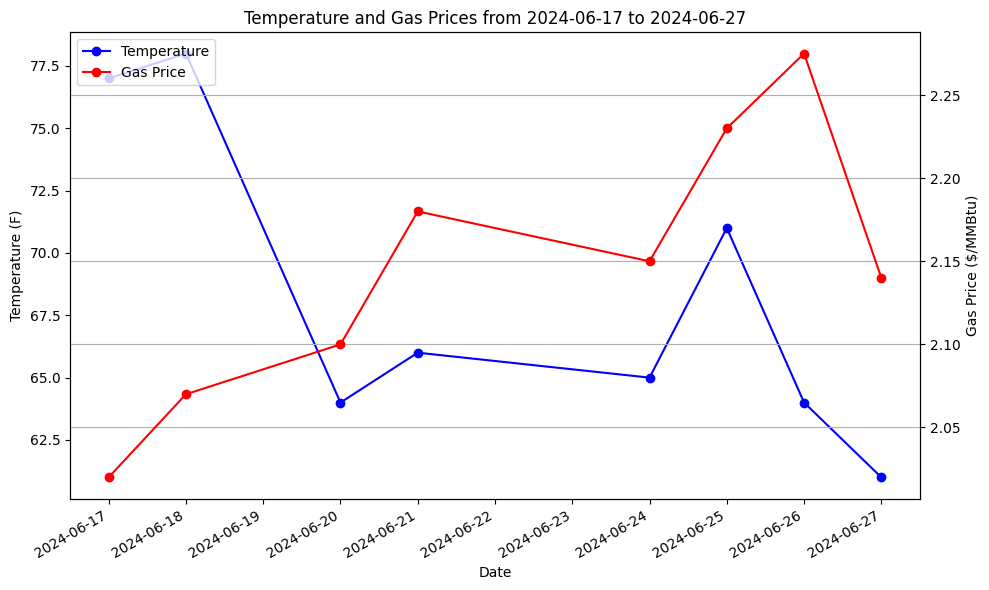

In [407]:
# Filter data
filtered_data = temp_and_gas_all.loc['2024-06-15':'2024-06-27']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


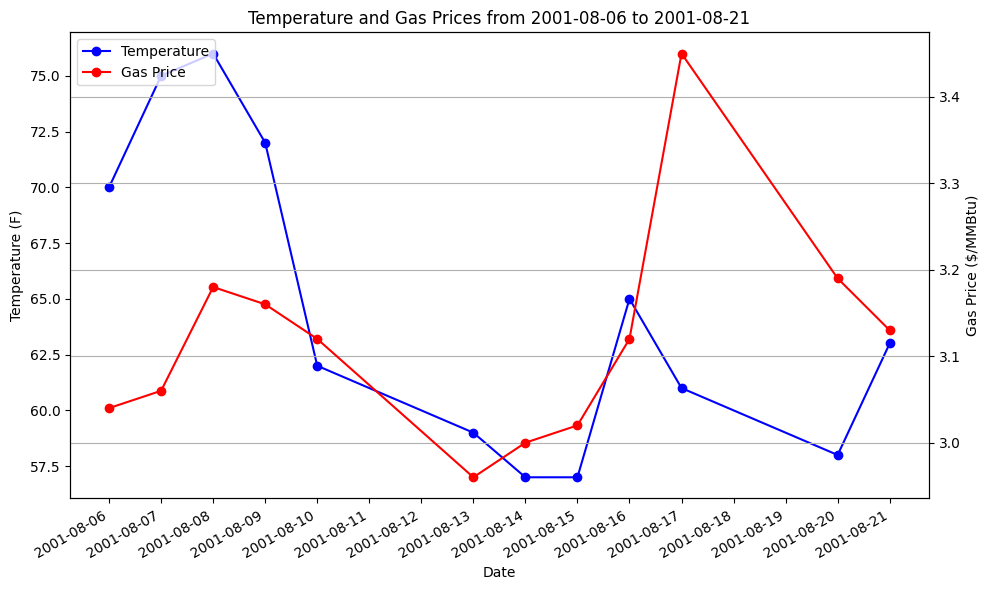

In [408]:
# Filter data
filtered_data = temp_and_gas_all.loc['2001-08-05':'2001-08-21']

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Format the date axis properly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels for readability

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)')
temp_line, = ax1.plot(filtered_data.index, filtered_data['TMIN'], color='blue', marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y')

# Create second y-axis for Gas Price
ax2 = ax1.twinx()
ax2.set_ylabel('Gas Price ($/MMBtu)')
price_line, = ax2.plot(filtered_data.index, filtered_data['averages'], color='red', marker='o', linestyle='-', label='Gas Price')
ax2.tick_params(axis='y')

# Title and legend
plt.title(f'Temperature and Gas Prices from {filtered_data.index.min().strftime("%Y-%m-%d")} to {filtered_data.index.max().strftime("%Y-%m-%d")}')

fig.tight_layout()
plt.grid()
lines = [temp_line, price_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


**Price Recovery**

20 events to try to demonstrate price recovery

quantify how long it takes for events to recover. 

plot only gas prices, standardize them (take the average and remove it form the series)
then plot all the events 

red lines, find the peak, find 2 days beofre and 10 days later and standardize them, then plot everything 

seperate summer and winter 



In [409]:
#standardize gas prices
temp_and_gas_all['avg_stand'] = (temp_and_gas_all['averages'] - temp_and_gas_all['averages'].mean()) / temp_and_gas_all['averages'].std()
temp_and_gas_winter['avg_stand'] = (temp_and_gas_winter['averages'] - temp_and_gas_winter['averages'].mean()) / temp_and_gas_winter['averages'].std()
temp_and_gas_summer['avg_stand'] = (temp_and_gas_summer['averages'] - temp_and_gas_summer['averages'].mean()) / temp_and_gas_summer['averages'].std()
temp_and_gas_exwinter['avg_stand'] = (temp_and_gas_exwinter['averages'] - temp_and_gas_exwinter['averages'].mean()) / temp_and_gas_exwinter['averages'].std()
temp_and_gas_exsummer['avg_stand'] = (temp_and_gas_exsummer['averages'] - temp_and_gas_exsummer['averages'].mean()) / temp_and_gas_exsummer['averages'].std()

/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/1957283212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_and_gas_winter['avg_stand'] = (temp_and_gas_winter['averages'] - temp_and_gas_winter['averages'].mean()) / temp_and_gas_winter['averages'].std()
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/1957283212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_and_gas_summer['avg_stand'] = (temp_and_gas_summer['averages'] - temp_and_gas_summer['averages'].mean()

/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/3578619032.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  event_data['avg_stand'].fillna(method='ffill', inplace=True)
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/3578619032.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  event_data['avg_stand'].fillna(method='ffill', inplace=True)
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/3578619032.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  event_data['avg_stand'].fillna(method='ffill', inplace=True)
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/3578619032.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future 

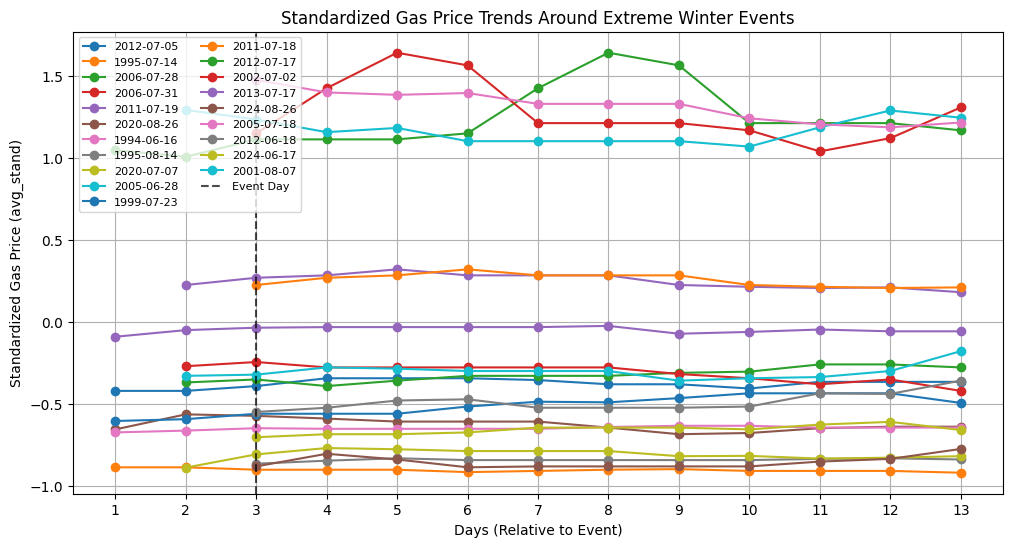

In [410]:
# Ensure DATE index is in datetime format
temp_and_gas_all.index = pd.to_datetime(temp_and_gas_all.index)

# Define date range (-2 days to +10 days for each event)
pre_days = 2
post_days = 10
total_days = pre_days + post_days + 1  # 1 for event day

# Create plot
plt.figure(figsize=(12, 6))

# Iterate through extreme winter dates
for event_date in dates:
    start_date = event_date - pd.DateOffset(days=pre_days)
    end_date = event_date + pd.DateOffset(days=post_days)

    # Generate full expected date range (to ensure 13 days)
    expected_dates = pd.date_range(start=start_date, end=end_date, freq='D')

    # Filter available data and reindex
    event_data = temp_and_gas_all.loc[start_date:end_date].copy()
    event_data = event_data.reindex(expected_dates)  # Add missing dates as NaN
    event_data['Day'] = range(1, total_days + 1)

    # Fill missing values (optional: interpolate, forward-fill, or fill with zeros)
    event_data['avg_stand'].fillna(method='ffill', inplace=True)

    # Plot
    plt.plot(event_data['Day'], event_data['avg_stand'], marker='o', linestyle='-', label=event_date.strftime('%Y-%m-%d'))

# Formatting
plt.axvline(x=3, color='black', linestyle='--', alpha=0.7, label='Event Day')  # Day 3 is the event
plt.xlabel('Days (Relative to Event)')
plt.ylabel('Standardized Gas Price (avg_stand)')
plt.title('Standardized Gas Price Trends Around Extreme Winter Events')
plt.xticks(range(1, total_days + 1))  # Set x-axis as Day 1-14
plt.legend(loc='upper left', fontsize=8, ncol=2)
plt.grid()
plt.show()

/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/1810903811.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  event_data['averages'].fillna(method='ffill', inplace=True)
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/1810903811.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  event_data['averages'].fillna(method='ffill', inplace=True)
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/1810903811.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  event_data['averages'].fillna(method='ffill', inplace=True)
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/1810903811.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future ver

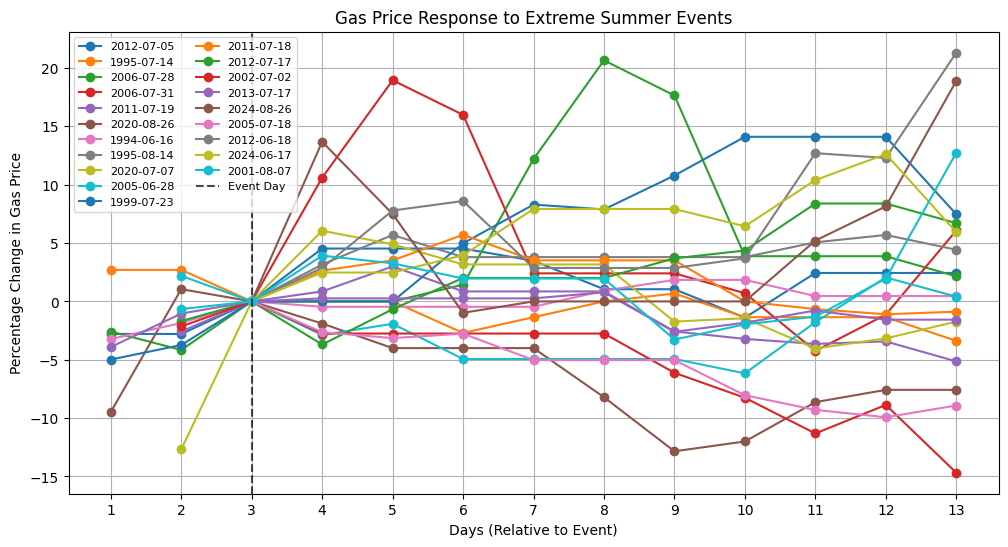

In [411]:
# Ensure DATE index is in datetime format
temp_and_gas_all.index = pd.to_datetime(temp_and_gas_all.index)

# Define date range (-2 days to +10 days for each event)
pre_days = 2
post_days = 10
total_days = pre_days + post_days + 1  # 1 for event day

# Create plot
plt.figure(figsize=(12, 6))

# Iterate through extreme winter dates
for event_date in dates:
    start_date = event_date - pd.DateOffset(days=pre_days)
    end_date = event_date + pd.DateOffset(days=post_days)

    # Generate full expected date range (to ensure 13 days)
    expected_dates = pd.date_range(start=start_date, end=end_date, freq='D')

    # Filter available data and reindex
    event_data = temp_and_gas_all.loc[start_date:end_date, ['averages']].copy()
    event_data = event_data.reindex(expected_dates)  # Add missing dates as NaN
    event_data['Day'] = range(1, total_days + 1)

    # Fill missing values (option: interpolate or forward-fill)
    event_data['averages'].fillna(method='ffill', inplace=True)

    # Get price on Day 3 (the event day)
    if 3 in event_data['Day'].values:
        event_day_price = event_data.loc[event_data['Day'] == 3, 'averages'].values[0]
    else:
        event_day_price = event_data['averages'].iloc[2]  # Fallback if Day 3 is missing

    # Compute percentage change relative to the event day
    event_data['Price Change (%)'] = ((event_data['averages'] - event_day_price) / event_day_price) * 100

    # Plot percentage change
    plt.plot(event_data['Day'], event_data['Price Change (%)'], marker='o', linestyle='-', label=event_date.strftime('%Y-%m-%d'))

# Formatting
plt.axvline(x=3, color='black', linestyle='--', alpha=0.7, label='Event Day')  # Day 3 is the event
plt.xlabel('Days (Relative to Event)')
plt.ylabel('Percentage Change in Gas Price')
plt.title('Gas Price Response to Extreme Summer Events')
plt.xticks(range(1, total_days + 1))  # Set x-axis as Day 1-14
plt.legend(loc='upper left', fontsize=8, ncol=2)
plt.grid()
plt.show()


This graph normalizes all events to a common baseline (day 3 price = 0%). It shows clear price spikes and recovery trends. 

/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/3806220536.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  event_data['averages'].fillna(method='ffill', inplace=True)
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/3806220536.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  event_data['averages'].fillna(method='ffill', inplace=True)
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/3806220536.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  event_data['averages'].fillna(method='ffill', inplace=True)
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/3806220536.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future ver

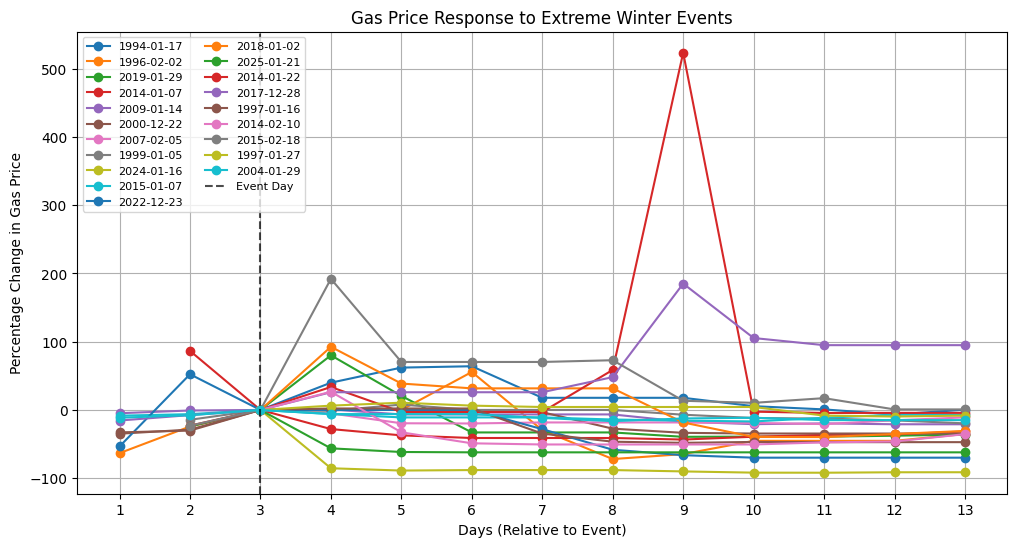

In [412]:
# Ensure DATE index is in datetime format
temp_and_gas_all.index = pd.to_datetime(temp_and_gas_all.index)

# Define date range (-2 days to +10 days for each event)
pre_days = 2
post_days = 10
total_days = pre_days + post_days + 1  # 1 for event day

# Create plot
plt.figure(figsize=(12, 6))

# Iterate through extreme winter dates
for event_date in dates1:
    start_date = event_date - pd.DateOffset(days=pre_days)
    end_date = event_date + pd.DateOffset(days=post_days)

    # Generate full expected date range (to ensure 13 days)
    expected_dates = pd.date_range(start=start_date, end=end_date, freq='D')

    # Filter available data and reindex
    event_data = temp_and_gas_all.loc[start_date:end_date, ['averages']].copy()
    event_data = event_data.reindex(expected_dates)  # Add missing dates as NaN
    event_data['Day'] = range(1, total_days + 1)

    # Fill missing values (option: interpolate or forward-fill)
    event_data['averages'].fillna(method='ffill', inplace=True)

    # Get price on Day 3 (the event day)
    if 3 in event_data['Day'].values:
        event_day_price = event_data.loc[event_data['Day'] == 3, 'averages'].values[0]
    else:
        event_day_price = event_data['averages'].iloc[2]  # Fallback if Day 3 is missing

    # Compute percentage change relative to the event day
    event_data['Price Change (%)'] = ((event_data['averages'] - event_day_price) / event_day_price) * 100

    # Plot percentage change
    plt.plot(event_data['Day'], event_data['Price Change (%)'], marker='o', linestyle='-', label=event_date.strftime('%Y-%m-%d'))

# Formatting
plt.axvline(x=3, color='black', linestyle='--', alpha=0.7, label='Event Day')  # Day 3 is the event
plt.xlabel('Days (Relative to Event)')
plt.ylabel('Percentage Change in Gas Price')
plt.title('Gas Price Response to Extreme Winter Events')
plt.xticks(range(1, total_days + 1))  # Set x-axis as Day 1-14
plt.legend(loc='upper left', fontsize=8, ncol=2)
plt.grid()
plt.show()


In [413]:
import pandas as pd

# Ensure DATE index is in datetime format
temp_and_gas_all.index = pd.to_datetime(temp_and_gas_all.index)

# Define date range (-2 days to +10 days for each event)
pre_days = 2
post_days = 10
total_days = pre_days + post_days + 1  # 1 for event day

# Create lists to store results
event_results = []
peak_days_after_event = []
decline_days = [] 

# Iterate through extreme winter dates
for event_date in dates:
    start_date = event_date - pd.DateOffset(days=pre_days)
    end_date = event_date + pd.DateOffset(days=post_days)

    # Generate full expected date range (to ensure 13 days)
    expected_dates = pd.date_range(start=start_date, end=end_date, freq='D')

    # Filter available data and reindex
    event_data = temp_and_gas_all.loc[start_date:end_date, ['averages']].copy()
    event_data = event_data.reindex(expected_dates)  # Add missing dates as NaN
    event_data['Day'] = range(1, total_days + 1)

    # Fill missing values (option: interpolate or forward-fill)
    event_data['averages'].fillna(method='ffill', inplace=True)

    # Get price on Day 3 (the event day)
    if 3 in event_data['Day'].values:
        event_day_price = event_data.loc[event_data['Day'] == 3, 'averages'].values[0]
    else:
        event_day_price = event_data['averages'].iloc[2]  # Fallback if Day 3 is missing

    # Compute percentage change relative to the event day
    event_data['Price Change (%)'] = ((event_data['averages'] - event_day_price) / event_day_price) * 100

    # Get % change from Day 1 to Day 3
    day1_price = event_data.loc[event_data['Day'] == 1, 'averages'].values[0]
    day1_to_day3_change = ((event_day_price - day1_price) / day1_price) * 100

    # Find peak percent change **after** Day 3
    post_event_data = event_data[event_data['Day'] > 3]  # Only consider days after Day 3
    peak_day_after_3 = post_event_data.loc[post_event_data['Price Change (%)'].idxmax(), 'Day']
    peak_value_after_3 = post_event_data['Price Change (%)'].max()

    # Find the first day after Day 3 where prices started declining
    price_decline_day = None
    for i in range(4, total_days + 1):  # Start from Day 4
        if event_data.loc[event_data['Day'] == i, 'Price Change (%)'].values[0] < event_data.loc[event_data['Day'] == (i - 1), 'Price Change (%)'].values[0]:
            price_decline_day = i
            break

    # Store results
    event_results.append({
        'Event Date': event_date.strftime('%Y-%m-%d'),
        'Day 1-3 % Change': day1_to_day3_change,
        'Peak Day After Event': peak_day_after_3,
        'Peak % After Event': peak_value_after_3,
        'First Decline Day': price_decline_day
    })

    peak_days_after_event.append(peak_day_after_3)
    if price_decline_day:
        decline_days.append(price_decline_day)

# Convert results to DataFrame
df_results = pd.DataFrame(event_results)

# Calculate averages
avg_day1_to_day3_change = df_results['Day 1-3 % Change'].mean()
avg_peak_day_after_3 = pd.Series(peak_days_after_event).mean()
avg_decline_day = pd.Series(decline_days).mean()


# Print summary
print(f"📊 **Summary of Analysis:**")
print(f"🔥 **Average % Change from Day 1 to Day 3:** {avg_day1_to_day3_change:.2f}%")
print(f"📈 **Average Peak Day After Day 3:** Day {avg_peak_day_after_3:.1f}")
print(f"📉 **Average Day Prices Started Declining:** Day {avg_decline_day:.1f}")


📊 **Summary of Analysis:**
🔥 **Average % Change from Day 1 to Day 3:** 3.71%
📈 **Average Peak Day After Day 3:** Day 8.0
📉 **Average Day Prices Started Declining:** Day 6.0


/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/3738446753.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  event_data['averages'].fillna(method='ffill', inplace=True)
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/3738446753.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  event_data['averages'].fillna(method='ffill', inplace=True)
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/3738446753.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  event_data['averages'].fillna(method='ffill', inplace=True)
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/3738446753.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future ver

In [414]:
import pandas as pd

# Ensure DATE index is in datetime format
temp_and_gas_all.index = pd.to_datetime(temp_and_gas_all.index)

# Define date range (-2 days to +10 days for each event)
pre_days = 2
post_days = 10
total_days = pre_days + post_days + 1  # 1 for event day

# Create lists to store results
event_results = []
peak_days_after_event = []
decline_days = []

# Iterate through extreme winter dates
for event_date in dates1:
    start_date = event_date - pd.DateOffset(days=pre_days)
    end_date = event_date + pd.DateOffset(days=post_days)

    # Generate full expected date range (to ensure 13 days)
    expected_dates = pd.date_range(start=start_date, end=end_date, freq='D')

    # Filter available data and reindex
    event_data = temp_and_gas_all.loc[start_date:end_date, ['averages']].copy()
    event_data = event_data.reindex(expected_dates)  # Add missing dates as NaN
    event_data['Day'] = range(1, total_days + 1)

    # Fill missing values (option: interpolate or forward-fill)
    event_data['averages'].fillna(method='ffill', inplace=True)

    # Get price on Day 3 (the event day)
    if 3 in event_data['Day'].values:
        event_day_price = event_data.loc[event_data['Day'] == 3, 'averages'].values[0]
    else:
        event_day_price = event_data['averages'].iloc[2]  # Fallback if Day 3 is missing

    # Compute percentage change relative to the event day
    event_data['Price Change (%)'] = ((event_data['averages'] - event_day_price) / event_day_price) * 100

    # Get % change from Day 1 to Day 3
    day1_price = event_data.loc[event_data['Day'] == 1, 'averages'].values[0]
    day1_to_day3_change = ((event_day_price - day1_price) / day1_price) * 100

    # Find peak percent change **after** Day 3
    post_event_data = event_data[event_data['Day'] > 3]  # Only consider days after Day 3
    peak_day_after_3 = post_event_data.loc[post_event_data['Price Change (%)'].idxmax(), 'Day']
    peak_value_after_3 = post_event_data['Price Change (%)'].max()

    # Find the first day after Day 3 where prices started declining
    price_decline_day = None
    for i in range(4, total_days + 1):  # Start from Day 4
        if event_data.loc[event_data['Day'] == i, 'Price Change (%)'].values[0] < event_data.loc[event_data['Day'] == (i - 1), 'Price Change (%)'].values[0]:
            price_decline_day = i
            break

    # Store results
    event_results.append({
        'Event Date': event_date.strftime('%Y-%m-%d'),
        'Day 1-3 % Change': day1_to_day3_change,
        'Peak Day After Event': peak_day_after_3,
        'Peak % After Event': peak_value_after_3,
        'First Decline Day': price_decline_day
    })

    peak_days_after_event.append(peak_day_after_3)
    if price_decline_day:
        decline_days.append(price_decline_day)

# Convert results to DataFrame
df_results = pd.DataFrame(event_results)

# Calculate averages
avg_day1_to_day3_change = df_results['Day 1-3 % Change'].mean()
avg_peak_day_after_3 = pd.Series(peak_days_after_event).mean()
avg_decline_day = pd.Series(decline_days).mean()


# Print summary
print(f"📊 **Summary of Analysis:**")
print(f"🔥 **Average % Change from Day 1 to Day 3:** {avg_day1_to_day3_change:.2f}%")
print(f"📈 **Average Peak Day After Day 3:** Day {avg_peak_day_after_3:.1f}")
print(f"📉 **Average Day Prices Started Declining:** Day {avg_decline_day:.1f}")


/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/394503290.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  event_data['averages'].fillna(method='ffill', inplace=True)
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/394503290.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  event_data['averages'].fillna(method='ffill', inplace=True)
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/394503290.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  event_data['averages'].fillna(method='ffill', inplace=True)
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/394503290.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version

📊 **Summary of Analysis:**
🔥 **Average % Change from Day 1 to Day 3:** 54.41%
📈 **Average Peak Day After Day 3:** Day 4.8
📉 **Average Day Prices Started Declining:** Day 5.5


/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/394503290.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  event_data['averages'].fillna(method='ffill', inplace=True)
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/394503290.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  event_data['averages'].fillna(method='ffill', inplace=True)
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/394503290.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  event_data['averages'].fillna(method='ffill', inplace=True)
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/394503290.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version

**Modeling Data**

In [415]:
#train ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error


In [416]:
#check for stationarity
from statsmodels.tsa.stattools import adfuller

# Remove rows with missing or infinite values
temp_and_gas_all_nonan = temp_and_gas_all.replace([np.inf, -np.inf], np.nan).dropna()
# Perform the ADF test on gas prices
adf_test = adfuller(temp_and_gas_all_nonan['averages'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"P-value: {adf_test[1]}")

# Check if differencing is needed
if adf_test[1] > 0.05:
    print("Data is not stationary. Differencing is needed.")
else:
    print("Data is stationary. No differencing needed.")


ADF Statistic: -5.613159025457936
P-value: 1.1907425953243741e-06
Data is stationary. No differencing needed.


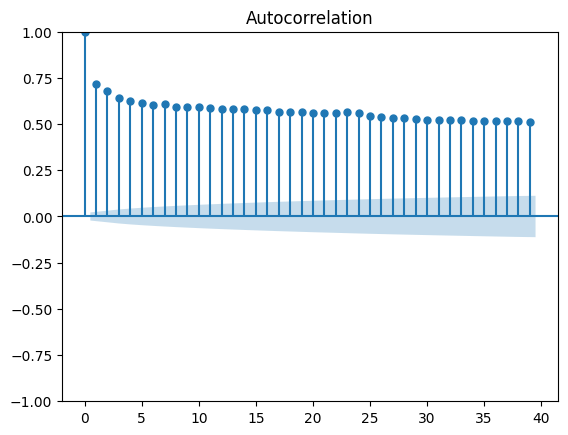

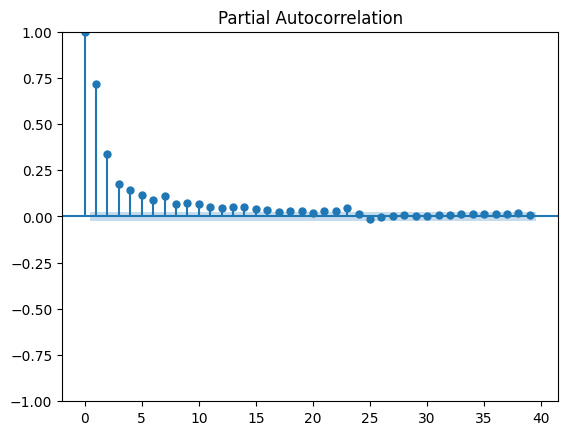

In [417]:
#identify AR and MA terms using ACF and PACF
#ACF tells the MA (q) term and the PACF tells the AR (p) term for the ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF (for MA order q)
plot_acf(temp_and_gas_all['averages'].dropna())
plt.show()

# Plot PACF (for AR order p)
plot_pacf(temp_and_gas_all['averages'].dropna())
plt.show()


Determine p and q

ACF plot determines moving average. Find where autocorrelation cuts off (drops to 0)
Graph shows a gradual decay, indicating that AR model of p>0 might be best. q= 1 or 2

PACF plot determines AR order. Look for first lag where PACF cuts off. 
Graph has large spike at lag 1 and 2. p=2. 

Data was already stationary, so d=0.

ARIMA model = ARIMA(2,0,1) or ARIMA(2,0,2)

In [418]:
#train ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model with identified (p, d, q)
p, d, q = 2, 0, 1  # Adjust q to 2 if needed
arima_model = ARIMA(temp_and_gas_all_nonan['averages'], order=(p, d, q))

# Fit the model
arima_fit = arima_model.fit()

# Print model summary
print(arima_fit.summary())


/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               averages   No. Observations:                 4761
Model:                 ARIMA(2, 0, 1)   Log Likelihood              -10343.586
Date:                Thu, 20 Mar 2025   AIC                          20697.173
Time:                        17:49:30   BIC                          20729.514
Sample:                             0   HQIC                         20708.536
                               - 4761                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6467      1.158      3.148      0.002       1.376       5.917
ar.L1          1.1987      0.007    175.417      0.000       1.185       1.212
ar.L2         -0.2083      0.005    -45.584      0.0

Evaluate:

AIC/BIC: low values indicate better model:
we have very high numbers, so will try a 2,0,2

In [419]:
#train ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model with identified (p, d, q)
p, d, q = 2, 0, 2  # Adjust q to 2 if needed
arima_model = ARIMA(temp_and_gas_all_nonan['averages'], order=(p, d, q))

# Fit the model
arima_fit = arima_model.fit()

# Print model summary
print(arima_fit.summary())


/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               averages   No. Observations:                 4761
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -10323.403
Date:                Thu, 20 Mar 2025   AIC                          20658.806
Time:                        17:49:32   BIC                          20697.616
Sample:                             0   HQIC                         20672.442
                               - 4761                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6229      1.425      2.543      0.011       0.830       6.415
ar.L1          1.6081      0.026     60.804      0.000       1.556       1.660
ar.L2         -0.6108      0.025    -24.143      0.0

Make predicitons

/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


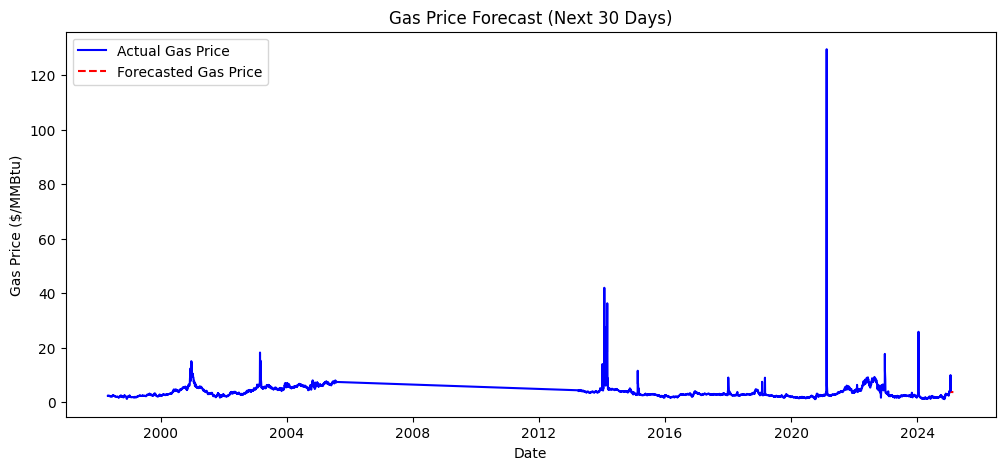

In [420]:
#forecast next 30 days 
# Forecast the next 30 days
forecast_steps = 30
forecast = arima_fit.forecast(steps=forecast_steps)

# Create a date range for the forecast
future_dates = pd.date_range(start=temp_and_gas_all_nonan.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Create DataFrame for forecast
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_Gas_Price': forecast.values})
forecast_df.set_index('Date', inplace=True)

# Plot actual vs forecasted values
plt.figure(figsize=(12, 5))
plt.plot(temp_and_gas_all_nonan.index, temp_and_gas_all_nonan['averages'], label='Actual Gas Price', color='blue')
plt.plot(forecast_df.index, forecast_df['Predicted_Gas_Price'], label='Forecasted Gas Price', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Gas Price ($/MMBtu)')
plt.title('Gas Price Forecast (Next 30 Days)')
plt.legend()
plt.show()


Evaluate the model

In [421]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data into train and test sets
train_size = int(len(temp_and_gas_all_nonan) * 0.8)
train, test = temp_and_gas_all_nonan['averages'][:train_size], temp_and_gas_all_nonan['averages'][train_size:]

# Train ARIMA on training set
arima_model = ARIMA(train, order=(p, d, q))
arima_fit = arima_model.fit()

# Make predictions on test set
predictions = arima_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'ARIMA RMSE: {rmse}')


/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA RMSE: 2.1356179322049123


/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ARIMA RMSE was 2.1.
This measures the average prediction error. Lower RMSE means a better fit.
Models predictions deviate from actual prices by an average of 2.10/MMBtu. Gas prices range, so this performs pretty well, but not great. Now we will add SARIMA to see if adding weather data is a better predictor for gas prices. 

SARIMAX model to add temperature data

In [422]:
#train SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMAX model (using p, d, q from ARIMA)
p, d, q = 2, 0, 1  # Based on your ARIMA results

sarimax_model = SARIMAX(temp_and_gas_all_nonan['averages'], 
                        exog=temp_and_gas_all_nonan['Temperature'],  # Temperature as an external factor
                        order=(p, d, q),
                        seasonal_order=(0, 0, 0, 0))  # No seasonal component for now

# Fit the model
sarimax_fit = sarimax_model.fit()

# Print summary
print(sarimax_fit.summary())


/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.23535D+00    |proj g|=  8.56414D-01

At iterate    5    f=  2.21380D+00    |proj g|=  1.55391D-02

At iterate   10    f=  2.21249D+00    |proj g|=  1.56447D-02

At iterate   15    f=  2.20786D+00    |proj g|=  3.53168D-01

At iterate   20    f=  2.18043D+00    |proj g|=  7.98425D-02

At iterate   25    f=  2.17678D+00    |proj g|=  1.15629D-02

At iterate   30    f=  2.17231D+00    |proj g|=  2.30946D-03

At iterate   35    f=  2.17173D+00    |proj g|=  1.53444D-02

At iterate   40    f=  2.17170D+00    |proj g|=  3.18911D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

In [423]:
#evaluate model performace 
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions
predictions = sarimax_fit.predict(start=len(temp_and_gas_all_nonan) - 100,  # Last 100 points for testing
                                  end=len(temp_and_gas_all_nonan) - 1, 
                                  exog=temp_and_gas_all_nonan['Temperature'].iloc[-100:])

# Get actual values
actual_values = temp_and_gas_all_nonan['averages'].iloc[-100:]

# Compute RMSE
rmse_sarimax = np.sqrt(mean_squared_error(actual_values, predictions))
print(f'SARIMAX RMSE: {rmse_sarimax}')


SARIMAX RMSE: 0.6824983049015472


The RMSE is 0.682, which is much lower than the ARIMA model, showing that temperature improves predictions. 

/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


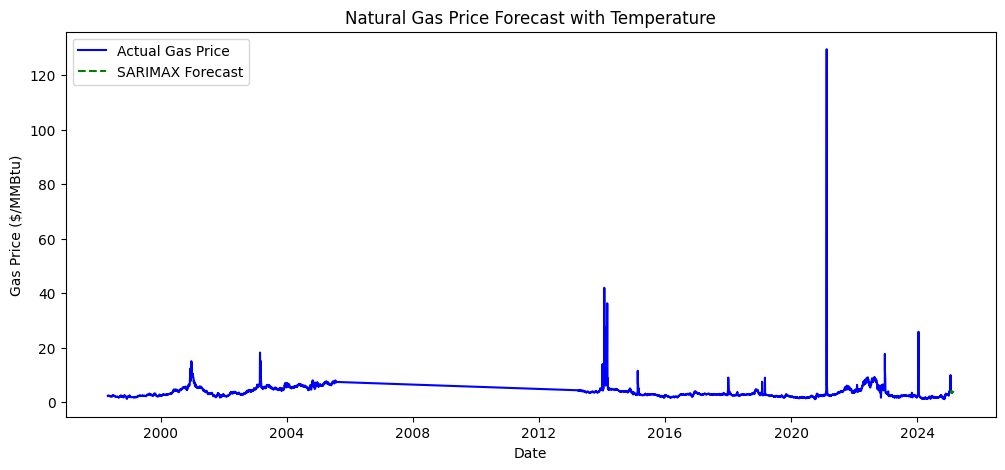

In [424]:
#forecast next 30 days
import matplotlib.pyplot as plt

# Forecast the next 30 days
future_temps = temp_and_gas_all_nonan['Temperature'].iloc[-30:].values  # Use last 30 days' temps as proxy for future
forecast_sarimax = sarimax_fit.forecast(steps=30, exog=future_temps)

# Create a DataFrame for forecasted values
future_dates = pd.date_range(start=temp_and_gas_all_nonan.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_Gas_Price': forecast_sarimax})
forecast_df.set_index('Date', inplace=True)

# Plot actual vs forecasted values
plt.figure(figsize=(12, 5))
plt.plot(temp_and_gas_all_nonan.index, temp_and_gas_all_nonan['averages'], label='Actual Gas Price', color='blue')
plt.plot(forecast_df.index, forecast_df['Predicted_Gas_Price'], label='SARIMAX Forecast', color='green', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Gas Price ($/MMBtu)')
plt.title('Natural Gas Price Forecast with Temperature')
plt.legend()
plt.show()


**Try ARIMA/SARIMA models for summer vs winter data to see if temperature is a larger predictor in the summer or winter months**

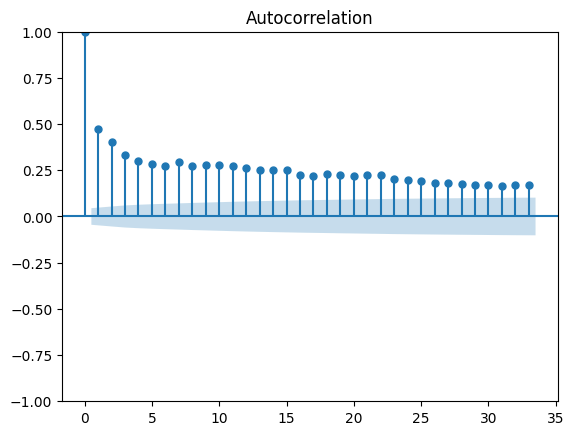

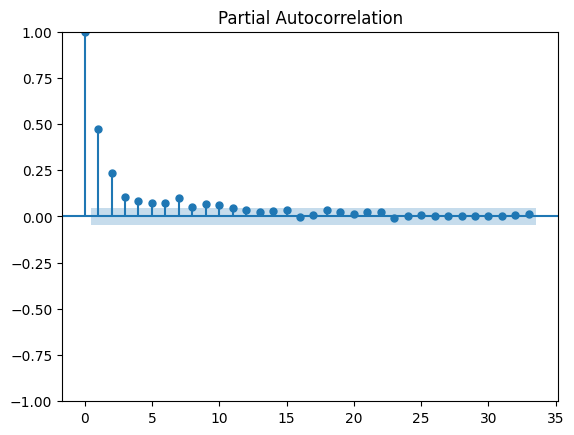

In [425]:
#identify AR and MA terms using ACF and PACF
#ACF tells the MA (q) term and the PACF tells the AR (p) term for the ARIMA

# Plot ACF (for MA order q)
plot_acf(temp_and_gas_winter['averages'].dropna())
plt.show()

# Plot PACF (for AR order p)
plot_pacf(temp_and_gas_winter['averages'].dropna())
plt.show()

In [426]:
#train ARIMA

# Define ARIMA model with identified (p, d, q)
p, d, q = 1, 0, 1  # Adjust q to 2 if needed
arima_model = ARIMA(temp_and_gas_winter['averages'], order=(p, d, q))

# Fit the model
arima_fit = arima_model.fit()

# Print model summary
print(arima_fit.summary())


/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               averages   No. Observations:                 1905
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5009.890
Date:                Thu, 20 Mar 2025   AIC                          10027.781
Time:                        17:49:35   BIC                          10049.990
Sample:                             0   HQIC                         10035.955
                               - 1905                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3098      0.907      4.753      0.000       2.533       6.087
ar.L1          0.9242      0.010     94.702      0.000       0.905       0.943
ma.L1         -0.6819      0.012    -58.134      0.0

/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


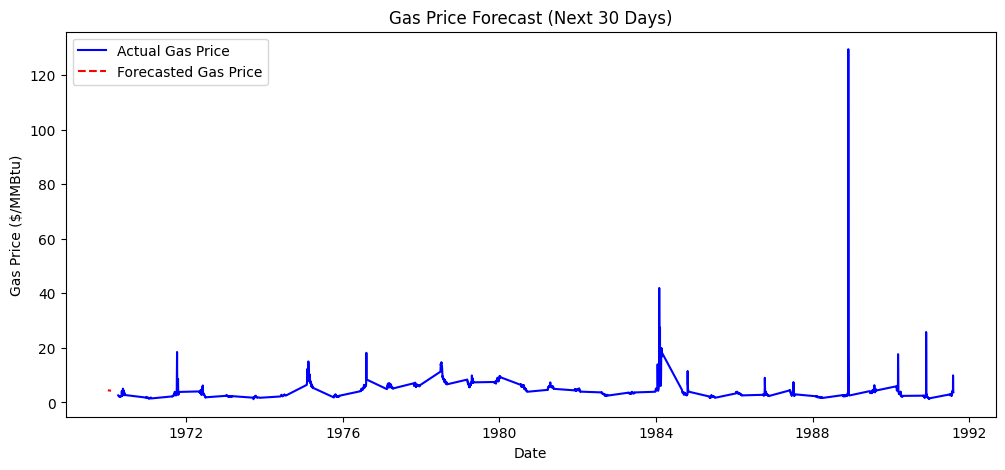

In [427]:
#forecast next 30 days 
# Forecast the next 30 days
forecast_steps = 30
forecast = arima_fit.forecast(steps=forecast_steps)

# Create a date range for the forecast
future_dates = pd.date_range(start=temp_and_gas_winter.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Create DataFrame for forecast
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_Gas_Price': forecast.values})
forecast_df.set_index('Date', inplace=True)

# Plot actual vs forecasted values
plt.figure(figsize=(12, 5))
plt.plot(temp_and_gas_winter.index, temp_and_gas_winter['averages'], label='Actual Gas Price', color='blue')
plt.plot(forecast_df.index, forecast_df['Predicted_Gas_Price'], label='Forecasted Gas Price', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Gas Price ($/MMBtu)')
plt.title('Gas Price Forecast (Next 30 Days)')
plt.legend()
plt.show()


In [428]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data into train and test sets
train_size = int(len(temp_and_gas_winter) * 0.8)
train, test = temp_and_gas_winter['averages'][:train_size], temp_and_gas_winter['averages'][train_size:]

# Train ARIMA on training set
arima_model = ARIMA(train, order=(p, d, q))
arima_fit = arima_model.fit()

# Make predictions on test set
predictions = arima_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'ARIMA RMSE: {rmse}')


ARIMA RMSE: 6.901868233745365


/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/stats

In [429]:
#train SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMAX model (using p, d, q from ARIMA)
p, d, q = 1, 0, 1  # Based on your ARIMA results

sarimax_model = SARIMAX(temp_and_gas_winter['averages'], 
                        exog=temp_and_gas_winter['TMIN'],  # Temperature as an external factor
                        order=(p, d, q),
                        seasonal_order=(0, 0, 0, 0))  # No seasonal component for now

# Fit the model
sarimax_fit = sarimax_model.fit()

# Print summary
print(sarimax_fit.summary())


/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74297D+00    |proj g|=  8.90908D-01

At iterate    5    f=  2.66723D+00    |proj g|=  4.11962D-01

At iterate   10    f=  2.64835D+00    |proj g|=  1.23445D-01

At iterate   15    f=  2.63021D+00    |proj g|=  3.04420D-02

At iterate   20    f=  2.62837D+00    |proj g|=  1.18174D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     29      1     0     0   5.304D-06   2.628D+00
  F =   2.6283432301351661     

CONVERG

In [430]:
#evaluate model performace 

# Make predictions
predictions = sarimax_fit.predict(start=len(temp_and_gas_winter) - 100,  # Last 100 points for testing
                                  end=len(temp_and_gas_winter) - 1, 
                                  exog=temp_and_gas_winter['TMIN'].iloc[-100:])

# Get actual values
actual_values = temp_and_gas_winter['averages'].iloc[-100:]

# Compute RMSE
rmse_sarimax = np.sqrt(mean_squared_error(actual_values, predictions))
print(f'SARIMAX RMSE: {rmse_sarimax}')


SARIMAX RMSE: 2.3621999749684615


Summer Data

In [431]:
#train ARIMA

# Define ARIMA model with identified (p, d, q)
p, d, q = 1, 0, 1  # Adjust q to 2 if needed
arima_model = ARIMA(temp_and_gas_summer['averages'], order=(p, d, q))

# Fit the model
arima_fit = arima_model.fit()

# Print model summary
print(arima_fit.summary())


                               SARIMAX Results                                
Dep. Variable:               averages   No. Observations:                 2028
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -617.526
Date:                Thu, 20 Mar 2025   AIC                           1243.052
Time:                        17:49:36   BIC                           1265.512
Sample:                             0   HQIC                          1251.293
                               - 2028                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6727      1.113      3.299      0.001       1.491       5.854
ar.L1          0.9881      0.004    246.000      0.000       0.980       0.996
ma.L1          0.0125      0.019      0.668      0.5

/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


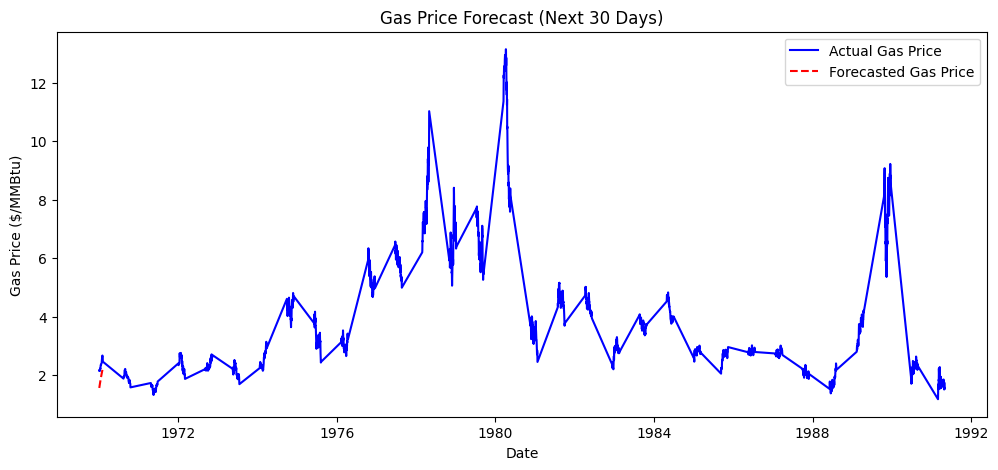

In [432]:
#forecast next 30 days 
# Forecast the next 30 days
forecast_steps = 30
forecast = arima_fit.forecast(steps=forecast_steps)

# Create a date range for the forecast
future_dates = pd.date_range(start=temp_and_gas_summer.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Create DataFrame for forecast
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_Gas_Price': forecast.values})
forecast_df.set_index('Date', inplace=True)

# Plot actual vs forecasted values
plt.figure(figsize=(12, 5))
plt.plot(temp_and_gas_summer.index, temp_and_gas_summer['averages'], label='Actual Gas Price', color='blue')
plt.plot(forecast_df.index, forecast_df['Predicted_Gas_Price'], label='Forecasted Gas Price', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Gas Price ($/MMBtu)')
plt.title('Gas Price Forecast (Next 30 Days)')
plt.legend()
plt.show()


In [433]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data into train and test sets
train_size = int(len(temp_and_gas_summer) * 0.8)
train, test = temp_and_gas_summer['averages'][:train_size], temp_and_gas_summer['averages'][train_size:]

# Train ARIMA on training set
arima_model = ARIMA(train, order=(p, d, q))
arima_fit = arima_model.fit()

# Make predictions on test set
predictions = arima_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'ARIMA RMSE: {rmse}')


/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA RMSE: 2.0434276433534984


/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [434]:
#train SARIMAX model

# Define SARIMAX model (using p, d, q from ARIMA)
p, d, q = 1, 0, 1  # Based on your ARIMA results

sarimax_model = SARIMAX(temp_and_gas_summer['averages'], 
                        exog=temp_and_gas_summer['TMAX'],  # Temperature as an external factor
                        order=(p, d, q),
                        seasonal_order=(0, 0, 0, 0))  # No seasonal component for now

# Fit the model
sarimax_fit = sarimax_model.fit()

# Print summary
print(sarimax_fit.summary())


/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/meganvanderwiele/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.21556D-01    |proj g|=  1.01533D+01

At iterate    5    f=  3.31631D-01    |proj g|=  1.73141D-01

At iterate   10    f=  3.23324D-01    |proj g|=  1.34842D-02

At iterate   15    f=  3.22419D-01    |proj g|=  6.95211D-01

At iterate   20    f=  3.07933D-01    |proj g|=  3.48860D-01

At iterate   25    f=  3.06842D-01    |proj g|=  1.23777D-02

At iterate   30    f=  3.06835D-01    |proj g|=  1.57659D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [435]:
#evaluate model performace 

# Make predictions
predictions = sarimax_fit.predict(start=len(temp_and_gas_summer) - 100,  # Last 100 points for testing
                                  end=len(temp_and_gas_summer) - 1, 
                                  exog=temp_and_gas_summer['TMAX'].iloc[-100:])

# Get actual values
actual_values = temp_and_gas_summer['averages'].iloc[-100:]

# Compute RMSE
rmse_sarimax = np.sqrt(mean_squared_error(actual_values, predictions))
print(f'SARIMAX RMSE: {rmse_sarimax}')


SARIMAX RMSE: 0.16107664283232112


**Compute Seasonal Changes**

In [436]:
#compute price change from the previous day
temp_and_gas_all['Gas_Price_Change'] = temp_and_gas_all['averages'].diff()

temp_and_gas_all.dropna(inplace=True)
temp_and_gas_all.head()

TMAX  TMIN  TAVG  PRCP  SNOW  averages  highs  lows  Month  \
DATE                                                                     
1998-05-01  65.0  52.0  59.0  0.00   0.0      2.32   2.40  2.25      5   
1998-05-04  72.0  48.0  60.0  0.01   0.0      2.24   2.30  2.17      5   
1998-05-05  69.0  54.0  62.0  0.08   0.0      2.23   2.31  2.17      5   
1998-05-06  77.0  58.0  68.0  0.11   0.0      2.32   2.35  2.28      5   
1998-05-07  59.0  55.0  57.0  2.07   0.0      2.23   2.27  2.19      5   

            Temperature  avg_stand  Gas_Price_Change  
DATE                                                  
1998-05-01         52.0  -0.594261             -0.05  
1998-05-04         48.0  -0.623638             -0.08  
1998-05-05         54.0  -0.627310             -0.01  
1998-05-06         58.0  -0.594261              0.09  
1998-05-07         55.0  -0.627310             -0.09

In [437]:
temp_and_gas_exsummer['Gas_Price_Change'] = temp_and_gas_exsummer['averages'].diff()
temp_and_gas_exwinter['Gas_Price_Change'] = temp_and_gas_exwinter['averages'].diff()
temp_and_gas_summer['Gas_Price_Change'] = temp_and_gas_summer['averages'].diff()
temp_and_gas_winter['Gas_Price_Change'] = temp_and_gas_winter['averages'].diff()

#remove missing values
temp_and_gas_exsummer.dropna(inplace=True)
temp_and_gas_exwinter.dropna(inplace=True)
temp_and_gas_summer.dropna(inplace=True)


/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/859721769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_and_gas_exsummer['Gas_Price_Change'] = temp_and_gas_exsummer['averages'].diff()
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/859721769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_and_gas_exwinter['Gas_Price_Change'] = temp_and_gas_exwinter['averages'].diff()
/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_6990/859721769.py:3: SettingWit

In [438]:
#extract extreme weather days 

# Define extreme winter and summer dates
extreme_winter_dates = pd.to_datetime([
    '1994-01-17', '1996-02-02', '2019-01-29', '2014-01-07', '2009-01-14',
    '2000-12-22', '2007-02-05', '1999-01-05', '2024-01-16', '2015-01-07',
    '2022-12-23', '2018-01-02', '2025-01-21', '2014-01-22', '2017-12-28',
    '1997-01-16', '2014-02-10', '2015-02-18', '1997-01-27', '2004-01-29'
])

extreme_summer_dates = pd.to_datetime([
    '2012-07-05', '1995-07-14', '2006-07-28', '2006-07-31', '2011-07-19',
    '2020-08-26', '1994-06-16', '1995-08-14', '2002-07-07', '2005-06-28',
    '1999-07-23', '2011-07-18', '2012-07-17', '2002-07-02', '2013-07-17',
    '2024-08-26', '2005-07-18', '2012-06-18', '2024-06-17', '2001-08-07'
])

# Filter for extreme weather days
extreme_weather = temp_and_gas_all[temp_and_gas_all.index.isin(extreme_winter_dates) |
                                   temp_and_gas_all.index.isin(extreme_summer_dates)]




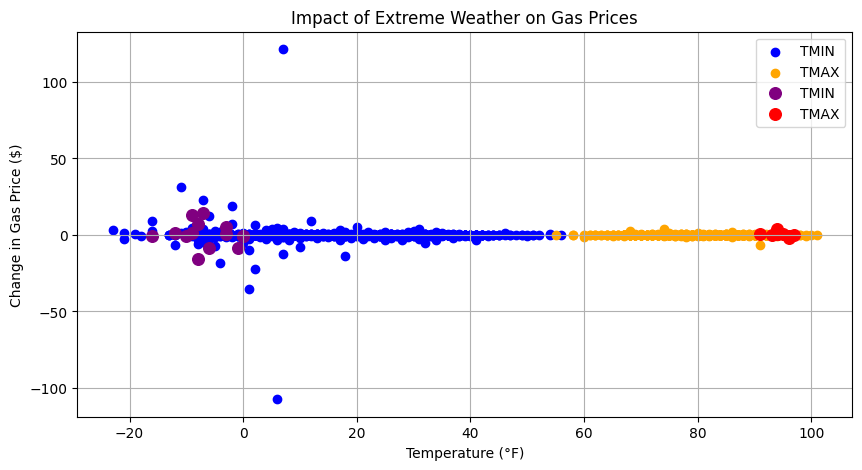

In [439]:
# Scatter plot of temperature vs. gas price change
plt.figure(figsize=(10, 5))
plt.scatter(temp_and_gas_winter['TMIN'], temp_and_gas_winter['Gas_Price_Change'], color='blue', label='TMIN')
plt.scatter(temp_and_gas_summer['TMAX'], temp_and_gas_summer['Gas_Price_Change'], color='orange', label='TMAX')
plt.scatter(temp_and_gas_exwinter['TMIN'], temp_and_gas_exwinter['Gas_Price_Change'], color='purple', label='TMIN', s=70)
plt.scatter(temp_and_gas_exsummer['TMAX'], temp_and_gas_exsummer['Gas_Price_Change'], color='red', label='TMAX', s=70)
plt.xlabel("Temperature (°F)")
plt.ylabel("Change in Gas Price ($)")
plt.title("Impact of Extreme Weather on Gas Prices")
plt.legend()
plt.grid()
plt.show()

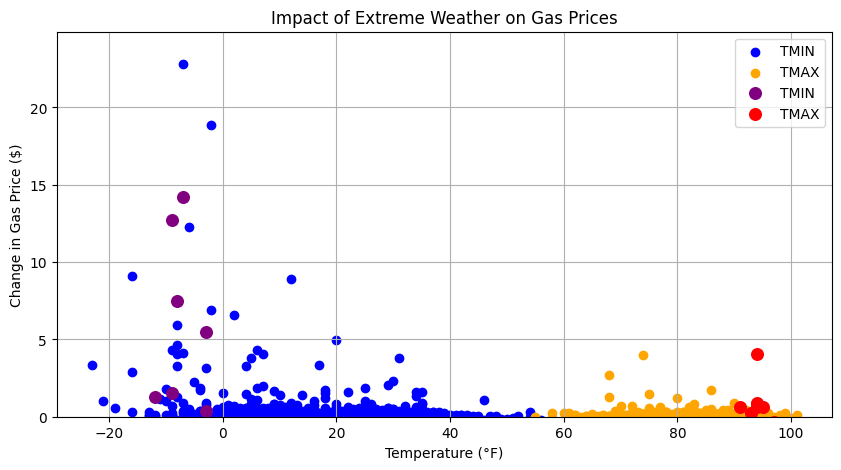

In [440]:
# Scatter plot of temperature vs. gas price change
plt.figure(figsize=(10, 5))
plt.ylim(0, temp_and_gas_all['averages'].quantile(0.999))
plt.scatter(temp_and_gas_winter['TMIN'], temp_and_gas_winter['Gas_Price_Change'], color='blue', label='TMIN')
plt.scatter(temp_and_gas_summer['TMAX'], temp_and_gas_summer['Gas_Price_Change'], color='orange', label='TMAX')
plt.scatter(temp_and_gas_exwinter['TMIN'], temp_and_gas_exwinter['Gas_Price_Change'], color='purple', label='TMIN', s=70)
plt.scatter(temp_and_gas_exsummer['TMAX'], temp_and_gas_exsummer['Gas_Price_Change'], color='red', label='TMAX', s=70)
plt.xlabel("Temperature (°F)")
plt.ylabel("Change in Gas Price ($)")
plt.title("Impact of Extreme Weather on Gas Prices")
plt.legend()
plt.grid()
plt.show()

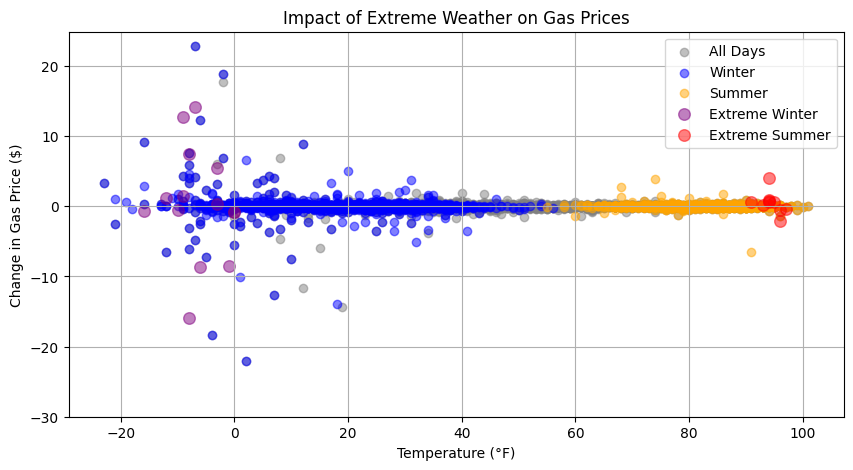

In [441]:
# Scatter plot of temperature vs. gas price change
plt.figure(figsize=(10, 5))
plt.ylim(-30, temp_and_gas_all['averages'].quantile(0.999))
plt.scatter(temp_and_gas_all['Temperature'], temp_and_gas_all['Gas_Price_Change'], color='gray', label='All Days', alpha=0.5)
plt.scatter(temp_and_gas_winter['TMIN'], temp_and_gas_winter['Gas_Price_Change'], color='blue', label='Winter',alpha=0.5)
plt.scatter(temp_and_gas_summer['TMAX'], temp_and_gas_summer['Gas_Price_Change'], color='orange', label='Summer',alpha=0.5)
plt.scatter(temp_and_gas_exwinter['TMIN'], temp_and_gas_exwinter['Gas_Price_Change'], color='purple', label='Extreme Winter', s=70,alpha=0.5)
plt.scatter(temp_and_gas_exsummer['TMAX'], temp_and_gas_exsummer['Gas_Price_Change'], color='red', label='Extreme Summer', s=70,alpha=0.5)
plt.xlabel("Temperature (°F)")
plt.ylabel("Change in Gas Price ($)")
plt.title("Impact of Extreme Weather on Gas Prices")
plt.legend()
plt.grid()
plt.show()

In [442]:
#extract extreme weather days 2 DAYS LATER

# Define extreme winter and summer dates
extreme_winter_dates1 = pd.to_datetime([
    '1994-01-19', '1996-02-04', '2019-01-31', '2014-01-09', '2009-01-17',
    '2000-12-24', '2007-02-07', '1999-01-07', '2024-01-18', '2015-01-09',
    '2022-12-25', '2018-01-04', '2025-01-22', '2014-01-24', '2017-12-30',
    '1997-01-18', '2014-02-12', '2015-02-20', '1997-01-29', '2004-01-31'
])

extreme_summer_dates1 = pd.to_datetime([
    '2012-07-07', '1995-07-16', '2006-07-30', '2006-08-02', '2011-07-21',
    '2020-08-28', '1994-06-18', '1995-08-16', '2002-07-09', '2005-06-30',
    '1999-07-25', '2011-07-20', '2012-07-19', '2002-07-04', '2013-07-19',
    '2024-08-28', '2005-07-20', '2012-06-20', '2024-06-19', '2001-08-09'
])

# Filter for extreme weather days
extreme_winter1 = temp_and_gas_all[temp_and_gas_all.index.isin(extreme_winter_dates1)]
extreme_summer1 = temp_and_gas_all[temp_and_gas_all.index.isin(extreme_summer_dates1)]



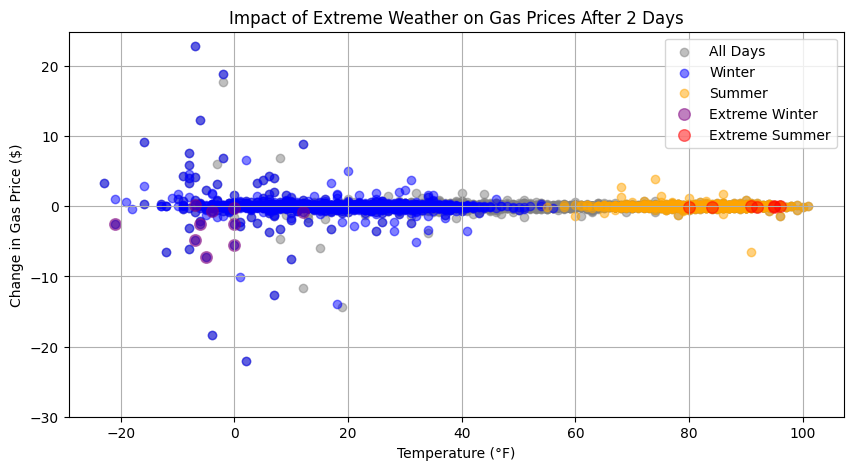

In [443]:
# Scatter plot of temperature vs. gas price change
plt.figure(figsize=(10, 5))
plt.ylim(-30, temp_and_gas_all['averages'].quantile(0.999))
plt.scatter(temp_and_gas_all['Temperature'], temp_and_gas_all['Gas_Price_Change'], color='gray', label='All Days', alpha=0.5)
plt.scatter(temp_and_gas_winter['TMIN'], temp_and_gas_winter['Gas_Price_Change'], color='blue', label='Winter',alpha=0.5)
plt.scatter(temp_and_gas_summer['TMAX'], temp_and_gas_summer['Gas_Price_Change'], color='orange', label='Summer',alpha=0.5)
plt.scatter(extreme_winter1['TMIN'], extreme_winter1['Gas_Price_Change'], color='purple', label='Extreme Winter', s=70,alpha=0.5)
plt.scatter(extreme_summer1['TMAX'], extreme_summer1['Gas_Price_Change'], color='red', label='Extreme Summer', s=70,alpha=0.5)
plt.xlabel("Temperature (°F)")
plt.ylabel("Change in Gas Price ($)")
plt.title("Impact of Extreme Weather on Gas Prices After 2 Days")
plt.legend()
plt.grid()
plt.show()

In [448]:
#winter model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features (TMIN and TMAX) and target (Gas Price Change)
X = temp_and_gas_exwinter[['TMIN']]
y = temp_and_gas_exwinter['Gas_Price_Change']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred) **0.5
print(f'Linear Regression RMSE: {rmse}')

# Display model coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')  # Shows how much gas prices change per degree


Linear Regression RMSE: 4.560780419829869
Intercept: -1.8906179196704396
Coefficients: [-0.33486097]


In [449]:
#predicting temperatue change
temp_change = -10
predicted_gas_price_change = model.intercept_ + (model.coef_[0] *temp_change)

print(f'Predicted Gas Price Change: {predicted_gas_price_change:.2f}')

Predicted Gas Price Change: 1.46


Results:

Intercept: predicted gas price change when TMIN and TMAX = 0
Negative Coefficient: Gas price decrease as temperature increases. Since we are looking at winter, this makes sense. 

In [445]:
#summer model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features (TMIN and TMAX) and target (Gas Price Change)
X = temp_and_gas_exsummer[['TMAX']]
y = temp_and_gas_exsummer['Gas_Price_Change']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred) **0.5
print(f'Linear Regression RMSE: {rmse}')

# Display model coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')  # Shows how much gas prices change per degree


Linear Regression RMSE: 0.39743642243325095
Intercept: 39.06777777777776
Coefficients: [-0.40944444]


In [446]:
#predicting temperatue change
temp_change = -10
predicted_gas_price_change = model.intercept_ + (model.coef_[0] *temp_change)

print(f'Predicted Gas Price Change: {predicted_gas_price_change:.2f}')

Predicted Gas Price Change: 43.16
